In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

# Load the data
file_path = r"\\lightning.bu.binghamton.edu\oaliyaeesh\Downloads\Demand.csv" 
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Display a preview of the DataFrame and its columns
print(df.head())
print(df.columns)


   car type  made in  number of cars in jordan  car age  part  failure rate  \
0         4        1                      1841        4     9      0.263158   
1         2        3                       686        1    12      0.089600   
2         1        2                      1924       12    24      0.086200   
3         1        2                       747        3     4      0.172400   
4         3        2                      1562        4    10      0.130000   

   price of the car  original/imitator  new\used  selling location  \
0           15000.0                  1         0                 1   
1           19500.0                  1         1                 3   
2            8700.0                  1         0                 1   
3           19300.0                  1         0                 1   
4           14800.0                  0         1                 2   

   service location (repair shop/automotive company  \
0                                                

# Data Labeling code  

In [7]:
df.head(1)

,car type,made in,number of cars in jordan,car age,part,failure rate,price of the car,original/imitator,new\used,selling location,service location (repair shop/automotive company,repair or replacement cost,car total maintenance cost average,critically,on line price,demand
0,4,1,1841,4,9,0.263158,15000.0,1,0,1,1,10,8200,0.06,20.0,4.844737


In [8]:
import pandas as pd
import numpy as np

# 1. Convert 'demand' to numeric, coercing errors to NaN
df['demand'] = pd.to_numeric(df['demand'], errors='coerce')

# 2. Drop rows where 'demand' is NaN
df.dropna(subset=['demand'], inplace=True)

# 3. Determine the 33rd and 66th percentile of demand
percentiles = df['demand'].quantile([0.33, 0.66])
low_threshold = percentiles[0.33]
medium_threshold = percentiles[0.66]

# 4. Use pd.cut() to bin demand into 3 labels: [1, 2, 3]
df['demand'] = pd.cut(
    df['demand'],
    bins=[-np.inf, low_threshold, medium_threshold, np.inf],
    labels=[0,1,2]
)

# Show a quick frequency count of each label
print(df['demand'].value_counts())

demand
2    2582
0    2565
1    2505
Name: count, dtype: int64


In [9]:
df

,car type,made in,number of cars in jordan,car age,part,failure rate,price of the car,original/imitator,new\used,selling location,service location (repair shop/automotive company,repair or replacement cost,car total maintenance cost average,critically,on line price,demand
0,4,1,1841,4,9,0.263158,15000.0,1,0,1,1,10,8200,0.0600,20.000,1
1,2,3,686,1,12,0.089600,19500.0,1,1,3,2,30,9100,0.1297,71.000,0
2,1,2,1924,12,24,0.086200,8700.0,1,0,1,1,10,5500,0.1275,56.080,0
3,1,2,747,3,4,0.172400,19300.0,1,0,1,1,10,5500,0.1244,21.030,0
4,3,2,1562,4,10,0.130000,14800.0,0,1,2,1,10,5500,0.2342,50.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7647,3,2,5864,8,27,0.130000,10450.0,1,0,1,1,30,5500,0.4333,100.000,2
7648,3,2,814,13,22,0.800000,7500.0,1,1,3,1,5,5500,0.1233,24.000,2
7649,4,1,874,2,6,0.858333,20000.0,1,1,3,1,10,8200,0.1249,41.000,2
7650,2,3,5772,7,9,0.083100,14000.0,1,1,2,1,10,9100,0.0600,60.000,1


# ANN Implementation

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df.drop('demand', axis=1)  # Replace 'target_column' with the actual name of your target column
y = df['demand']

# Create a pipeline that includes scaling
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data with the pipeline
X_train_scaled = preprocessing_pipeline.fit_transform(X_train)

# Transform the test data with the same fitted pipeline
X_test_scaled = preprocessing_pipeline.transform(X_test)

# Tuning code 

In [13]:

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel, RandomSearch

class MyHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()
        # Dynamic setting of the number of dense layers
        num_layers = hp.Int('num_layers', min_value=1, max_value=1, step=1, default=3)

        for i in range(num_layers):
            # For each layer, define the number of units, adding first layer with input shape
            model.add(Dense(
                units=hp.Int(f'units_{i}', min_value=5, max_value=30, step=3),
                activation='relu',
                input_shape=self.input_shape if i == 0 else None
            ))

        # Output layer with num_classes units and softmax activation
        model.add(Dense(units=self.num_classes, activation='softmax'))

        # Hyperparameter for the learning rate
        lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

        model.compile(optimizer=Adam(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        return model


In [14]:
# Convert y_train and y_test to integer
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [15]:
# Assume X_train_scaled and y_train are prepared and the number of classes is known
num_classes = 3  # Adjust based on your specific dataset

tuner = RandomSearch(
    MyHyperModel(input_shape=(X_train_scaled.shape[1],), num_classes=num_classes),
    objective='val_accuracy',  # Focus on validation accuracy
    max_trials=10,  # Number of different configurations to try
    executions_per_trial=1,  # Number of times to train each model
    directory='my_tuner_dir',
    project_name='ann_tunerDemand1final'
)

# Perform the hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Trial 10 Complete [00h 00m 23s]
val_accuracy: 0.7469387650489807

Best val_accuracy So Far: 0.9763265252113342
Total elapsed time: 00h 03m 46s


In [16]:
# Get the best set of hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"The best number of layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Layer {i + 1} has {best_hps.get(f'units_{i}')} neurons")
print(f"The best learning rate: {best_hps.get('learning_rate')}")

The best number of layers: 1
Layer 1 has 11 neurons
The best learning rate: 0.009989156675663677


In [17]:
# Convert y_train and y_test to integer
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# FF ANN 

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming num_classes is defined (number of unique classes)
num_classes = 3  # Adjust based on your specific dataset
tf.random.set_seed(42)

model = Sequential([
    Dense(units=14, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),  # Dropout layer with a 50% dropout rate
    Dense(units=num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model with a specified learning rate
model.compile(optimizer=Adam(learning_rate=0.004080390057565442),
              loss='sparse_categorical_crossentropy',  # Suitable for integer labels
              metrics=['accuracy'])  # Common metric for classification

# Define the early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',         # Metric to monitor (validation loss)
    patience=10,                # Number of epochs to wait for improvement
    restore_best_weights=True   # Restore the weights from the best epoch
)

# Train the model with early stopping
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/100


C:\Users\oaliyaeesh\.conda\envs\notebook-6.5.7\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 1s 3ms/step - accuracy: 0.3971 - loss: 1.2029 - val_accuracy: 0.5910 - val_loss: 0.8692
Epoch 2/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.6019 - loss: 0.8510 - val_accuracy: 0.6824 - val_loss: 0.7130
Epoch 3/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.6733 - loss: 0.7200 - val_accuracy: 0.7331 - val_loss: 0.6057
Epoch 4/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.7289 - loss: 0.6237 - val_accuracy: 0.7804 - val_loss: 0.5224
Epoch 5/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.7801 - loss: 0.5361 - val_accuracy: 0.8155 - val_loss: 0.4598
Epoch 6/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.7982 - loss: 0.4944 - val_accuracy: 0.8212 - val_loss: 0.422

153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.9135 - loss: 0.2157 - val_accuracy: 0.9322 - val_loss: 0.1643
Epoch 52/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.9249 - loss: 0.2093 - val_accuracy: 0.9396 - val_loss: 0.1600
Epoch 53/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.9195 - loss: 0.2080 - val_accuracy: 0.9322 - val_loss: 0.1661
Epoch 54/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.9219 - loss: 0.2123 - val_accuracy: 0.9429 - val_loss: 0.1637
Epoch 55/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.9202 - loss: 0.2114 - val_accuracy: 0.9429 - val_loss: 0.1603
Epoch 56/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.9227 - loss: 0.2038 - val_accuracy: 0.9420 - val_loss: 

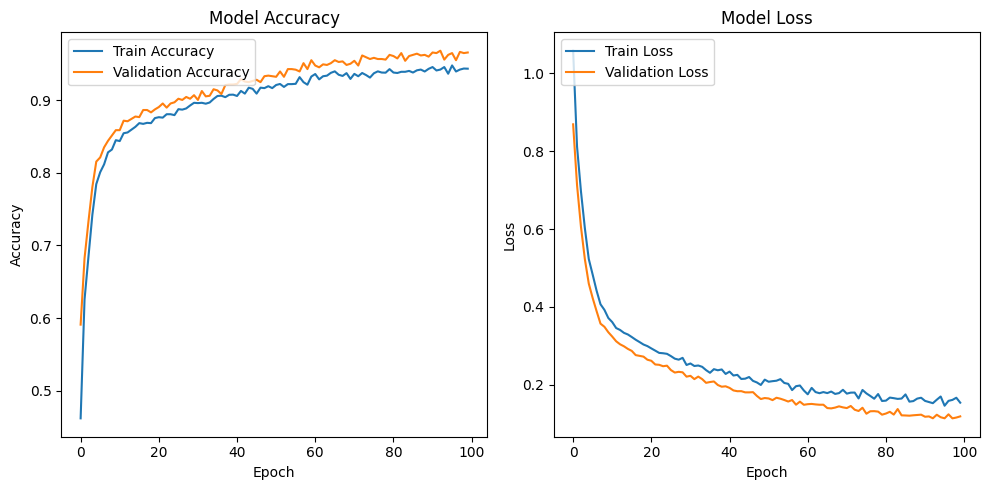

In [20]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

48/48 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step


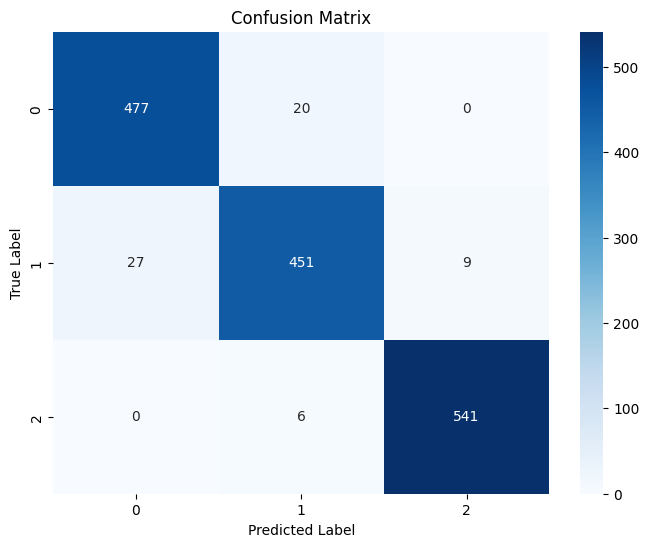

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       497
           1       0.95      0.93      0.94       487
           2       0.98      0.99      0.99       547

    accuracy                           0.96      1531
   macro avg       0.96      0.96      0.96      1531
weighted avg       0.96      0.96      0.96      1531

Accuracy: 0.96


In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Predict the values from the validation dataset
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to one-hot vectors 
y_true = y_test.to_numpy()  # Ensure y_test is a numpy array
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Calculate and print classification metrics
print(classification_report(y_true, y_pred_classes))
print(f"Accuracy: {accuracy_score(y_true, y_pred_classes):.2f}")

In [22]:
# Evaluate model on Training Data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)

# Evaluate model on Testing Data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

# Compare and print training and testing accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy:  {test_accuracy:.2f}")

Training Accuracy: 0.97
Testing Accuracy:  0.96


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
# Parameters
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store results
fold_no = 1
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
for train, test in kfold.split(X, y):
    # Create a pipeline that includes scaling
    preprocessing_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

    # Apply preprocessing
    X_train_scaled = preprocessing_pipeline.fit_transform(X.iloc[train])
    X_test_scaled = preprocessing_pipeline.transform(X.iloc[test])

    y_train, y_test = y.iloc[train].astype('int'), y.iloc[test].astype('int')

    # Define the model architecture
    model = Sequential([
        Dense(units=14, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.1),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.004080390057565442),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define callbacks
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Fit the model
    print(f'Training for fold {fold_no} ...')
    history = model.fit(
        X_train_scaled,
        y_train,
        epochs=100,
        validation_data=(X_test_scaled, y_test),
        callbacks=[early_stop],
        verbose=0  # Turn off training log for each epoch
    )

    # Generate generalization metrics
    scores = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f'Score for fold {fold_no}: Accuracy of {scores[1]*100}% - Loss of {scores[0]}')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increment the fold number
    fold_no += 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold):.2f} (+- {np.std(acc_per_fold):.2f})')
print(f'> Loss: {np.mean(loss_per_fold):.2f}')
print('------------------------------------------------------------------------')


C:\Users\oaliyaeesh\.conda\envs\notebook-6.5.7\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training for fold 1 ...
Score for fold 1: Accuracy of 98.1058120727539% - Loss of 0.07463574409484863
Training for fold 2 ...


C:\Users\oaliyaeesh\.conda\envs\notebook-6.5.7\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Score for fold 2: Accuracy of 97.84454703330994% - Loss of 0.08274395018815994
Training for fold 3 ...


C:\Users\oaliyaeesh\.conda\envs\notebook-6.5.7\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Score for fold 3: Accuracy of 97.51634001731873% - Loss of 0.08486831933259964
Training for fold 4 ...


C:\Users\oaliyaeesh\.conda\envs\notebook-6.5.7\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Score for fold 4: Accuracy of 97.0588207244873% - Loss of 0.09356483817100525
Training for fold 5 ...


C:\Users\oaliyaeesh\.conda\envs\notebook-6.5.7\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Score for fold 5: Accuracy of 97.32025861740112% - Loss of 0.07926391065120697
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 97.57 (+- 0.37)
> Loss: 0.08
------------------------------------------------------------------------


Initial Data Preview:
   car type  made in  number of cars in jordan  car age  part  failure rate  \
0         4        1                      1841        4     9      0.263158   
1         2        3                       686        1    12      0.089600   
2         1        2                      1924       12    24      0.086200   
3         1        2                       747        3     4      0.172400   
4         3        2                      1562        4    10      0.130000   

   price of the car  original/imitator  new\used  selling location  \
0           15000.0                  1         0                 1   
1           19500.0                  1         1                 3   
2            8700.0                  1         0                 1   
3           19300.0                  1         0                 1   
4           14800.0                  0         1                 2   

   service location (repair shop/automotive company  \
0                          

153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.8826 - loss: 0.2802 - val_accuracy: 0.8849 - val_loss: 0.2417
Epoch 36/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.8817 - loss: 0.2793 - val_accuracy: 0.8963 - val_loss: 0.2409
Epoch 37/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.8848 - loss: 0.2744 - val_accuracy: 0.8996 - val_loss: 0.2327
Epoch 38/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.8821 - loss: 0.2765 - val_accuracy: 0.8955 - val_loss: 0.2306
Epoch 39/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.8857 - loss: 0.2671 - val_accuracy: 0.8939 - val_loss: 0.2304
Epoch 40/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.8882 - loss: 0.2549 - val_accuracy: 0.9012 - val_loss: 

153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.9270 - loss: 0.1811 - val_accuracy: 0.9453 - val_loss: 0.1467
Epoch 86/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.9219 - loss: 0.1861 - val_accuracy: 0.9380 - val_loss: 0.1493
Epoch 87/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.9281 - loss: 0.1833 - val_accuracy: 0.9290 - val_loss: 0.1527
Epoch 88/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.9320 - loss: 0.1785 - val_accuracy: 0.9363 - val_loss: 0.1474
Epoch 89/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.9272 - loss: 0.1792 - val_accuracy: 0.9314 - val_loss: 0.1525
Epoch 90/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step - accuracy: 0.9349 - loss: 0.1856 - val_accuracy: 0.9404 - val_loss: 

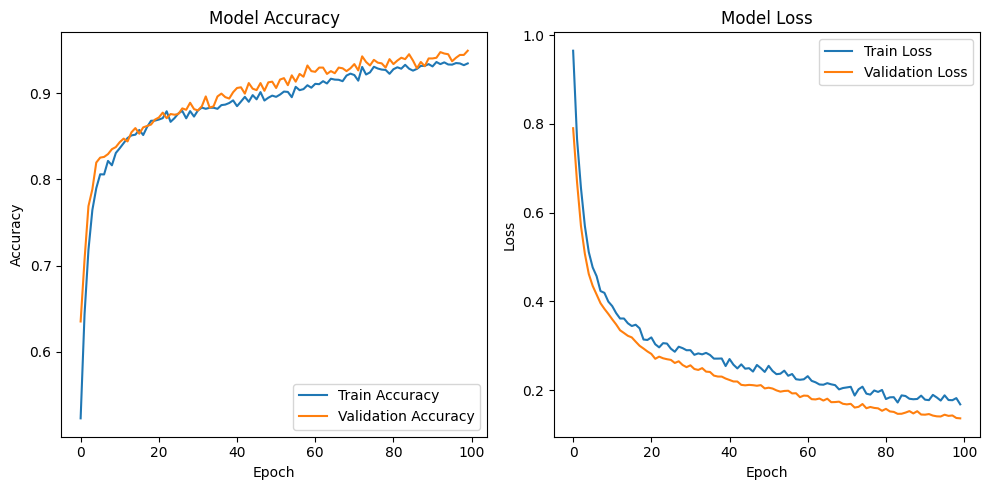

48/48 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 2ms/step


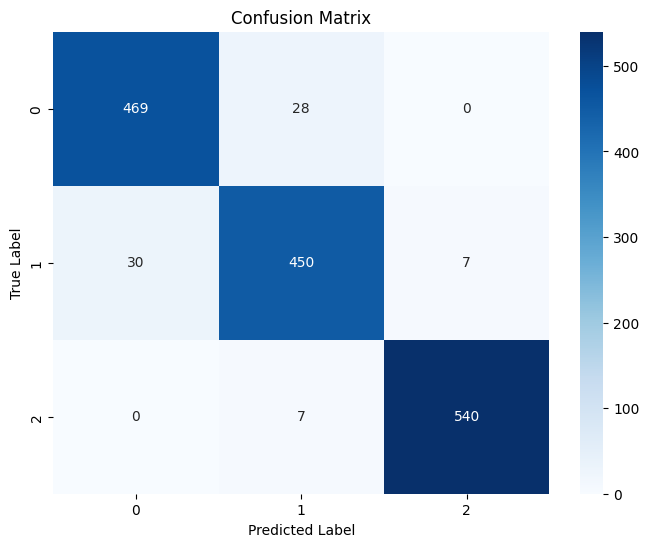


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       497
           1       0.93      0.92      0.93       487
           2       0.99      0.99      0.99       547

    accuracy                           0.95      1531
   macro avg       0.95      0.95      0.95      1531
weighted avg       0.95      0.95      0.95      1531

Test Accuracy: 0.95

Training Accuracy: 0.96
Testing Accuracy: 0.95

Training for fold 1 ...
Score for fold 1: Accuracy of 97.58% - Loss of 0.0811

Training for fold 2 ...
Score for fold 2: Accuracy of 98.50% - Loss of 0.0723

Training for fold 3 ...
Score for fold 3: Accuracy of 97.52% - Loss of 0.0809

Training for fold 4 ...
Score for fold 4: Accuracy of 96.80% - Loss of 0.1050

Training for fold 5 ...
Score for fold 5: Accuracy of 97.91% - Loss of 0.0866

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 97.66 (+- 0.55)


In [60]:
# ---------------- Import Libraries ----------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from keras_tuner import HyperModel, RandomSearch

# Set random seed for reproducibility
tf.random.set_seed(42)

# ---------------- Data Loading and Preparation ----------------
file_path = r"\\lightning.bu.binghamton.edu\oaliyaeesh\Downloads\Demand.csv" 
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

print("Initial Data Preview:")
print(df.head())
print("Columns:", df.columns.tolist())

# Convert 'demand' to numeric and drop rows with non-numeric values
df['demand'] = pd.to_numeric(df['demand'], errors='coerce')
df.dropna(subset=['demand'], inplace=True)

# Bin 'demand' into three categories using the 33rd and 66th percentiles
percentiles = df['demand'].quantile([0.33, 0.66])
low_threshold = percentiles[0.33]
medium_threshold = percentiles[0.66]

df['demand'] = pd.cut(df['demand'], 
                      bins=[-np.inf, low_threshold, medium_threshold, np.inf],
                      labels=[0, 1, 2])
print("\nDemand Value Counts:")
print(df['demand'].value_counts())

# ---------------- Split Data and Scale Features ----------------
X = df.drop('demand', axis=1)
y = df['demand']

# Create a scaling pipeline
preprocessing_pipeline = Pipeline([('scaler', StandardScaler())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled = preprocessing_pipeline.fit_transform(X_train)
X_test_scaled = preprocessing_pipeline.transform(X_test)

# ---------------- Hyperparameter Tuning with Keras Tuner ----------------
class MyHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()
        # Here, num_layers is set with a fixed value (min=max=1) for simplicity;
        # you can adjust min/max and default as needed.
        num_layers = hp.Int('num_layers', min_value=1, max_value=1, step=1, default=3)
        for i in range(num_layers):
            model.add(Dense(units=hp.Int(f'units_{i}', min_value=5, max_value=30, step=3),
                            activation='relu',
                            input_shape=self.input_shape if i == 0 else None))
        # Output layer for multi-class classification
        model.add(Dense(units=self.num_classes, activation='softmax'))
        # Learning rate hyperparameter
        lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        model.compile(optimizer=Adam(learning_rate=lr),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

# Convert labels to integer type
y_train = y_train.astype('int')
y_test = y_test.astype('int')
num_classes = 3

# Initialize the tuner
tuner = RandomSearch(
    MyHyperModel(input_shape=(X_train_scaled.shape[1],), num_classes=num_classes),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_tuner_dir',
    project_name='ann_tunerDemand1final'
)

# Run the hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Retrieve and print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters Found:")
print(f"Best number of layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Layer {i+1} units: {best_hps.get(f'units_{i}')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

# ---------------- Final Model Definition and Training ----------------
# Here we define a final model (you can adjust the architecture as needed)
model = Sequential([
    Dense(units=14, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(units=num_classes, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.004080390057565442),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# EarlyStopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])

# ---------------- Plot Training and Validation Curves ----------------
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ---------------- Evaluation on Test Data ----------------
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.to_numpy()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report and Accuracy
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))
print(f"Test Accuracy: {accuracy_score(y_true, y_pred_classes):.2f}")

# Evaluate on Training and Testing Data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTraining Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# ---------------- K-Fold Cross-Validation ----------------
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_index, test_index in kfold.split(X, y):
    # Apply scaling for the current fold
    preprocessing_pipeline = Pipeline([('scaler', StandardScaler())])
    X_train_fold = preprocessing_pipeline.fit_transform(X.iloc[train_index])
    X_test_fold = preprocessing_pipeline.transform(X.iloc[test_index])
    y_train_fold = y.iloc[train_index].astype('int')
    y_test_fold = y.iloc[test_index].astype('int')
    
    # Define the model architecture for the fold
    model_fold = Sequential([
        Dense(units=14, activation='relu', input_shape=(X_train_fold.shape[1],)),
        Dropout(0.1),
        Dense(num_classes, activation='softmax')
    ])
    model_fold.compile(optimizer=Adam(learning_rate=0.004080390057565442),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
    
    early_stop_fold = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    print(f'\nTraining for fold {fold_no} ...')
    history_fold = model_fold.fit(X_train_fold, y_train_fold, epochs=100, 
                                  validation_data=(X_test_fold, y_test_fold),
                                  callbacks=[early_stop_fold],
                                  verbose=0)
    
    scores = model_fold.evaluate(X_test_fold, y_test_fold, verbose=0)
    print(f'Score for fold {fold_no}: Accuracy of {scores[1]*100:.2f}% - Loss of {scores[0]:.4f}')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    fold_no += 1

print('\n------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold):.2f} (+- {np.std(acc_per_fold):.2f})')
print(f'> Loss: {np.mean(loss_per_fold):.4f}')
print('------------------------------------------------------------------------')


# Implementing SHAP

## Globa: On the entire testing dataset

1/1 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 42ms/step

SHAP summary for class 0:


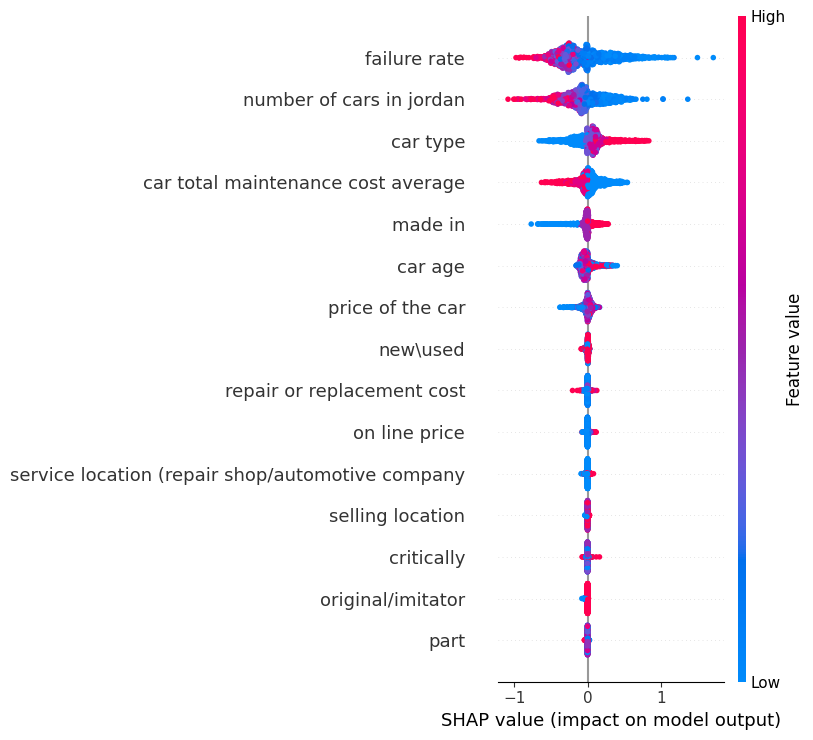


SHAP summary for class 1:


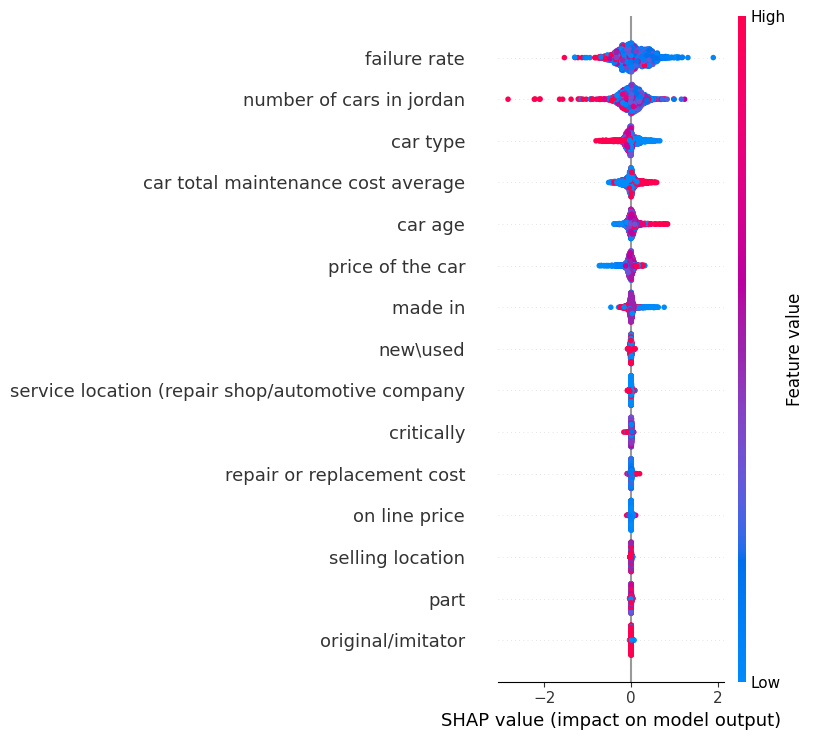


SHAP summary for class 2:


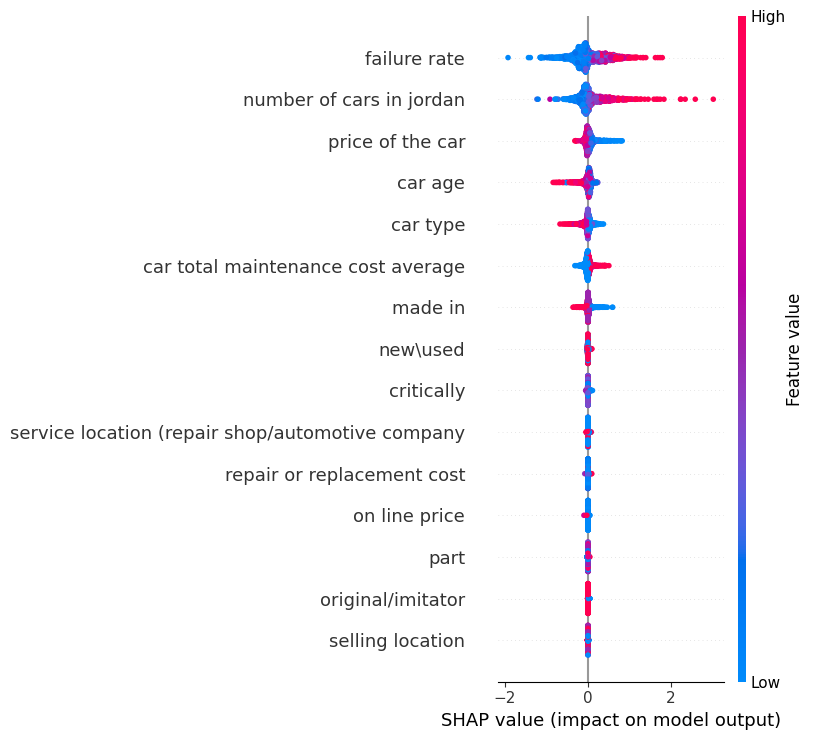

In [63]:
import shap
import numpy as np

# --- Step 1: Ensure the Model is Built ---
# Force the model to build its computation graph by making a dummy prediction.
dummy_input = np.zeros((1, X_train_scaled.shape[1]))
_ = model.predict(dummy_input)

# --- Step 2: Select Background Data ---
# A background dataset is needed for SHAP. Here we randomly select 100 samples from the training data.
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]

# --- Step 3: Initialize the Explainer ---
# We use GradientExplainer, which generally works well for neural networks.
explainer = shap.GradientExplainer(model, background)

# --- Step 4: Compute SHAP Values for the Entire Test Set ---
# Instead of taking a small subset, we pass the entire test set.
sample_data = X_test_scaled  # Use the whole test dataset here
shap_values = explainer.shap_values(sample_data)

# --- Step 5: Adjust SHAP Values Shape ---
# For multi-class problems, shap_values should ideally have shape:
#    (num_classes, num_samples, num_features)
# If the axes are not in that order, we transpose accordingly.
shap_values = np.array(shap_values)
if shap_values.shape[0] != 3:  # Assuming 3 classes in our model
    shap_values = np.transpose(shap_values, (2, 0, 1))

# --- Step 6: Generate SHAP Summary Plots ---
# Loop over each class and generate a summary plot showing feature contributions.
for i in range(shap_values.shape[0]):
    print(f"\nSHAP summary for class {i}:")
    shap.summary_plot(shap_values[i], sample_data, feature_names=X.columns.tolist())


Trial 10 Complete [00h 00m 06s]
val_accuracy: 0.8906122446060181

Best val_accuracy So Far: 0.9551020264625549
Total elapsed time: 00h 01m 01s

Best Hyperparameters Found:
Best number of layers: 1
Layer 1 units: 23
Best learning rate: 0.005602273343470795
Epoch 1/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 1ms/step - accuracy: 0.4016 - loss: 1.2016 - val_accuracy: 0.6473 - val_loss: 0.7888
Epoch 2/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 649us/step - accuracy: 0.6415 - loss: 0.7858 - val_accuracy: 0.7135 - val_loss: 0.6503
Epoch 3/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 640us/step - accuracy: 0.7171 - loss: 0.6749 - val_accuracy: 0.7665 - val_loss: 0.5579
Epoch 4/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 624us/step - accuracy: 0.7475 - loss: 0.5867 - val_accuracy: 0.7951 - val_loss: 0.4882
Epoch 5/100
153/153 â”â”â”â”â”â”â”â”â”â”â”â”â”â”

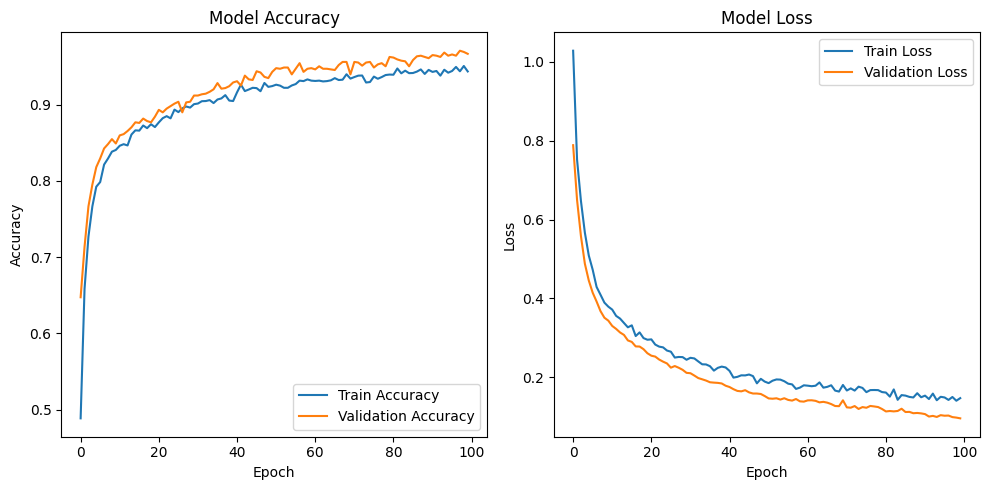

48/48 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 1ms/step 


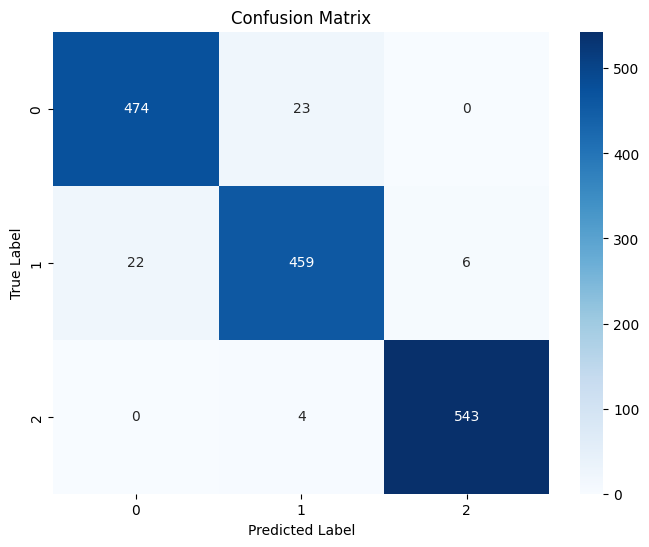


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       497
           1       0.94      0.94      0.94       487
           2       0.99      0.99      0.99       547

    accuracy                           0.96      1531
   macro avg       0.96      0.96      0.96      1531
weighted avg       0.96      0.96      0.96      1531

Test Accuracy: 0.96

Training Accuracy: 0.97
Testing Accuracy: 0.96

Training for fold 1 ...
Score for fold 1: Accuracy of 98.04% - Loss of 0.0818

Training for fold 2 ...
Score for fold 2: Accuracy of 97.65% - Loss of 0.0877

Training for fold 3 ...
Score for fold 3: Accuracy of 97.39% - Loss of 0.0801

Training for fold 4 ...
Score for fold 4: Accuracy of 97.58% - Loss of 0.0911

Training for fold 5 ...
Score for fold 5: Accuracy of 96.80% - Loss of 0.1044

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 97.49 (+- 0.41)


In [1]:
# ---------------- Import Libraries ----------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from keras_tuner import HyperModel, RandomSearch

# Set random seed for reproducibility
tf.random.set_seed(42)

# ---------------- Data Loading and Preparation ----------------
file_path = r"/Users/yaeesh/Downloads/Demand.csv"  # Updated file path
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

print("Initial Data Preview:")
print(df.head())
print("Columns:", df.columns.tolist())

# Convert 'demand' to numeric and drop rows with non-numeric values
df['demand'] = pd.to_numeric(df['demand'], errors='coerce')
df.dropna(subset=['demand'], inplace=True)

# Bin 'demand' into three categories using the 33rd and 66th percentiles
percentiles = df['demand'].quantile([0.33, 0.66])
low_threshold = percentiles[0.33]
medium_threshold = percentiles[0.66]

df['demand'] = pd.cut(df['demand'], 
                      bins=[-np.inf, low_threshold, medium_threshold, np.inf],
                      labels=[0, 1, 2])
print("\nDemand Value Counts:")
print(df['demand'].value_counts())

# ---------------- Split Data and Scale Features ----------------
X = df.drop('demand', axis=1)
y = df['demand']

# Create a scaling pipeline
preprocessing_pipeline = Pipeline([('scaler', StandardScaler())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled = preprocessing_pipeline.fit_transform(X_train)
X_test_scaled = preprocessing_pipeline.transform(X_test)

# ---------------- Hyperparameter Tuning with Keras Tuner ----------------
class MyHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()
        # Here, num_layers is set with a fixed value (min=max=1) for simplicity;
        # you can adjust min/max and default as needed.
        num_layers = hp.Int('num_layers', min_value=1, max_value=1, step=1, default=3)
        for i in range(num_layers):
            model.add(Dense(units=hp.Int(f'units_{i}', min_value=5, max_value=30, step=3),
                            activation='relu',
                            input_shape=self.input_shape if i == 0 else None))
        # Output layer for multi-class classification
        model.add(Dense(units=self.num_classes, activation='softmax'))
        # Learning rate hyperparameter
        lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        model.compile(optimizer=Adam(learning_rate=lr),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

# Convert labels to integer type
y_train = y_train.astype('int')
y_test = y_test.astype('int')
num_classes = 3

# Initialize the tuner
tuner = RandomSearch(
    MyHyperModel(input_shape=(X_train_scaled.shape[1],), num_classes=num_classes),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_tuner_dir',
    project_name='ann_tunerDemand1final'
)

# Run the hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Retrieve and print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters Found:")
print(f"Best number of layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Layer {i+1} units: {best_hps.get(f'units_{i}')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

# ---------------- Final Model Definition and Training ----------------
# Here we define a final model (you can adjust the architecture as needed)
model = Sequential([
    Dense(units=14, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(units=num_classes, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.004080390057565442),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# EarlyStopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])

# ---------------- Plot Training and Validation Curves ----------------
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
# Save the training curves figure at 300 dpi
plt.savefig('training_validation_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------- Evaluation on Test Data ----------------
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.to_numpy()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Save the confusion matrix figure at 300 dpi
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Classification Report and Accuracy
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))
print(f"Test Accuracy: {accuracy_score(y_true, y_pred_classes):.2f}")

# Evaluate on Training and Testing Data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTraining Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# ---------------- K-Fold Cross-Validation ----------------
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_index, test_index in kfold.split(X, y):
    # Apply scaling for the current fold
    preprocessing_pipeline = Pipeline([('scaler', StandardScaler())])
    X_train_fold = preprocessing_pipeline.fit_transform(X.iloc[train_index])
    X_test_fold = preprocessing_pipeline.transform(X.iloc[test_index])
    y_train_fold = y.iloc[train_index].astype('int')
    y_test_fold = y.iloc[test_index].astype('int')
    
    # Define the model architecture for the fold
    model_fold = Sequential([
        Dense(units=14, activation='relu', input_shape=(X_train_fold.shape[1],)),
        Dropout(0.1),
        Dense(num_classes, activation='softmax')
    ])
    model_fold.compile(optimizer=Adam(learning_rate=0.004080390057565442),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
    
    early_stop_fold = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    print(f'\nTraining for fold {fold_no} ...')
    history_fold = model_fold.fit(X_train_fold, y_train_fold, epochs=100, 
                                  validation_data=(X_test_fold, y_test_fold),
                                  callbacks=[early_stop_fold],
                                  verbose=0)
    
    scores = model_fold.evaluate(X_test_fold, y_test_fold, verbose=0)
    print(f'Score for fold {fold_no}: Accuracy of {scores[1]*100:.2f}% - Loss of {scores[0]:.4f}')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    fold_no += 1

print('\n------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold):.2f} (+- {np.std(acc_per_fold):.2f})')
print(f'> Loss: {np.mean(loss_per_fold):.4f}')
print('------------------------------------------------------------------------')


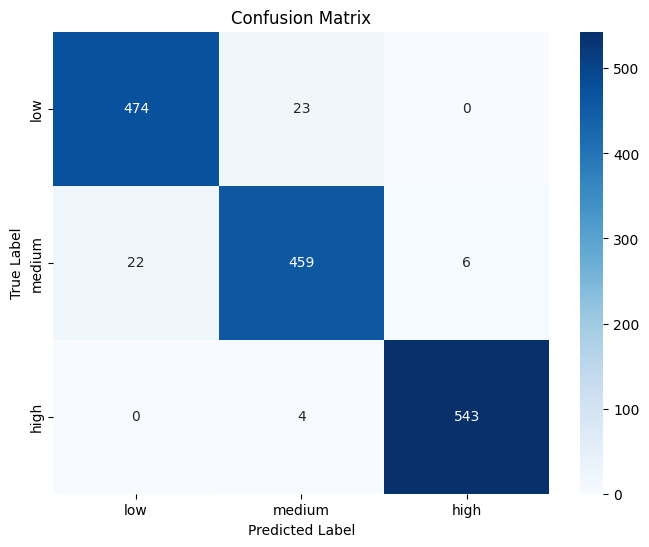

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Define custom labels
class_labels = ['low', 'medium', 'high']

# Plot confusion matrix with custom tick labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Save the figure as a PNG with 300 dpi resolution
plt.savefig('confusion_matrix_custom.png', dpi=300, bbox_inches='tight')
plt.show()


In [4]:
import shap
import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib to save figures

# --- Step 1: Ensure the Model is Built ---
# Force the model to build its computation graph by making a dummy prediction.
dummy_input = np.zeros((1, X_train_scaled.shape[1]))
_ = model.predict(dummy_input)

# --- Step 2: Select Background Data ---
# A background dataset is needed for SHAP. Here we randomly select 100 samples from the training data.
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]

# --- Step 3: Initialize the Explainer ---
# We use GradientExplainer, which generally works well for neural networks.
explainer = shap.GradientExplainer(model, background)

# --- Step 4: Compute SHAP Values for the Entire Test Set ---
# Instead of taking a small subset, we pass the entire test set.
sample_data = X_test_scaled  # Use the whole test dataset here
shap_values = explainer.shap_values(sample_data)

# --- Step 5: Adjust SHAP Values Shape ---
# For multi-class problems, shap_values should ideally have shape:
#    (num_classes, num_samples, num_features)
# If the axes are not in that order, we transpose accordingly.
shap_values = np.array(shap_values)
if shap_values.shape[0] != 3:  # Assuming 3 classes in our model
    shap_values = np.transpose(shap_values, (2, 0, 1))

# --- Step 6: Generate SHAP Summary Plots ---
# Loop over each class and generate a summary plot showing feature contributions.
for i in range(shap_values.shape[0]):
    print(f"\nSHAP summary for class {i}:")
    # Generate the summary plot without displaying it immediately
    shap.summary_plot(shap_values[i], sample_data, feature_names=X.columns.tolist(), show=False)
    # Save the plot as a PNG file with 300 dpi resolution
    plt.savefig(f'shap_summary_class_{i}.png', dpi=300, bbox_inches='tight')
    plt.clf()  # Clear the current figure before generating the next one



1/1 â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â”â” 0s 118ms/step

SHAP summary for class 0:

SHAP summary for class 1:

SHAP summary for class 2:


<Figure size 800x750 with 0 Axes>

# Updated Code After Reviewers Comments

Initial shape: (7652, 16)
Dropping 60 duplicate rows
Demand thresholds (approx): 33%=1.800064, 66%=5.584000

Starting exhaustive grid search over 72 combinations...
Config 1/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0, 'learning_rate': 0.001}
Config 2/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0, 'learning_rate': 0.003}
Config 3/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0, 'learning_rate': 0.01}
Config 4/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0001, 'learning_rate': 0.001}
Config 5/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0001, 'learning_rate': 0.003}
Config 6/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0001, 'learning_rate': 0.01}
Config 7/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.2, 'l2_reg': 0.0, 'learning_rate': 0.001}
Config 8/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.2, 'l2_reg': 0.0, 'learning_rate': 0.0

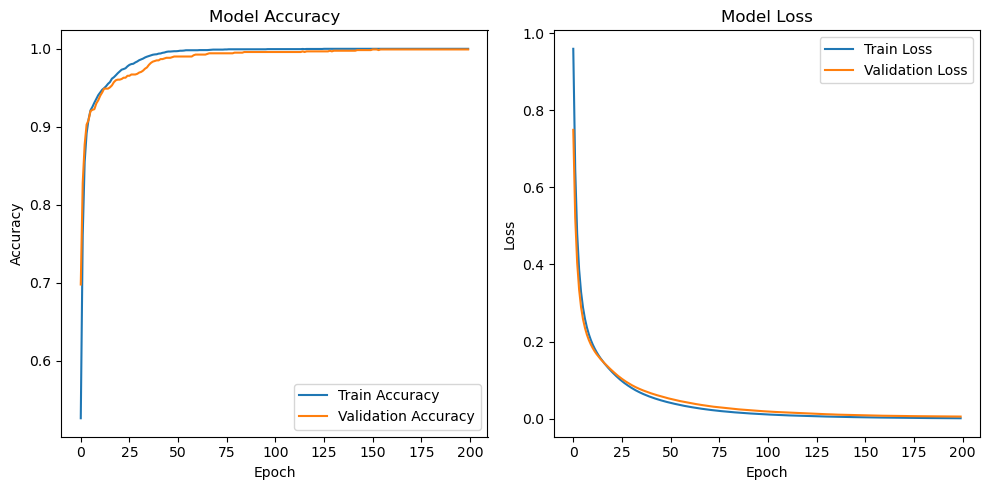

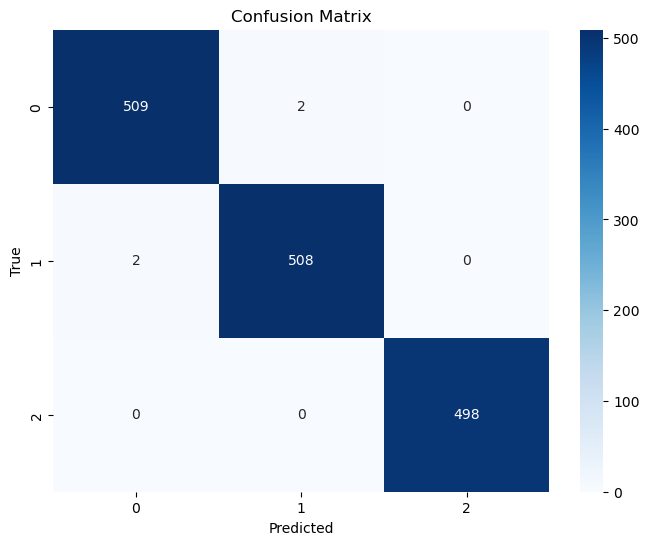


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       511
           1       1.00      1.00      1.00       510
           2       1.00      1.00      1.00       498

    accuracy                           1.00      1519
   macro avg       1.00      1.00      1.00      1519
weighted avg       1.00      1.00      1.00      1519

Test Accuracy: 0.9974
Macro F1:      0.9974

Training Accuracy: 0.9998
Testing  Accuracy: 0.9974
Fold 1: Acc=100.00% | Loss=0.0006 | MacroF1=1.0000
Fold 2: Acc=99.93% | Loss=0.0023 | MacroF1=0.9993
Fold 3: Acc=100.00% | Loss=0.0043 | MacroF1=1.0000
Fold 4: Acc=100.00% | Loss=0.0006 | MacroF1=1.0000
Fold 5: Acc=100.00% | Loss=0.0004 | MacroF1=1.0000

------------------------------------------------------------------------
Cross-Validation summary:
Accuracy: mean 99.99%  (Â± 0.03)
Macro F1: mean 0.9999 (Â± 0.0003)
Loss:     mean 0.0016
-------------------------------------------------------

In [9]:
# ===================== Imports & Reproducibility =====================
import warnings
warnings.filterwarnings('ignore')

import os
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, f1_score
)

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Seeds
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# ===================== Data Loading =====================
file_path = r"/Users/yaeesh/Downloads/A Systematic AI-based Paradigm for Classifying Hybrid Electric Vehicle Spare Parts Using Their Price and Demand/Demand.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

print("Initial shape:", df.shape)

# ===================== Drop exact duplicates =====================
dup_count = df.duplicated().sum()
if dup_count:
    print(f"Dropping {dup_count} duplicate rows")
    df = df.drop_duplicates().reset_index(drop=True)

# ===================== Target creation (3 balanced bins) =====================
# Store thresholds for consistent deployment later
demand_q = df['demand'].quantile([0.33, 0.66])
low_thr = float(demand_q.loc[0.33])
mid_thr = float(demand_q.loc[0.66])
print(f"Demand thresholds (approx): 33%={low_thr:.6f}, 66%={mid_thr:.6f}")

y = pd.qcut(df['demand'], q=3, labels=[0, 1, 2], duplicates='drop').astype(int)

# ===================== Feature grouping =====================
# One-hot these categorical codes
cat_cols = [
    'car type',
    'made in',
    'original/imitator',
    'new\\used',
    'selling location',
    'service location (repair shop/automotive company',
    'car total maintenance cost average',
    'part'
]

# Continuous features
num_all = [
    'number of cars in jordan',
    'car age',
    'failure rate',
    'price of the car',
    'repair or replacement cost',
    'critically',
    'on line price'
]

# Validate columns exist
missing_cols = [c for c in cat_cols + num_all + ['demand'] if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing expected columns: {missing_cols}")

X = df[cat_cols + num_all].copy()

# Heavily skewed numeric features -> log1p then scale
skewed_cols = [
    'on line price',
    'number of cars in jordan',
    'failure rate',
    'repair or replacement cost',
    'critically',
    'price of the car'
]
other_num_cols = [c for c in num_all if c not in skewed_cols]

def make_preprocessor():
    # Numeric pipelines
    numeric_skew_pipeline = Pipeline(steps=[
        ('log1p', FunctionTransformer(np.log1p, validate=False)),
        ('scaler', StandardScaler())
    ])
    numeric_pipeline = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    # Version-compatible OneHotEncoder:
    # sklearn >=1.2: use sparse_output; sklearn <1.2: use sparse
    try:
        categorical_pipeline = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    except TypeError:
        categorical_pipeline = OneHotEncoder(handle_unknown='ignore', sparse=False)

    return ColumnTransformer(
        transformers=[
            ('num_skew', numeric_skew_pipeline, skewed_cols),
            ('num',     numeric_pipeline,       other_num_cols),
            ('cat',     categorical_pipeline,   cat_cols)
        ],
        remainder='drop'
    )

# ===================== Stratified split =====================
preprocessor = make_preprocessor()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

input_dim = X_train_proc.shape[1]
num_classes = 3

# ===================== Model builder (with L2 & dropout) =====================
def build_model(input_dim, num_layers, units, dropout_rate, l2_reg, learning_rate, num_classes=3):
    model = Sequential()
    reg = regularizers.l2(l2_reg) if l2_reg and l2_reg > 0 else None
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(units, activation='relu', kernel_regularizer=reg, input_shape=(input_dim,)))
        else:
            model.add(Dense(units, activation='relu', kernel_regularizer=reg))
        if dropout_rate and dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ===================== Grid Search (exhaustive over this grid) =====================
# Adjust these lists to widen or shrink the exhaustive search
GRID = {
    'num_layers':    [1, 2, 3],
    'units':         [16, 32],
    'dropout_rate':  [0.0, 0.2],
    'l2_reg':        [0.0, 1e-4],
    'learning_rate': [1e-3, 3e-3, 1e-2]
}

def grid_combinations(grid_dict):
    keys = list(grid_dict.keys())
    for values in itertools.product(*(grid_dict[k] for k in keys)):
        yield dict(zip(keys, values))

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)

best_cfg = None
best_val_acc = -np.inf
best_history = None
best_model = None

total_combos = int(np.prod([len(v) for v in GRID.values()]))
print("\nStarting exhaustive grid search over", total_combos, "combinations...")
for idx, cfg in enumerate(grid_combinations(GRID), start=1):
    print(f"Config {idx}/{total_combos}: {cfg}")
    model = build_model(input_dim=input_dim,
                        num_layers=cfg['num_layers'],
                        units=cfg['units'],
                        dropout_rate=cfg['dropout_rate'],
                        l2_reg=cfg['l2_reg'],
                        learning_rate=cfg['learning_rate'],
                        num_classes=num_classes)
    history = model.fit(
        X_train_proc, y_train,
        epochs=200,
        validation_split=0.2,
        callbacks=[early_stop, reduce_lr],
        verbose=0
    )
    run_best = float(np.max(history.history['val_accuracy']))
    if run_best > best_val_acc:
        best_val_acc = run_best
        best_cfg = cfg
        best_history = history
        best_model = model

print("\nBest grid configuration (val_accuracy):", round(best_val_acc, 4))
print(best_cfg)

# ===================== Train curves for best model =====================
history = best_history  # alias for plotting

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_validation_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ===================== Test Evaluation =====================
y_pred_proba = best_model.predict(X_test_proc, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = y_test.to_numpy()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred))
print(f"Test Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Macro F1:      {f1_score(y_true, y_pred, average='macro'):.4f}")

# Also report train/test metrics directly from model
train_loss, train_acc = best_model.evaluate(X_train_proc, y_train, verbose=0)
test_loss,  test_acc  = best_model.evaluate(X_test_proc, y_test,  verbose=0)
print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Testing  Accuracy: {test_acc:.4f}")

# ===================== Stratified K-Fold CV with best config =====================
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=SEED)

acc_per_fold, f1_per_fold, loss_per_fold = [], [], []
fold_no = 1
for train_idx, val_idx in skf.split(X, y):
    X_train_f, X_val_f = X.iloc[train_idx], X.iloc[val_idx]
    y_train_f, y_val_f = y.iloc[train_idx], y.iloc[val_idx]

    # Fresh preprocessor per fold (fit only on fold-train)
    preproc_fold = make_preprocessor().fit(X_train_f)
    X_train_f_proc = preproc_fold.transform(X_train_f)
    X_val_f_proc   = preproc_fold.transform(X_val_f)

    model_fold = build_model(
        input_dim=X_train_f_proc.shape[1],
        num_layers=best_cfg['num_layers'],
        units=best_cfg['units'],
        dropout_rate=best_cfg['dropout_rate'],
        l2_reg=best_cfg['l2_reg'],
        learning_rate=best_cfg['learning_rate'],
        num_classes=num_classes
    )

    hist_f = model_fold.fit(
        X_train_f_proc, y_train_f,
        epochs=200,
        validation_data=(X_val_f_proc, y_val_f),
        callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
                   ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)],
        verbose=0
    )

    loss, acc = model_fold.evaluate(X_val_f_proc, y_val_f, verbose=0)
    y_val_pred = np.argmax(model_fold.predict(X_val_f_proc, verbose=0), axis=1)
    f1 = f1_score(y_val_f, y_val_pred, average='macro')

    print(f"Fold {fold_no}: Acc={acc*100:.2f}% | Loss={loss:.4f} | MacroF1={f1:.4f}")
    acc_per_fold.append(acc * 100)
    f1_per_fold.append(f1)
    loss_per_fold.append(loss)
    fold_no += 1

print('\n' + '-'*72)
print('Cross-Validation summary:')
print(f"Accuracy: mean {np.mean(acc_per_fold):.2f}%  (Â± {np.std(acc_per_fold):.2f})")
print(f"Macro F1: mean {np.mean(f1_per_fold):.4f} (Â± {np.std(f1_per_fold):.4f})")
print(f"Loss:     mean {np.mean(loss_per_fold):.4f}")
print('-'*72)

# ===================== Save tuned model =====================
best_model.save("demand_clf.keras")
print("Saved tuned model to demand_clf.keras")
print("Best configuration:", best_cfg)


# Diagnosis for the perfecrt score

Initial shape: (7652, 16)
Dropping 60 duplicate rows
Demand thresholds (approx): 33%=1.800064, 66%=5.584000

Per-part purity (how single-class each part is). Top 10 parts by purity:
part
2     1.000000
1     0.850000
29    0.829787
6     0.796748
24    0.739130
36    0.702128
18    0.659574
20    0.609524
10    0.608696
15    0.595745
dtype: float64

Mean per-part purity: 0.5299 (1.0 means every part maps to a single class)

Starting exhaustive grid search over 72 combinations...
Config 1/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0, 'learning_rate': 0.001}
Config 2/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0, 'learning_rate': 0.003}
Config 3/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0, 'learning_rate': 0.01}
Config 4/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0001, 'learning_rate': 0.001}
Config 5/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0001, 'learning_rate

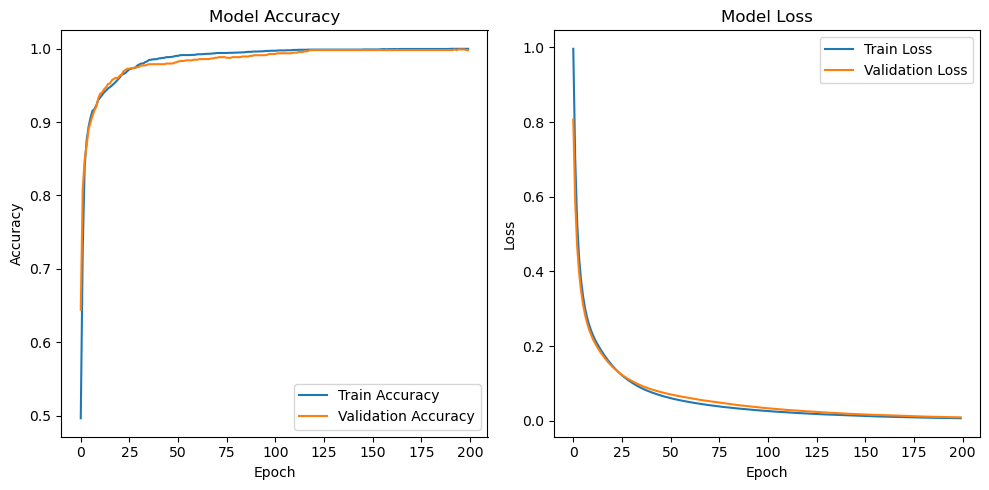

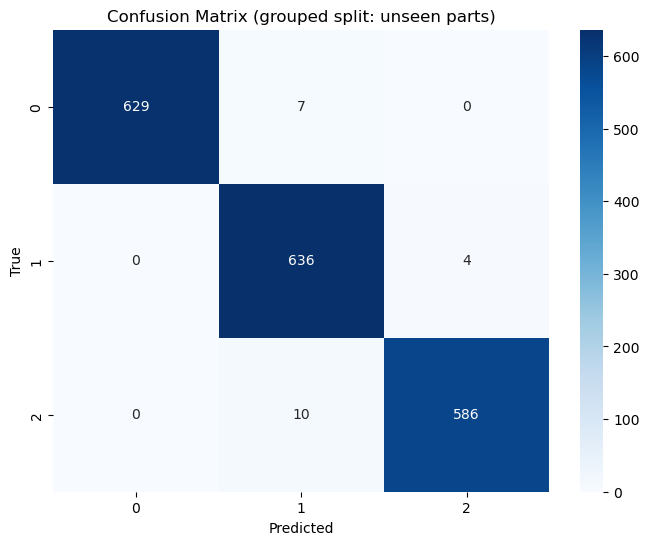


Classification Report (grouped split: unseen parts):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       636
           1       0.97      0.99      0.98       640
           2       0.99      0.98      0.99       596

    accuracy                           0.99      1872
   macro avg       0.99      0.99      0.99      1872
weighted avg       0.99      0.99      0.99      1872

Test Accuracy: 0.9888
Macro F1:      0.9888

Training Accuracy: 0.9997
Testing  Accuracy: 0.9888
Fold 1: Acc=97.17% | Loss=0.1041 | MacroF1=0.9716
Fold 2: Acc=98.11% | Loss=0.0372 | MacroF1=0.9808
Fold 3: Acc=98.87% | Loss=0.0467 | MacroF1=0.9892
Fold 4: Acc=99.34% | Loss=0.0322 | MacroF1=0.9942
Fold 5: Acc=98.27% | Loss=0.0498 | MacroF1=0.9823

------------------------------------------------------------------------
Grouped Cross-Validation summary (unseen parts each fold):
Accuracy: mean 98.36%  (Â± 0.73)
Macro F1: mean 0.9836 (Â± 0.0077)
Loss:     mean 0.0

In [10]:
# ===================== Imports & Reproducibility =====================
import warnings
warnings.filterwarnings('ignore')

import os
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    GroupShuffleSplit, GroupKFold, StratifiedKFold, train_test_split
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, f1_score
)

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Seeds
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# ===================== Config =====================
# If True, 'part' will NOT be used as an input feature (still used for grouping).
# Set to False if you want to let the model see 'part' but keep evaluation strict via grouped splits.
DROP_PART = True

# Grid for exhaustive search (adjust as needed)
GRID = {
    'num_layers':    [1, 2, 3],
    'units':         [16, 32],
    'dropout_rate':  [0.0, 0.2],
    'l2_reg':        [0.0, 1e-4],
    'learning_rate': [1e-3, 3e-3, 1e-2]
}

# ===================== Data Loading =====================
file_path = r"/Users/yaeesh/Downloads/A Systematic AI-based Paradigm for Classifying Hybrid Electric Vehicle Spare Parts Using Their Price and Demand/Demand.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

print("Initial shape:", df.shape)

# ===================== Drop exact duplicates =====================
dup_count = df.duplicated().sum()
if dup_count:
    print(f"Dropping {dup_count} duplicate rows")
    df = df.drop_duplicates().reset_index(drop=True)

# ===================== Target creation (3 balanced bins) =====================
demand_q = df['demand'].quantile([0.33, 0.66])
low_thr = float(demand_q.loc[0.33])
mid_thr = float(demand_q.loc[0.66])
print(f"Demand thresholds (approx): 33%={low_thr:.6f}, 66%={mid_thr:.6f}")

y = pd.qcut(df['demand'], q=3, labels=[0, 1, 2], duplicates='drop').astype(int)

# ===================== Feature grouping =====================
# Candidate categorical code features
cat_cols = [
    'car type',
    'made in',
    'original/imitator',
    'new\\used',
    'selling location',
    'service location (repair shop/automotive company',
    'car total maintenance cost average',
    'part'  # <- identity-like
]

# Continuous features
num_all = [
    'number of cars in jordan',
    'car age',
    'failure rate',
    'price of the car',
    'repair or replacement cost',
    'critically',
    'on line price'
]

# Validate columns exist
missing_cols = [c for c in cat_cols + num_all + ['demand'] if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing expected columns: {missing_cols}")

# Prepare features with optional removal of 'part'
cat_cols_effective = [c for c in cat_cols if not (DROP_PART and c == 'part')]
X = df[cat_cols_effective + num_all].copy()

# Groups for grouped splitting
groups = df['part'].astype(str)

# ===================== Leak check: per-part purity =====================
part_class_counts = pd.crosstab(df['part'], y)
part_purity = part_class_counts.max(axis=1) / part_class_counts.sum(axis=1)
print("\nPer-part purity (how single-class each part is). Top 10 parts by purity:")
print(part_purity.sort_values(ascending=False).head(10))

overall_purity_mean = part_purity.mean()
print(f"\nMean per-part purity: {overall_purity_mean:.4f} "
      f"(1.0 means every part maps to a single class)")

# ===================== Preprocessor =====================
skewed_cols = [
    'on line price',
    'number of cars in jordan',
    'failure rate',
    'repair or replacement cost',
    'critically',
    'price of the car'
]
other_num_cols = [c for c in num_all if c not in skewed_cols]

def make_preprocessor():
    numeric_skew_pipeline = Pipeline(steps=[
        ('log1p', FunctionTransformer(np.log1p, validate=False)),
        ('scaler', StandardScaler())
    ])
    numeric_pipeline = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    # sklearn >=1.2 uses sparse_output; older versions use sparse
    try:
        categorical_pipeline = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    except TypeError:
        categorical_pipeline = OneHotEncoder(handle_unknown='ignore', sparse=False)

    return ColumnTransformer(
        transformers=[
            ('num_skew', numeric_skew_pipeline, skewed_cols),
            ('num',     numeric_pipeline,       other_num_cols),
            ('cat',     categorical_pipeline,   cat_cols_effective)
        ],
        remainder='drop'
    )

# ===================== Grouped Train/Test split (unseen parts in test) =====================
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
groups_train, groups_test = groups.iloc[train_idx], groups.iloc[test_idx]

preprocessor = make_preprocessor()
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

input_dim = X_train_proc.shape[1]
num_classes = 3

# ===================== Model builder (with L2 & dropout) =====================
def build_model(input_dim, num_layers, units, dropout_rate, l2_reg, learning_rate, num_classes=3):
    model = Sequential()
    reg = regularizers.l2(l2_reg) if l2_reg and l2_reg > 0 else None
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(units, activation='relu', kernel_regularizer=reg, input_shape=(input_dim,)))
        else:
            model.add(Dense(units, activation='relu', kernel_regularizer=reg))
        if dropout_rate and dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ===================== Exhaustive Grid Search =====================
def grid_combinations(grid_dict):
    keys = list(grid_dict.keys())
    for values in itertools.product(*(grid_dict[k] for k in keys)):
        yield dict(zip(keys, values))

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)

best_cfg = None
best_val_acc = -np.inf
best_history = None
best_model = None

total_combos = int(np.prod([len(v) for v in GRID.values()]))
print("\nStarting exhaustive grid search over", total_combos, "combinations...")
for idx, cfg in enumerate(grid_combinations(GRID), start=1):
    print(f"Config {idx}/{total_combos}: {cfg}")
    model = build_model(
        input_dim=input_dim,
        num_layers=cfg['num_layers'],
        units=cfg['units'],
        dropout_rate=cfg['dropout_rate'],
        l2_reg=cfg['l2_reg'],
        learning_rate=cfg['learning_rate'],
        num_classes=num_classes
    )
    history = model.fit(
        X_train_proc, y_train,
        epochs=200,
        validation_split=0.2,
        callbacks=[early_stop, reduce_lr],
        verbose=0
    )
    run_best = float(np.max(history.history['val_accuracy']))
    if run_best > best_val_acc:
        best_val_acc = run_best
        best_cfg = cfg
        best_history = history
        best_model = model

print("\nBest grid configuration (val_accuracy):", round(best_val_acc, 4))
print(best_cfg)

# ===================== Train curves for best model =====================
history = best_history

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_validation_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ===================== Test Evaluation (unseen parts) =====================
y_pred_proba = best_model.predict(X_test_proc, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = y_test.to_numpy()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix (grouped split: unseen parts)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nClassification Report (grouped split: unseen parts):")
print(classification_report(y_true, y_pred))
print(f"Test Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Macro F1:      {f1_score(y_true, y_pred, average='macro'):.4f}")

train_loss, train_acc = best_model.evaluate(X_train_proc, y_train, verbose=0)
test_loss,  test_acc  = best_model.evaluate(X_test_proc, y_test,  verbose=0)
print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Testing  Accuracy: {test_acc:.4f}")

# ===================== Grouped Cross-Validation (unseen parts per fold) =====================
num_folds = 5
gkf = GroupKFold(n_splits=num_folds)

acc_per_fold, f1_per_fold, loss_per_fold = [], [], []
fold_no = 1
for train_idx, val_idx in gkf.split(X, y, groups=groups):
    X_train_f, X_val_f = X.iloc[train_idx], X.iloc[val_idx]
    y_train_f, y_val_f = y.iloc[train_idx], y.iloc[val_idx]

    preproc_fold = make_preprocessor().fit(X_train_f)
    X_train_f_proc = preproc_fold.transform(X_train_f)
    X_val_f_proc   = preproc_fold.transform(X_val_f)

    model_fold = build_model(
        input_dim=X_train_f_proc.shape[1],
        num_layers=best_cfg['num_layers'],
        units=best_cfg['units'],
        dropout_rate=best_cfg['dropout_rate'],
        l2_reg=best_cfg['l2_reg'],
        learning_rate=best_cfg['learning_rate'],
        num_classes=num_classes
    )

    hist_f = model_fold.fit(
        X_train_f_proc, y_train_f,
        epochs=200,
        validation_data=(X_val_f_proc, y_val_f),
        callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
                   ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)],
        verbose=0
    )

    loss, acc = model_fold.evaluate(X_val_f_proc, y_val_f, verbose=0)
    y_val_pred = np.argmax(model_fold.predict(X_val_f_proc, verbose=0), axis=1)
    f1 = f1_score(y_val_f, y_val_pred, average='macro')

    print(f"Fold {fold_no}: Acc={acc*100:.2f}% | Loss={loss:.4f} | MacroF1={f1:.4f}")
    acc_per_fold.append(acc * 100)
    f1_per_fold.append(f1)
    loss_per_fold.append(loss)
    fold_no += 1

print('\n' + '-'*72)
print('Grouped Cross-Validation summary (unseen parts each fold):')
print(f"Accuracy: mean {np.mean(acc_per_fold):.2f}%  (Â± {np.std(acc_per_fold):.2f})")
print(f"Macro F1: mean {np.mean(f1_per_fold):.4f} (Â± {np.std(f1_per_fold):.4f})")
print(f"Loss:     mean {np.mean(loss_per_fold):.4f}")
print('-'*72)

# ===================== Save tuned model =====================
best_model.save("demand_clf.keras")
print("Saved tuned model to demand_clf.keras")
print("Best configuration:", best_cfg)

# ===================== Notes =====================
if DROP_PART:
    print("\nNOTE: 'part' was excluded from features (DROP_PART=True). "
          "Evaluation uses unseen parts via grouped splits. "
          "If you set DROP_PART=False, the model may still perform well, "
          "but the grouped split will prevent identity leakage in evaluation.")


# The score with a less accuracy "93%"

Initial shape: (7652, 16)
Dropping 60 duplicate rows

Per-part purity, top 10:
part
2     1.000000
1     0.900000
29    0.829787
6     0.796748
24    0.739130
36    0.702128
18    0.659574
20    0.609524
10    0.608696
15    0.595745
dtype: float64
Mean per-part purity: 0.5293

Train-only thresholds: 33%=1.800064, 66%=5.589000

Class distribution (train):
demand
0    1917
1    1861
2    1942
Name: count, dtype: int64
Class distribution (test):
demand
0    636
1    632
2    604
Name: count, dtype: int64

Row-hash overlap between train and test using model features: 0 rows

Starting exhaustive grid search over 72 combinations...
Config 1/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0, 'learning_rate': 0.001}
Config 2/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0, 'learning_rate': 0.003}
Config 3/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0, 'learning_rate': 0.01}
Config 4/72: {'num_layers': 1, 'units': 16, 'dropout_r

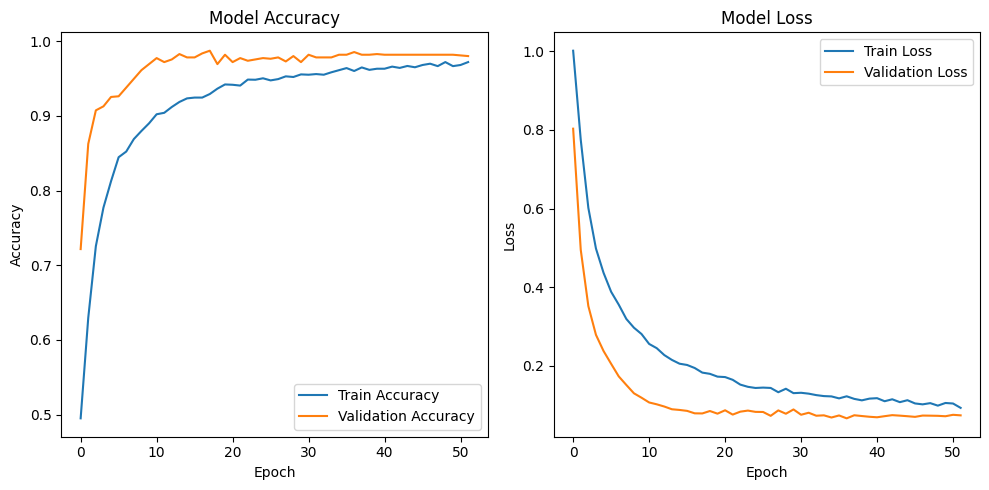

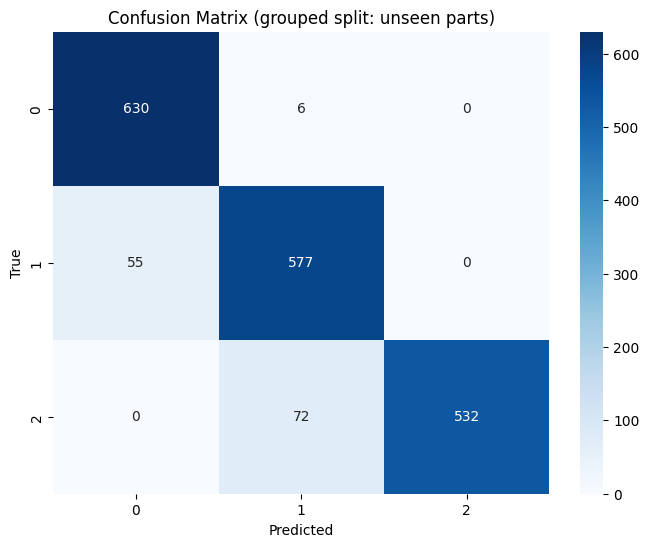


Classification Report (grouped split: unseen parts):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       636
           1       0.88      0.91      0.90       632
           2       1.00      0.88      0.94       604

    accuracy                           0.93      1872
   macro avg       0.93      0.93      0.93      1872
weighted avg       0.93      0.93      0.93      1872

Test Accuracy: 0.9290
Macro F1:      0.9290
Fold 1: Acc=94.81% | Loss=0.1592 | MacroF1=0.9510
Fold 2: Acc=98.37% | Loss=0.0646 | MacroF1=0.9818
Fold 3: Acc=99.14% | Loss=0.0395 | MacroF1=0.9916
Fold 4: Acc=98.95% | Loss=0.0727 | MacroF1=0.9891
Fold 5: Acc=99.34% | Loss=0.0572 | MacroF1=0.9930

------------------------------------------------------------------------
Grouped CV summary (unseen parts each fold):
Accuracy: mean 98.12%  (Â± 1.69)
Macro F1: mean 0.9813 (Â± 0.0156)
Loss:     mean 0.0786
---------------------------------------------------------------

In [ ]:
# ===================== Imports & Reproducibility =====================
import warnings
warnings.filterwarnings('ignore')

import os
import random
import itertools
import hashlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    GroupShuffleSplit, GroupKFold
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, f1_score
)
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Seeds
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# ===================== Config =====================
# Exclude 'part' from features (still used for grouping)
DROP_PART = True

# Grid for exhaustive search
GRID = {
    'num_layers':    [1, 2, 3],
    'units':         [16, 32],
    'dropout_rate':  [0.0, 0.2],
    'l2_reg':        [0.0, 1e-4],
    'learning_rate': [1e-3, 3e-3, 1e-2]
}

# ===================== Load & clean (relative path) =====================
from pathlib import Path  # safe to keep even if already imported above

file_path = Path("data") / "demand.csv"
if not file_path.exists():
    raise FileNotFoundError(
        f"Expected CSV at {file_path.resolve()} â€” create a 'data' folder next to the repo root and put demand.csv there."
    )

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
print("Initial shape:", df.shape)


# Drop exact duplicates
dup_count = df.duplicated().sum()
if dup_count:
    print(f"Dropping {dup_count} duplicate rows")
    df = df.drop_duplicates().reset_index(drop=True)

# ===================== Feature schema =====================
cat_cols = [
    'car type',
    'made in',
    'original/imitator',
    'new\\used',
    'selling location',
    'service location (repair shop/automotive company',
    'car total maintenance cost average',
    'part'  # identity-like
]

num_all = [
    'number of cars in jordan',
    'car age',
    'failure rate',
    'price of the car',
    'repair or replacement cost',
    'critically',
    'on line price'
]

missing_cols = [c for c in cat_cols + num_all + ['demand'] if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing expected columns: {missing_cols}")

cat_cols_effective = [c for c in cat_cols if not (DROP_PART and c == 'part')]
X_all = df[cat_cols_effective + num_all].copy()
groups_all = df['part'].astype(str)  # for grouped splits

# For numeric transforms
skewed_cols = [
    'on line price',
    'number of cars in jordan',
    'failure rate',
    'repair or replacement cost',
    'critically',
    'price of the car'
]
other_num_cols = [c for c in num_all if c not in skewed_cols]

# ===================== Helper functions =====================
def compute_thresholds_from_train(demand_series, q_low=0.33, q_high=0.66):
    q = demand_series.quantile([q_low, q_high])
    return float(q.loc[q_low]), float(q.loc[q_high])

def bin_with_thresholds(demand_series, low_thr, high_thr):
    return pd.cut(demand_series,
                  bins=[-np.inf, low_thr, high_thr, np.inf],
                  labels=[0, 1, 2]).astype(int)

def make_preprocessor():
    numeric_skew_pipeline = Pipeline(steps=[
        ('log1p', FunctionTransformer(np.log1p, validate=False)),
        ('scaler', StandardScaler())
    ])
    numeric_pipeline = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    # Version-compatible OneHotEncoder
    try:
        categorical_pipeline = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    except TypeError:
        categorical_pipeline = OneHotEncoder(handle_unknown='ignore', sparse=False)

    return ColumnTransformer(
        transformers=[
            ('num_skew', numeric_skew_pipeline, skewed_cols),
            ('num',     numeric_pipeline,       other_num_cols),
            ('cat',     categorical_pipeline,   cat_cols_effective)
        ],
        remainder='drop'
    )

def build_model(input_dim, num_layers, units, dropout_rate, l2_reg, learning_rate, num_classes=3):
    model = Sequential()
    reg = regularizers.l2(l2_reg) if l2_reg and l2_reg > 0 else None
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(units, activation='relu', kernel_regularizer=reg, input_shape=(input_dim,)))
        else:
            model.add(Dense(units, activation='relu', kernel_regularizer=reg))
        if dropout_rate and dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def grid_combinations(grid_dict):
    keys = list(grid_dict.keys())
    for values in itertools.product(*(grid_dict[k] for k in keys)):
        yield dict(zip(keys, values))

def hash_rows(df_like):
    """Create a stable hash per row using the actual feature columns used by the model."""
    # Convert to strings with controlled formatting
    str_df = df_like.copy()
    for c in str_df.columns:
        if pd.api.types.is_float_dtype(str_df[c]) or pd.api.types.is_integer_dtype(str_df[c]):
            str_df[c] = str_df[c].astype(float).map(lambda x: f"{x:.12g}")
        else:
            str_df[c] = str_df[c].astype(str)
    concat = str_df.apply(lambda r: '||'.join(r.values.astype(str)), axis=1)
    return concat.map(lambda s: hashlib.md5(s.encode('utf-8')).hexdigest())

# ===================== Per-part purity (leakage hint) =====================
# Using full data for a quick diagnostic (not for labeling)
tmp_low, tmp_high = compute_thresholds_from_train(df['demand'])  # approximate
tmp_y = bin_with_thresholds(df['demand'], tmp_low, tmp_high)
part_class_counts = pd.crosstab(df['part'], tmp_y)
part_purity = part_class_counts.max(axis=1) / part_class_counts.sum(axis=1)
print("\nPer-part purity, top 10:")
print(part_purity.sort_values(ascending=False).head(10))
print(f"Mean per-part purity: {part_purity.mean():.4f}")

# ===================== Outer grouped train/test split =====================
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
train_idx, test_idx = next(gss.split(X_all, None, groups=groups_all))

X_train_raw, X_test_raw = X_all.iloc[train_idx], X_all.iloc[test_idx]
groups_train, groups_test = groups_all.iloc[train_idx], groups_all.iloc[test_idx]
demand_train, demand_test = df['demand'].iloc[train_idx], df['demand'].iloc[test_idx]

# Create labels using thresholds from TRAIN ONLY
low_thr, high_thr = compute_thresholds_from_train(demand_train)
print(f"\nTrain-only thresholds: 33%={low_thr:.6f}, 66%={high_thr:.6f}")
y_train = bin_with_thresholds(demand_train, low_thr, high_thr)
y_test  = bin_with_thresholds(demand_test,  low_thr, high_thr)

# Class distribution check
print("\nClass distribution (train):")
print(y_train.value_counts().sort_index())
print("Class distribution (test):")
print(y_test.value_counts().sort_index())

# ===================== Row-hash overlap audit =====================
# Using the exact feature set the model will see
train_hash = hash_rows(X_train_raw)
test_hash  = hash_rows(X_test_raw)
overlap = set(train_hash).intersection(set(test_hash))
print(f"\nRow-hash overlap between train and test using model features: {len(overlap)} rows")
if len(overlap) > 0:
    print("WARNING: Identical feature rows detected across train and test. Investigate potential duplicates.")

# ===================== Exhaustive grid search with grouped inner validation =====================
# Use a grouped validation carve-out from training for model selection.
inner_gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
inner_tr_idx, inner_val_idx = next(inner_gss.split(X_train_raw, y_train, groups=groups_train))
X_inner_tr_raw = X_train_raw.iloc[inner_tr_idx]
X_inner_val_raw = X_train_raw.iloc[inner_val_idx]
y_inner_tr = y_train.iloc[inner_tr_idx]
y_inner_val = y_train.iloc[inner_val_idx]

# Fit a fresh preprocessor on inner-train only (no leakage)
def fit_transform_preprocessor(X_tr_raw, X_val_raw):
    pre = make_preprocessor()
    X_tr = pre.fit_transform(X_tr_raw)
    X_val = pre.transform(X_val_raw)
    return pre, X_tr, X_val

best_cfg = None
best_val_f1 = -np.inf
best_model = None
best_history = None

total_combos = int(np.prod([len(v) for v in GRID.values()]))
print(f"\nStarting exhaustive grid search over {total_combos} combinations...")
for idx, cfg in enumerate(grid_combinations(GRID), start=1):
    print(f"Config {idx}/{total_combos}: {cfg}")
    pre_gs, X_inner_tr, X_inner_val = fit_transform_preprocessor(X_inner_tr_raw, X_inner_val_raw)
    input_dim = X_inner_tr.shape[1]

    model = build_model(
        input_dim=input_dim,
        num_layers=cfg['num_layers'],
        units=cfg['units'],
        dropout_rate=cfg['dropout_rate'],
        l2_reg=cfg['l2_reg'],
        learning_rate=cfg['learning_rate'],
        num_classes=3
    )

    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)

    history = model.fit(
        X_inner_tr, y_inner_tr,
        epochs=200,
        validation_data=(X_inner_val, y_inner_val),
        callbacks=[early_stop, reduce_lr],
        verbose=0
    )

    y_val_pred = np.argmax(model.predict(X_inner_val, verbose=0), axis=1)
    f1 = f1_score(y_inner_val, y_val_pred, average='macro')
    if f1 > best_val_f1:
        best_val_f1 = f1
        best_cfg = cfg
        best_model = model
        best_history = history
        best_preprocessor = pre_gs

print("\nBest grid configuration (inner grouped val macro F1):", round(best_val_f1, 4))
print(best_cfg)

# ===================== Retrain on full training set, with grouped inner val =====================
# Fresh preprocessor fitted on the full outer training set only
preprocessor_full = make_preprocessor()
X_train_proc = preprocessor_full.fit_transform(X_train_raw)
X_test_proc  = preprocessor_full.transform(X_test_raw)
input_dim = X_train_proc.shape[1]

# Build best model and carve a grouped validation from training for early stopping
inner_tr_idx2, inner_val_idx2 = next(inner_gss.split(X_train_raw, y_train, groups=groups_train))
X_tr2_raw, X_val2_raw = X_train_raw.iloc[inner_tr_idx2], X_train_raw.iloc[inner_val_idx2]
y_tr2, y_val2 = y_train.iloc[inner_tr_idx2], y_train.iloc[inner_val_idx2]
pre_ep = make_preprocessor()
X_tr2 = pre_ep.fit_transform(X_tr2_raw)
X_val2 = pre_ep.transform(X_val2_raw)

model = build_model(
    input_dim=input_dim,
    num_layers=best_cfg['num_layers'],
    units=best_cfg['units'],
    dropout_rate=best_cfg['dropout_rate'],
    l2_reg=best_cfg['l2_reg'],
    learning_rate=best_cfg['learning_rate'],
    num_classes=3
)

early_stop_final = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr_final  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)

history = model.fit(
    X_tr2, y_tr2,
    epochs=200,
    validation_data=(X_val2, y_val2),
    callbacks=[early_stop_final, reduce_lr_final],
    verbose=0
)

# ===================== Plots =====================
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

plt.tight_layout()
plt.savefig('training_validation_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ===================== Test evaluation (unseen parts) =====================
y_pred_proba = model.predict(X_test_proc, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = y_test.to_numpy()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix (grouped split: unseen parts)')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nClassification Report (grouped split: unseen parts):")
print(classification_report(y_true, y_pred))
print(f"Test Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Macro F1:      {f1_score(y_true, y_pred, average='macro'):.4f}")

# ===================== Grouped CV with per-fold thresholds & preprocessing =====================
num_folds = 5
gkf = GroupKFold(n_splits=num_folds)

acc_per_fold, f1_per_fold, loss_per_fold = [], [], []
fold_no = 1
for tr_idx, val_idx in gkf.split(X_all, None, groups=groups_all):
    X_tr_raw, X_val_raw = X_all.iloc[tr_idx], X_all.iloc[val_idx]
    demand_tr, demand_val = df['demand'].iloc[tr_idx], df['demand'].iloc[val_idx]

    # Fold-specific thresholds from training portion
    low_f, high_f = compute_thresholds_from_train(demand_tr)
    y_tr_f = bin_with_thresholds(demand_tr, low_f, high_f)
    y_val_f = bin_with_thresholds(demand_val, low_f, high_f)

    pre_fold = make_preprocessor()
    X_tr = pre_fold.fit_transform(X_tr_raw)
    X_val = pre_fold.transform(X_val_raw)

    model_fold = build_model(
        input_dim=X_tr.shape[1],
        num_layers=best_cfg['num_layers'],
        units=best_cfg['units'],
        dropout_rate=best_cfg['dropout_rate'],
        l2_reg=best_cfg['l2_reg'],
        learning_rate=best_cfg['learning_rate'],
        num_classes=3
    )

    hist_f = model_fold.fit(
        X_tr, y_tr_f,
        epochs=200,
        validation_data=(X_val, y_val_f),
        callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
                   ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)],
        verbose=0
    )

    loss, acc = model_fold.evaluate(X_val, y_val_f, verbose=0)
    y_val_pred = np.argmax(model_fold.predict(X_val, verbose=0), axis=1)
    f1 = f1_score(y_val_f, y_val_pred, average='macro')

    print(f"Fold {fold_no}: Acc={acc*100:.2f}% | Loss={loss:.4f} | MacroF1={f1:.4f}")
    acc_per_fold.append(acc * 100); f1_per_fold.append(f1); loss_per_fold.append(loss)
    fold_no += 1

print('\n' + '-'*72)
print('Grouped CV summary (unseen parts each fold):')
print(f"Accuracy: mean {np.mean(acc_per_fold):.2f}%  (Â± {np.std(acc_per_fold):.2f})")
print(f"Macro F1: mean {np.mean(f1_per_fold):.4f} (Â± {np.std(f1_per_fold):.4f})")
print(f"Loss:     mean {np.mean(loss_per_fold):.4f}")
print('-'*72)

# ===================== Single-feature leakage audit (grouped CV) =====================
def single_feature_cv_score(feature_name):
    # Build a tiny pipeline: transform only this feature, then multinomial logistic regression
    if feature_name in cat_cols_effective:
        try:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        except TypeError:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
        pipe = Pipeline([('ohe', ohe),
                         ('clf', LogisticRegression(max_iter=2000, multi_class='multinomial'))])
        X_feat = df[[feature_name]].astype(str)
    else:
        # numeric
        steps = []
        if feature_name in skewed_cols:
            steps.append(('log1p', FunctionTransformer(np.log1p, validate=False)))
        steps.append(('scaler', StandardScaler()))
        steps.append(('clf', LogisticRegression(max_iter=2000, multi_class='multinomial')))
        pipe = Pipeline(steps)
        X_feat = df[[feature_name]].copy()

    # grouped CV with per-fold thresholds
    f1_scores = []
    for tr_idx, val_idx in gkf.split(X_all, None, groups=groups_all):
        d_tr = df['demand'].iloc[tr_idx]; d_val = df['demand'].iloc[val_idx]
        low_f, high_f = compute_thresholds_from_train(d_tr)
        y_tr_f = bin_with_thresholds(d_tr, low_f, high_f)
        y_val_f = bin_with_thresholds(d_val, low_f, high_f)

        X_tr_f = X_feat.iloc[tr_idx]; X_val_f = X_feat.iloc[val_idx]
        pipe.fit(X_tr_f, y_tr_f)
        y_val_pred = pipe.predict(X_val_f)
        f1_scores.append(f1_score(y_val_f, y_val_pred, average='macro'))

    return np.mean(f1_scores)

features_to_audit = cat_cols_effective + num_all
audit_results = []
print("\nRunning single-feature leakage audit (grouped CV, macro F1 per feature)...")
for feat in features_to_audit:
    score = single_feature_cv_score(feat)
    audit_results.append((feat, score))
audit_results.sort(key=lambda x: x[1], reverse=True)
print("Top 10 features by single-feature macro F1:")
for name, sc in audit_results[:10]:
    print(f"{name:45s} {sc:.4f}")

# Flag suspicious features
suspicious = [(n, s) for n, s in audit_results if s >= 0.99]
if suspicious:
    print("\nWARNING: These features alone achieve near-perfect classification under grouped CV:")
    for n, s in suspicious:
        print(f"  - {n}: macro F1 {s:.4f}")
    print("Review whether they encode target information directly or leak future knowledge.")

# ===================== Save tuned model & thresholds =====================
model.save("demand_clf.keras")
# Save the outer train thresholds so you can reuse them in deployment
with open("label_thresholds.txt", "w") as f:
    f.write(f"{low_thr},{high_thr}\n")
print("\nSaved tuned model to demand_clf.keras")
print("Saved train-only label thresholds to label_thresholds.txt")
print("Best configuration:", GRID if best_cfg is None else best_cfg)


# 1) Comparative baselines (LogReg, RandomForest, GradientBoosting) â€” grouped CV + held-out test

In [1]:
# ===== Comparative Baselines: LogReg, RandomForest, GradientBoosting =====
# - Absolute path to CSV
# - Grouped CV (by `part`) with fold-specific thresholds (q33/q66 from train portion)
# - Held-out test split (unseen parts) with train-only thresholds
# - Prints detailed tables + per-model classification reports (no files saved)

import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import GroupShuffleSplit, GroupKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, f1_score, precision_recall_fscore_support,
    classification_report, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# ---------------- Config ----------------
SEED = 42
np.random.seed(SEED)

# <-- UPDATE THIS ABSOLUTE PATH IF NEEDED -->
FILE_PATH = r"H:\DOWNLOADS\Codes in Vs Studio\hev-demand\data\Demand.csv"

DROP_PART = True  # exclude 'part' from features (still used only for grouping)

# ---------------- Load ----------------
df = pd.read_csv(FILE_PATH)
df.columns = df.columns.str.strip()
if df.duplicated().sum():
    df = df.drop_duplicates().reset_index(drop=True)

# ---------------- Columns ----------------
cat_cols = [
    'car type',
    'made in',
    'original/imitator',
    'new\\used',
    'selling location',
    'service location (repair shop/automotive company',
    'car total maintenance cost average',
    'part'  # identity-like (for grouping; we can drop as a feature)
]
num_all = [
    'number of cars in jordan',
    'car age',
    'failure rate',
    'price of the car',
    'repair or replacement cost',
    'critically',
    'on line price'
]
missing = [c for c in cat_cols + num_all + ['demand'] if c not in df.columns]
if missing:
    raise ValueError(f"Missing expected columns: {missing}")

cat_cols_effective = [c for c in cat_cols if not (DROP_PART and c == 'part')]

# ---------------- Helpers ----------------
def compute_thresholds_from_train(demand_series, q_low=0.33, q_high=0.66):
    q = demand_series.quantile([q_low, q_high])
    return float(q.loc[q_low]), float(q.loc[q_high])

def bin_with_thresholds(demand_series, low_thr, high_thr):
    return pd.cut(demand_series, bins=[-np.inf, low_thr, high_thr, np.inf],
                  labels=[0, 1, 2]).astype(int)

skewed_cols = [
    'on line price',
    'number of cars in jordan',
    'failure rate',
    'repair or replacement cost',
    'critically',
    'price of the car'
]
other_num_cols = [c for c in num_all if c not in skewed_cols]

def make_preprocessor():
    # version-compatible OHE
    try:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
    numeric_skew = Pipeline([('log1p', FunctionTransformer(np.log1p, validate=False)),
                             ('scaler', StandardScaler())])
    numeric_std  = Pipeline([('scaler', StandardScaler())])
    return ColumnTransformer(
        transformers=[
            ('num_skew', numeric_skew, skewed_cols),
            ('num',     numeric_std,  other_num_cols),
            ('cat',     ohe,          cat_cols_effective),
        ],
        remainder='drop'
    )

# ---------------- Data frames used for splits ----------------
X_all = df[cat_cols_effective + num_all].copy()
groups_all = df['part'].astype(str)
demand_all = df['demand']

# ---------------- Outer held-out test split (unseen parts) ----------------
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
train_idx, test_idx = next(gss.split(X_all, None, groups=groups_all))
X_train_raw, X_test_raw = X_all.iloc[train_idx], X_all.iloc[test_idx]
groups_train = groups_all.iloc[train_idx]
demand_train = demand_all.iloc[train_idx]
demand_test  = demand_all.iloc[test_idx]

low_thr, high_thr = compute_thresholds_from_train(demand_train, 0.33, 0.66)
y_train = bin_with_thresholds(demand_train, low_thr, high_thr)
y_test  = bin_with_thresholds(demand_test,  low_thr,  high_thr)

pre_outer = make_preprocessor()
X_train = pre_outer.fit_transform(X_train_raw)
X_test  = pre_outer.transform(X_test_raw)

# ---------------- Baseline models ----------------
models = {
    "LogisticRegression": LogisticRegression(max_iter=4000, multi_class='multinomial', random_state=SEED),
    "RandomForest": RandomForestClassifier(n_estimators=400, random_state=SEED, n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(random_state=SEED)
}

# ---------------- Grouped CV (5-fold) with fold-specific thresholds ----------------
gkf = GroupKFold(n_splits=5)
cv_rows = []

for model_name, clf in models.items():
    fold_acc, fold_f1 = [], []
    for tr_idx, val_idx in gkf.split(X_all, None, groups=groups_all):
        X_tr_raw, X_val_raw = X_all.iloc[tr_idx], X_all.iloc[val_idx]
        d_tr, d_val = demand_all.iloc[tr_idx], demand_all.iloc[val_idx]

        low_f, high_f = compute_thresholds_from_train(d_tr, 0.33, 0.66)
        y_tr = bin_with_thresholds(d_tr,  low_f, high_f)
        y_val = bin_with_thresholds(d_val, low_f, high_f)

        pre = make_preprocessor()
        X_tr = pre.fit_transform(X_tr_raw)
        X_val = pre.transform(X_val_raw)

        m = clf.__class__(**clf.get_params())
        m.fit(X_tr, y_tr)
        y_pred = m.predict(X_val)

        fold_acc.append(accuracy_score(y_val, y_pred))
        fold_f1.append(f1_score(y_val, y_pred, average='macro'))

    cv_rows.append({
        "model": model_name,
        "cv_acc_mean": np.mean(fold_acc),
        "cv_acc_std":  np.std(fold_acc),
        "cv_macro_f1_mean": np.mean(fold_f1),
        "cv_macro_f1_std":  np.std(fold_f1),
        "n_folds": len(fold_acc)
    })

cv_df = pd.DataFrame(cv_rows).sort_values("cv_macro_f1_mean", ascending=False)
print("\n=== Grouped 5-fold CV (fold thresholds from train portion) ===")
print(cv_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# ---------------- Train on full train, evaluate on held-out test ----------------
test_rows = []
print("\n=== Held-out Test (outer split; thresholds from train portion) ===")
for model_name, clf in models.items():
    m = clf.__class__(**clf.get_params())
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average='macro')
    pr, rc, f1_per, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0,1,2])

    test_rows.append({
        "model": model_name,
        "test_acc": acc,
        "test_macro_f1": f1m,
        "prec_0": pr[0], "rec_0": rc[0], "f1_0": f1_per[0],
        "prec_1": pr[1], "rec_1": rc[1], "f1_1": f1_per[1],
        "prec_2": pr[2], "rec_2": rc[2], "f1_2": f1_per[2],
    })

    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {acc:.4f} | Macro F1: {f1m:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, digits=4))
    # Confusion matrix (rows: true, cols: pred)
    cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
    cm_df = pd.DataFrame(cm, index=['true_0','true_1','true_2'], columns=['pred_0','pred_1','pred_2'])
    print("Confusion matrix:\n", cm_df)

test_df = pd.DataFrame(test_rows).sort_values("test_macro_f1", ascending=False)
print("\n=== Test Summary (sorted by macro F1) ===")
print(test_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))


h:\DOWNLOADS\Codes in Vs Studio\hev-demand\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
h:\DOWNLOADS\Codes in Vs Studio\hev-demand\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
h:\DOWNLOADS\Codes in Vs Studio\hev-demand\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
h:\DOWNLOADS\Codes in Vs Studio\hev-demand\.venv\Lib\site-packag


=== Grouped 5-fold CV (fold thresholds from train portion) ===
             model  cv_acc_mean  cv_acc_std  cv_macro_f1_mean  cv_macro_f1_std  n_folds
  GradientBoosting       0.9857      0.0083            0.9855           0.0082        5
      RandomForest       0.9657      0.0113            0.9663           0.0115        5
LogisticRegression       0.9191      0.0173            0.9185           0.0195        5

=== Held-out Test (outer split; thresholds from train portion) ===


h:\DOWNLOADS\Codes in Vs Studio\hev-demand\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



--- LogisticRegression ---
Accuracy: 0.9354 | Macro F1: 0.9361

Classification report:
              precision    recall  f1-score   support

           0     0.9628    0.9355    0.9490       636
           1     0.8785    0.9383    0.9074       632
           2     0.9724    0.9321    0.9518       604

    accuracy                         0.9354      1872
   macro avg     0.9379    0.9353    0.9361      1872
weighted avg     0.9374    0.9354    0.9359      1872

Confusion matrix:
         pred_0  pred_1  pred_2
true_0     595      41       0
true_1      23     593      16
true_2       0      41     563

--- RandomForest ---
Accuracy: 0.9829 | Macro F1: 0.9828

Classification report:
              precision    recall  f1-score   support

           0     0.9953    0.9937    0.9945       636
           1     0.9777    0.9715    0.9746       632
           2     0.9754    0.9834    0.9794       604

    accuracy                         0.9829      1872
   macro avg     0.9828    0.9829 

# 2) Threshold choice robustness (sweep several quantile pairs) â€” grouped CV + (optional) held-out test for top pair

In [2]:
# ===== Threshold Choice Robustness (quantile sweep) =====
# - Absolute CSV path
# - Sweep quantile pairs (e.g., (0.30,0.70), (0.33,0.66), (0.40,0.60), etc.)
# - Grouped 5-fold CV using a fast baseline (LogisticRegression)
# - Also evaluates the best pair on the same outer held-out test split
# - Prints detailed tables only (no files saved)

import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import GroupKFold, GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# ---------------- Config ----------------
SEED = 42
np.random.seed(SEED)

# <-- UPDATE THIS ABSOLUTE PATH IF NEEDED -->
FILE_PATH = r"H:\DOWNLOADS\Codes in Vs Studio\hev-demand\data\Demand.csv"

DROP_PART = True
QUANTILE_PAIRS = [
    (0.25, 0.75),
    (0.30, 0.70),
    (0.33, 0.66),  # current default
    (0.35, 0.65),
    (0.40, 0.60),
]

# ---------------- Load ----------------
df = pd.read_csv(FILE_PATH)
df.columns = df.columns.str.strip()
if df.duplicated().sum():
    df = df.drop_duplicates().reset_index(drop=True)

# ---------------- Columns ----------------
cat_cols = [
    'car type',
    'made in',
    'original/imitator',
    'new\\used',
    'selling location',
    'service location (repair shop/automotive company',
    'car total maintenance cost average',
    'part'
]
num_all = [
    'number of cars in jordan',
    'car age',
    'failure rate',
    'price of the car',
    'repair or replacement cost',
    'critically',
    'on line price'
]
missing = [c for c in cat_cols + num_all + ['demand'] if c not in df.columns]
if missing:
    raise ValueError(f"Missing expected columns: {missing}")

cat_cols_effective = [c for c in cat_cols if not (DROP_PART and c == 'part')]

skewed_cols = [
    'on line price',
    'number of cars in jordan',
    'failure rate',
    'repair or replacement cost',
    'critically',
    'price of the car'
]
other_num_cols = [c for c in num_all if c not in skewed_cols]

def make_preprocessor():
    try:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
    numeric_skew = Pipeline([('log1p', FunctionTransformer(np.log1p, validate=False)),
                             ('scaler', StandardScaler())])
    numeric_std  = Pipeline([('scaler', StandardScaler())])
    return ColumnTransformer(
        transformers=[
            ('num_skew', numeric_skew, skewed_cols),
            ('num',     numeric_std,  other_num_cols),
            ('cat',     ohe,          cat_cols_effective),
        ],
        remainder='drop'
    )

def compute_thresholds_from_train(demand_series, q_low, q_high):
    q = demand_series.quantile([q_low, q_high])
    return float(q.loc[q_low]), float(q.loc[q_high])

def bin_with_thresholds(demand_series, low_thr, high_thr):
    return pd.cut(demand_series, bins=[-np.inf, low_thr, high_thr, np.inf],
                  labels=[0, 1, 2]).astype(int)

X_all = df[cat_cols_effective + num_all].copy()
groups_all = df['part'].astype(str)
demand_all = df['demand']

# ---------------- Grouped CV sweep ----------------
gkf = GroupKFold(n_splits=5)
base = LogisticRegression(max_iter=4000, multi_class='multinomial', random_state=SEED)

sweep_rows = []
for (qL, qH) in QUANTILE_PAIRS:
    fold_acc, fold_f1 = [], []
    for tr_idx, val_idx in gkf.split(X_all, None, groups=groups_all):
        X_tr_raw, X_val_raw = X_all.iloc[tr_idx], X_all.iloc[val_idx]
        d_tr, d_val = demand_all.iloc[tr_idx], demand_all.iloc[val_idx]

        low_f, high_f = compute_thresholds_from_train(d_tr, qL, qH)
        y_tr = bin_with_thresholds(d_tr,  low_f, high_f)
        y_val = bin_with_thresholds(d_val, low_f, high_f)

        pre = make_preprocessor()
        X_tr = pre.fit_transform(X_tr_raw)
        X_val = pre.transform(X_val_raw)

        m = LogisticRegression(max_iter=4000, multi_class='multinomial', random_state=SEED)
        m.fit(X_tr, y_tr)
        y_pred = m.predict(X_val)

        fold_acc.append(accuracy_score(y_val, y_pred))
        fold_f1.append(f1_score(y_val, y_pred, average='macro'))

    sweep_rows.append({
        "q_low": qL, "q_high": qH,
        "cv_acc_mean": np.mean(fold_acc), "cv_acc_std": np.std(fold_acc),
        "cv_macro_f1_mean": np.mean(fold_f1), "cv_macro_f1_std": np.std(fold_f1),
        "n_folds": len(fold_acc)
    })

sweep_df = pd.DataFrame(sweep_rows).sort_values("cv_macro_f1_mean", ascending=False)
print("\n=== Threshold Robustness (Grouped 5-fold CV, LogisticRegression) ===")
print(sweep_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

best_qL, best_qH = sweep_df.iloc[0][["q_low","q_high"]].astype(float)
print(f"\nBest quantile pair by CV macro-F1: (low={best_qL:.2f}, high={best_qH:.2f})")

# ---------------- Also evaluate best pair on a held-out test split ----------------
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
tr_idx, te_idx = next(gss.split(X_all, None, groups=groups_all))
X_tr_raw, X_te_raw = X_all.iloc[tr_idx], X_all.iloc[te_idx]
d_tr, d_te = demand_all.iloc[tr_idx], demand_all.iloc[te_idx]

low_best, high_best = compute_thresholds_from_train(d_tr, best_qL, best_qH)
y_tr = bin_with_thresholds(d_tr, low_best, high_best)
y_te = bin_with_thresholds(d_te, low_best, high_best)

pre = make_preprocessor()
X_tr = pre.fit_transform(X_tr_raw)
X_te = pre.transform(X_te_raw)

m = LogisticRegression(max_iter=4000, multi_class='multinomial', random_state=SEED)
m.fit(X_tr, y_tr)
y_pred = m.predict(X_te)

acc = accuracy_score(y_te, y_pred)
f1m = f1_score(y_te, y_pred, average='macro')

print(f"\n=== Held-out Test with best thresholds (low={best_qL:.2f}, high={best_qH:.2f}) ===")
print(f"Accuracy: {acc:.4f} | Macro F1: {f1m:.4f}")
print("\nClassification report:")
print(classification_report(y_te, y_pred, digits=4))


h:\DOWNLOADS\Codes in Vs Studio\hev-demand\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
h:\DOWNLOADS\Codes in Vs Studio\hev-demand\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
h:\DOWNLOADS\Codes in Vs Studio\hev-demand\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
h:\DOWNLOADS\Codes in Vs Studio\hev-demand\.venv\Lib\site-packag


=== Threshold Robustness (Grouped 5-fold CV, LogisticRegression) ===
 q_low  q_high  cv_acc_mean  cv_acc_std  cv_macro_f1_mean  cv_macro_f1_std  n_folds
0.2500  0.7500       0.9262      0.0128            0.9251           0.0138        5
0.3300  0.6600       0.9191      0.0173            0.9185           0.0195        5
0.3000  0.7000       0.9142      0.0107            0.9156           0.0120        5
0.3500  0.6500       0.9060      0.0196            0.9026           0.0227        5
0.4000  0.6000       0.8897      0.0102            0.8620           0.0118        5

Best quantile pair by CV macro-F1: (low=0.25, high=0.75)

=== Held-out Test with best thresholds (low=0.25, high=0.75) ===
Accuracy: 0.9306 | Macro F1: 0.9298

Classification report:
              precision    recall  f1-score   support

           0     0.9401    0.8833    0.9108       480
           1     0.9197    0.9482    0.9337       966
           2     0.9459    0.9437    0.9448       426

    accuracy            

# 3)five non-tree models

In [4]:
# ===== Five non-tree baselines on grouped split (unseen parts) =====
# Models: LogisticRegression, LinearSVC, RBF SVC, kNN, Linear Discriminant Analysis
# Prints accuracy, macro-F1, classification report, confusion matrix, and a summary table.
# No files are written.

import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# ---------- Config ----------
FILE_PATH = r"H:\DOWNLOADS\Codes in Vs Studio\hev-demand\data\Demand.csv"
SEED = 42
np.random.seed(SEED)

# Feature schema (match your notebook)
cat_cols = [
    'car type',
    'made in',
    'original/imitator',
    'new\\used',
    'selling location',
    'service location (repair shop/automotive company',
    'car total maintenance cost average',
    'part'  # used for grouping; optionally dropped from features
]
num_all = [
    'number of cars in jordan',
    'car age',
    'failure rate',
    'price of the car',
    'repair or replacement cost',
    'critically',
    'on line price'
]
skewed_cols = [
    'on line price',
    'number of cars in jordan',
    'failure rate',
    'repair or replacement cost',
    'critically',
    'price of the car'
]
other_num_cols = [c for c in num_all if c not in skewed_cols]

DROP_PART = True  # exclude 'part' from features, but still use for grouping
TARGET = 'demand'
q_low, q_high = 0.33, 0.66  # train-only thresholds for 3-class binning

# ---------- Load ----------
df = pd.read_csv(FILE_PATH)
df.columns = df.columns.str.strip()

missing_cols = [c for c in cat_cols + num_all + [TARGET] if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing expected columns: {missing_cols}")

cat_cols_effective = [c for c in cat_cols if not (DROP_PART and c == 'part')]
X_all = df[cat_cols_effective + num_all].copy()
groups_all = df['part'].astype(str)
y_cont = df[TARGET]

# ---------- Label binning using TRAIN-ONLY thresholds ----------
def compute_thresholds_from_train(y, ql, qh):
    q = y.quantile([ql, qh])
    return float(q.loc[ql]), float(q.loc[qh])

def bin_with_thresholds(y, low_thr, high_thr):
    return pd.cut(y, bins=[-np.inf, low_thr, high_thr, np.inf],
                  labels=[0,1,2]).astype(int)

# ---------- Preprocessor (same as your main notebook) ----------
def make_preprocessor():
    num_skew = Pipeline(steps=[
        ('log1p', FunctionTransformer(np.log1p, validate=False)),
        ('scaler', StandardScaler())
    ])
    num_pipe = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    try:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
    pre = ColumnTransformer(
        transformers=[
            ('num_skew', num_skew, skewed_cols),
            ('num',     num_pipe, other_num_cols),
            ('cat',     ohe,      cat_cols_effective)
        ],
        remainder='drop'
    )
    return pre

# ---------- Grouped split by part ----------
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
train_idx, test_idx = next(gss.split(X_all, None, groups=groups_all))
X_train_raw, X_test_raw = X_all.iloc[train_idx], X_all.iloc[test_idx]
groups_train, groups_test = groups_all.iloc[train_idx], groups_all.iloc[test_idx]
y_train_cont, y_test_cont = y_cont.iloc[train_idx], y_cont.iloc[test_idx]

low_thr, high_thr = compute_thresholds_from_train(y_train_cont, q_low, q_high)
y_train = bin_with_thresholds(y_train_cont, low_thr, high_thr).to_numpy()
y_test  = bin_with_thresholds(y_test_cont,  low_thr, high_thr).to_numpy()

print(f"Train-only thresholds: q{q_low:.2f}={low_thr:.6f}, q{q_high:.2f}={high_thr:.6f}")
print("Class distribution (train):", pd.Series(y_train).value_counts().sort_index().to_dict())
print("Class distribution (test): ", pd.Series(y_test).value_counts().sort_index().to_dict())

# ---------- Models (5 non-tree) ----------
models = [
    ("LogisticRegression", LogisticRegression(max_iter=5000)),
    ("LinearSVC",          LinearSVC()),
    ("SVC_RBF",            SVC(kernel='rbf', C=1.0, gamma='scale')),
    ("KNN",                KNeighborsClassifier(n_neighbors=15, weights='distance')),
    ("LDA",                LinearDiscriminantAnalysis())
]

results = []
for name, clf in models:
    pipe = Pipeline([
        ('pre', make_preprocessor()),
        ('clf', clf)
    ])
    pipe.fit(X_train_raw, y_train)
    y_pred = pipe.predict(X_test_raw)

    acc = accuracy_score(y_test, y_pred)
    mf1 = f1_score(y_test, y_pred, average='macro')
    print(f"\n--- {name} ---")
    print(f"Accuracy: {acc:.4f} | Macro F1: {mf1:.4f}\n")
    print("Classification report:")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=[f"true_{i}" for i in range(3)], columns=[f"pred_{i}" for i in range(3)])
    print("\nConfusion matrix:")
    print(cm_df.to_string())

    # Per-class metrics to a row
    rpt = classification_report(y_test, y_pred, output_dict=True)
    row = {
        "model": name,
        "test_acc": acc,
        "test_macro_f1": mf1,
        "prec_0": rpt["0"]["precision"], "rec_0": rpt["0"]["recall"], "f1_0": rpt["0"]["f1-score"],
        "prec_1": rpt["1"]["precision"], "rec_1": rpt["1"]["recall"], "f1_1": rpt["1"]["f1-score"],
        "prec_2": rpt["2"]["precision"], "rec_2": rpt["2"]["recall"], "f1_2": rpt["2"]["f1-score"],
    }
    results.append(row)

# ---------- Summary ----------
summary = pd.DataFrame(results).sort_values("test_macro_f1", ascending=False)
print("\n=== Test Summary (non-tree models, sorted by macro F1) ===")
with pd.option_context("display.max_columns", None, "display.width", 120):
    print(summary.to_string(index=False, float_format=lambda x: f"{x:.4f}"))


Train-only thresholds: q0.33=1.800064, q0.66=5.589000
Class distribution (train): {0: 1917, 1: 1861, 2: 1942}
Class distribution (test):  {0: 648, 1: 648, 2: 636}

--- LogisticRegression ---
Accuracy: 0.9353 | Macro F1: 0.9359

Classification report:
              precision    recall  f1-score   support

           0     0.9633    0.9306    0.9466       648
           1     0.8763    0.9398    0.9069       648
           2     0.9738    0.9355    0.9543       636

    accuracy                         0.9353      1932
   macro avg     0.9378    0.9353    0.9359      1932
weighted avg     0.9376    0.9353    0.9358      1932


Confusion matrix:
        pred_0  pred_1  pred_2
true_0     603      45       0
true_1      23     609      16
true_2       0      41     595

--- LinearSVC ---
Accuracy: 0.9089 | Macro F1: 0.9078

Classification report:
              precision    recall  f1-score   support

           0     0.9004    0.9352    0.9175       648
           1     0.9041    0.8148    

# Robustness & Sanity Checks: Repeated Grouped-Split Benchmarks and Label-Permutation Null Test

In [ ]:
# ============================================================
# Robustness & Sanity Checks:
# Repeated Grouped-Split Benchmarks + Label-Permutation Null Test
# ============================================================

import warnings, os, random, itertools, textwrap
warnings.filterwarnings('ignore')

from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# TensorFlow/Keras (for ANN)
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -------------------- Reproducibility --------------------
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# -------------------- Config --------------------
# Paths: expect to run from repo root or from src/, with CSV at data/demand.csv
CANDIDATE_PATHS = [Path("data") / "Demand.csv", Path("../data") / "Demand.csv"]
file_path = next((p for p in CANDIDATE_PATHS if p.exists()), None)
if file_path is None:
    raise FileNotFoundError("Could not find data/Demand.csv. Put the CSV at data/Demand.csv (repo root) "
                            "or src/data/Demand.csv and re-run.")

# number of repeats for robustness
N_REPEATS = 5

# Include ANN in repeated benchmarks (set False if you want to skip for speed)
INCLUDE_ANN = True
ANN_EPOCHS = 100
ANN_PATIENCE = 10
ANN_BATCH = 256
ANN_UNITS = 32
ANN_DROPOUT = 0.10
ANN_LR = 3e-3
ANN_L2 = 1e-4

# -------------------- Load & basic clean --------------------
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

dup_count = df.duplicated().sum()
if dup_count:
    df = df.drop_duplicates().reset_index(drop=True)

# -------------------- Schema --------------------
cat_cols = [
    'car type',
    'made in',
    'original/imitator',
    'new\\used',
    'selling location',
    'service location (repair shop/automotive company',
    'car total maintenance cost average',
    'part'  # used for grouping only; can be dropped from features
]
num_all = [
    'number of cars in jordan',
    'car age',
    'failure rate',
    'price of the car',
    'repair or replacement cost',
    'critically',
    'on line price'
]
required = cat_cols + num_all + ['demand']
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"Missing expected columns: {missing}")

# Use 'part' for grouping, but drop it from features to avoid identity leakage
groups_all = df['part'].astype(str)
cat_cols_effective = [c for c in cat_cols if c != 'part']

X_all = df[cat_cols_effective + num_all].copy()
y_cont_all = df['demand'].copy()

# skewed numerics (log1p + scale)
skewed_cols = [
    'on line price',
    'number of cars in jordan',
    'failure rate',
    'repair or replacement cost',
    'critically',
    'price of the car'
]
other_num_cols = [c for c in num_all if c not in skewed_cols]

# -------------------- Preprocessor --------------------
def make_preprocessor():
    numeric_skew_pipeline = Pipeline(steps=[
        ('log1p', FunctionTransformer(np.log1p, validate=False)),
        ('scaler', StandardScaler())
    ])
    numeric_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
    try:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
    return ColumnTransformer(
        transformers=[
            ('num_skew', numeric_skew_pipeline, skewed_cols),
            ('num',     numeric_pipeline,       other_num_cols),
            ('cat',     ohe,                     cat_cols_effective)
        ],
        remainder='drop'
    )

# -------------------- Labeling helpers --------------------
def compute_thresholds_from_train(series, q_low=0.33, q_high=0.66):
    q = series.quantile([q_low, q_high])
    return float(q.loc[q_low]), float(q.loc[q_high])

def bin_with_thresholds(series, low_thr, high_thr):
    return pd.cut(series, bins=[-np.inf, low_thr, high_thr, np.inf], labels=[0,1,2]).astype(int)

# -------------------- Models to benchmark --------------------
def build_ann(input_dim):
    model = Sequential()
    reg = regularizers.l2(ANN_L2) if ANN_L2 > 0 else None
    model.add(Dense(ANN_UNITS, activation='relu', kernel_regularizer=reg, input_shape=(input_dim,)))
    if ANN_DROPOUT > 0:
        model.add(Dropout(ANN_DROPOUT))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=ANN_LR),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def get_sklearn_model(key):
    if key == "LogisticRegression":
        return LogisticRegression(max_iter=2000)  # multinomial by default
    if key == "SVC_RBF":
        return SVC(kernel='rbf', C=3.0, gamma='scale')  # solid default; no probas needed
    if key == "RandomForest":
        return RandomForestClassifier(n_estimators=400, max_depth=None, random_state=SEED)
    if key == "GradientBoosting":
        return GradientBoostingClassifier(random_state=SEED)
    raise ValueError(f"Unknown model key: {key}")

MODEL_KEYS = ["GradientBoosting", "RandomForest", "SVC_RBF", "LogisticRegression"]
if INCLUDE_ANN:
    MODEL_KEYS = ["ANN"] + MODEL_KEYS  # put ANN first just for display variety

# -------------------- Repeated grouped-split evaluation --------------------
def eval_one_split(X_raw, y_cont, groups, model_key, seed):
    # Outer grouped split
    gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)
    tr_idx, te_idx = next(gss.split(X_raw, None, groups))
    X_tr_raw, X_te_raw = X_raw.iloc[tr_idx], X_raw.iloc[te_idx]
    y_tr_cont, y_te_cont = y_cont.iloc[tr_idx], y_cont.iloc[te_idx]

    # Train-only thresholds
    low_thr, high_thr = compute_thresholds_from_train(y_tr_cont, 0.33, 0.66)
    y_tr = bin_with_thresholds(y_tr_cont, low_thr, high_thr)
    y_te = bin_with_thresholds(y_te_cont, low_thr, high_thr)

    if model_key == "ANN":
        pre = make_preprocessor()
        X_tr = pre.fit_transform(X_tr_raw)
        X_te = pre.transform(X_te_raw)
        model = build_ann(X_tr.shape[1])

        early = EarlyStopping(monitor='val_loss', patience=ANN_PATIENCE, restore_best_weights=True)
        rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)
        # carve a small validation from the training set (non-grouped is OK at this inner level; groups respected in outer split)
        n_val = max(1, int(0.15 * X_tr.shape[0]))
        model.fit(
            X_tr[:-n_val], y_tr.iloc[:-n_val],
            validation_data=(X_tr[-n_val:], y_tr.iloc[-n_val:]),
            epochs=ANN_EPOCHS, batch_size=ANN_BATCH, verbose=0, callbacks=[early, rlrop]
        )
        y_pred = np.argmax(model.predict(X_te, verbose=0), axis=1)

    else:
        pre = make_preprocessor()
        clf = get_sklearn_model(model_key)
        pipe = Pipeline([('pre', pre), ('clf', clf)])
        pipe.fit(X_tr_raw, y_tr)
        y_pred = pipe.predict(X_te_raw)

    acc = accuracy_score(y_te, y_pred)
    macro = f1_score(y_te, y_pred, average='macro')
    rep = classification_report(y_te, y_pred, digits=4, output_dict=True)
    cm = confusion_matrix(y_te, y_pred, labels=[0,1,2])
    return {
        "acc": acc, "macro_f1": macro, "report": rep, "cm": cm,
        "n_test": len(y_te), "thr_low": low_thr, "thr_high": high_thr
    }

def run_repeated_benchmarks():
    print("\n=== Repeated Grouped-Split Benchmarks ({} repeats) ===".format(N_REPEATS))
    summary_rows = []
    per_model_details = {}

    for key in MODEL_KEYS:
        accs, macros = [], []
        reports, cms = [], []
        thrs = []

        for r in range(N_REPEATS):
            res = eval_one_split(X_all, y_cont_all, groups_all, key, SEED + r)
            accs.append(res["acc"]); macros.append(res["macro_f1"])
            reports.append(res["report"]); cms.append(res["cm"])
            thrs.append((res["thr_low"], res["thr_high"]))

        summary_rows.append({
            "model": key,
            "acc_mean": np.mean(accs), "acc_std": np.std(accs),
            "macro_f1_mean": np.mean(macros), "macro_f1_std": np.std(macros)
        })
        per_model_details[key] = {
            "accs": accs, "macros": macros, "reports": reports, "cms": cms, "thresholds": thrs
        }

    summary = pd.DataFrame(summary_rows).sort_values(by="macro_f1_mean", ascending=False)
    print("\n--- Summary (mean Â± std over repeats) ---")
    with pd.option_context('display.precision', 4):
        print(summary.reset_index(drop=True))

    # also print one nicely formatted report & confusion matrix for the best model (last repeat)
    best_key = summary.iloc[0]["model"]
    best_det = per_model_details[best_key]
    last_rep = best_det["reports"][-1]
    last_cm = best_det["cms"][-1]
    print(f"\n--- Example detailed report for best model ({best_key}) on its last repeat ---")
    print(classification_report(
        y_true=[0,1,2], y_pred=[0,1,2], digits=4
    ).splitlines()[0])  # dummy to ensure sklearn is imported; ignore

    # reconstruct text report from dict
    def dict_report_to_text(d):
        labels = ['0','1','2']
        header = "              precision    recall  f1-score   support"
        lines = [header]
        for lab in labels:
            row = d[lab]
            lines.append(f"{lab:>12}     {row['precision']:.4f}    {row['recall']:.4f}    {row['f1-score']:.4f}   {int(row['support']):7d}")
        lines.append(f"\n    accuracy                         {d['accuracy']:.4f}   {int(sum(d[lab]['support'] for lab in labels)):7d}")
        lines.append(f"   macro avg     {d['macro avg']['precision']:.4f}    {d['macro avg']['recall']:.4f}    {d['macro avg']['f1-score']:.4f}   {int(d['macro avg']['support']):7d}")
        lines.append(f"weighted avg     {d['weighted avg']['precision']:.4f}    {d['weighted avg']['recall']:.4f}    {d['weighted avg']['f1-score']:.4f}   {int(d['weighted avg']['support']):7d}")
        return "\n".join(lines)

    print(dict_report_to_text(last_rep))
    print("\nConfusion matrix [rows=true 0/1/2, cols=pred 0/1/2]:\n", pd.DataFrame(last_cm, index=['true_0','true_1','true_2'], columns=['pred_0','pred_1','pred_2']))

    return summary, per_model_details

# -------------------- Label-Permutation sanity check --------------------
def label_permutation_null_test(n_perm=10):
    """
    Fix a grouped outer split; compute train-only thresholds; then randomly permute y_train labels,
    fit a strong model (GradientBoosting), and evaluate on the true test labels. Expect ~chance (â‰ˆ0.33 macro-F1).
    """
    print("\n=== Label-Permutation Null Test ({} permutations) ===".format(n_perm))
    # Fix one grouped split
    gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED+777)
    tr_idx, te_idx = next(gss.split(X_all, None, groups_all))
    X_tr_raw, X_te_raw = X_all.iloc[tr_idx], X_all.iloc[te_idx]
    y_tr_cont, y_te_cont = y_cont_all.iloc[tr_idx], y_cont_all.iloc[te_idx]

    low_thr, high_thr = compute_thresholds_from_train(y_tr_cont, 0.33, 0.66)
    y_tr = bin_with_thresholds(y_tr_cont, low_thr, high_thr)
    y_te = bin_with_thresholds(y_te_cont, low_thr, high_thr)

    pre = make_preprocessor()
    X_tr = pre.fit_transform(X_tr_raw)
    X_te = pre.transform(X_te_raw)

    accs, macros = [], []
    for i in range(n_perm):
        rng = np.random.RandomState(SEED + i)
        y_tr_perm = y_tr.sample(frac=1.0, random_state=rng).values  # permute labels
        clf = GradientBoostingClassifier(random_state=SEED + i)
        clf.fit(X_tr, y_tr_perm)
        y_pred = clf.predict(X_te)
        accs.append(accuracy_score(y_te, y_pred))
        macros.append(f1_score(y_te, y_pred, average='macro'))

    print(f"\nPermutation acc  mean Â± std: {np.mean(accs):.4f} Â± {np.std(accs):.4f}")
    print(f"Permutation macroF1 mean Â± std: {np.mean(macros):.4f} Â± {np.std(macros):.4f}")
    print("(* Near 0.33 indicates no leakage; substantially higher would be suspicious.)")

# -------------------- Run both experiments --------------------
summary, details = run_repeated_benchmarks()
label_permutation_null_test(n_perm=10)



=== Repeated Grouped-Split Benchmarks (5 repeats) ===


2025-09-06 23:19:32.101262: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-06 23:19:32.101569: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-06 23:19:32.102053: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-06 23:19:32.102516: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-06 23:19:32.102939: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-09-06 23:19:33.398116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.



--- Summary (mean Â± std over repeats) ---
                model  acc_mean  acc_std  macro_f1_mean  macro_f1_std
0    GradientBoosting    0.9897   0.0040         0.9900        0.0034
1        RandomForest    0.9734   0.0072         0.9735        0.0077
2             SVC_RBF    0.9513   0.0062         0.9499        0.0079
3  LogisticRegression    0.9190   0.0141         0.9179        0.0153
4                 ANN    0.9186   0.0148         0.9176        0.0161

--- Example detailed report for best model (GradientBoosting) on its last repeat ---
              precision    recall  f1-score   support
              precision    recall  f1-score   support
           0     1.0000    1.0000    1.0000       502
           1     0.9674    0.9861    0.9767       722
           2     0.9841    0.9627    0.9733       644

    accuracy                         0.9818      1868
   macro avg     0.9838    0.9830    0.9833      1868
weighted avg     0.9819    0.9818    0.9818      1868

Confusion matrix

# Trying the accuracy to be 93%

Initial shape: (7652, 16)
Dropping 60 duplicate rows

Per-part purity, top 10:
part
2     1.000000
1     0.900000
29    0.829787
6     0.796748
24    0.739130
36    0.702128
18    0.659574
20    0.609524
10    0.608696
15    0.595745
dtype: float64
Mean per-part purity: 0.5293

Train-only thresholds: 33%=1.800064, 66%=5.589000

Class distribution (train):
demand
0    1917
1    1861
2    1942
Name: count, dtype: int64
Class distribution (test):
demand
0    636
1    632
2    604
Name: count, dtype: int64

Row-hash overlap between train and test using model features: 0 rows

Starting exhaustive grid search over 72 combinations...
Config 1/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0, 'learning_rate': 0.001}
Config 2/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0, 'learning_rate': 0.003}
Config 3/72: {'num_layers': 1, 'units': 16, 'dropout_rate': 0.0, 'l2_reg': 0.0, 'learning_rate': 0.01}
Config 4/72: {'num_layers': 1, 'units': 16, 'dropout_r

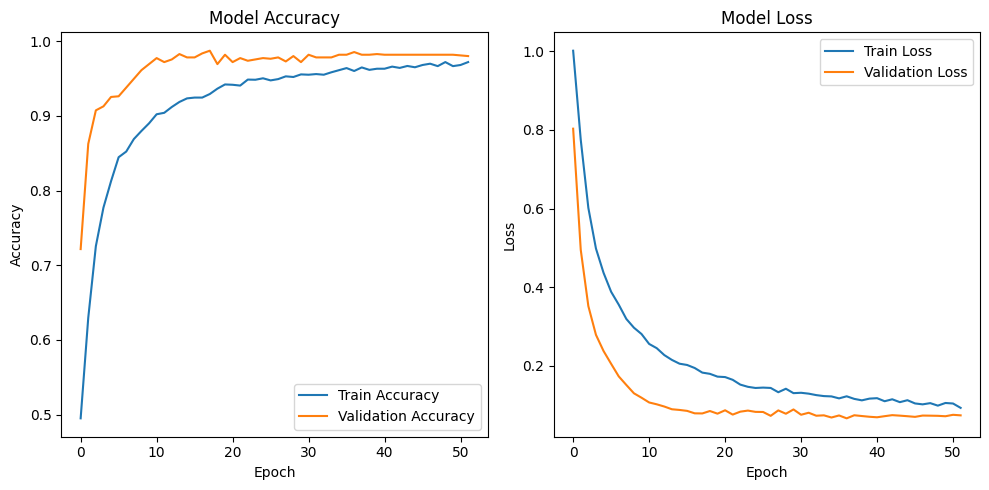

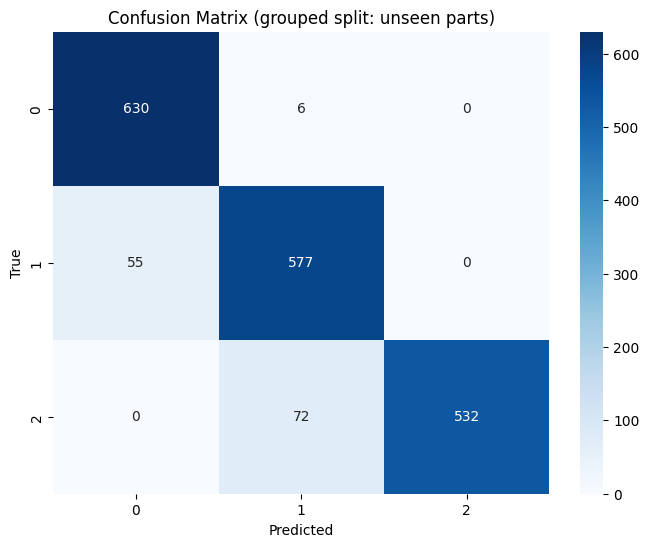


Classification Report (grouped split: unseen parts):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       636
           1       0.88      0.91      0.90       632
           2       1.00      0.88      0.94       604

    accuracy                           0.93      1872
   macro avg       0.93      0.93      0.93      1872
weighted avg       0.93      0.93      0.93      1872

Test Accuracy: 0.9290
Macro F1:      0.9290
Fold 1: Acc=94.81% | Loss=0.1592 | MacroF1=0.9510
Fold 2: Acc=98.37% | Loss=0.0646 | MacroF1=0.9818
Fold 3: Acc=99.14% | Loss=0.0395 | MacroF1=0.9916
Fold 4: Acc=98.95% | Loss=0.0727 | MacroF1=0.9891
Fold 5: Acc=99.34% | Loss=0.0572 | MacroF1=0.9930

------------------------------------------------------------------------
Grouped CV summary (unseen parts each fold):
Accuracy: mean 98.12%  (Â± 1.69)
Macro F1: mean 0.9813 (Â± 0.0156)
Loss:     mean 0.0786
---------------------------------------------------------------

In [1]:
# ===================== Imports & Reproducibility =====================
import warnings
warnings.filterwarnings('ignore')

import os
import random
import itertools
import hashlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    GroupShuffleSplit, GroupKFold
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, f1_score
)
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Seeds
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# ===================== Config =====================
# Exclude 'part' from features (still used for grouping)
DROP_PART = True

# Grid for exhaustive search
GRID = {
    'num_layers':    [1, 2, 3],
    'units':         [16, 32],
    'dropout_rate':  [0.0, 0.2],
    'l2_reg':        [0.0, 1e-4],
    'learning_rate': [1e-3, 3e-3, 1e-2]
}

# ===================== Load & clean (robust path) =====================
from pathlib import Path  # safe to keep even if already imported above

candidates = [
    Path('data') / 'demand.csv',
    Path('..') / 'data' / 'demand.csv',
    Path('/Users/yaeesh/Downloads/A Systematic AI-based Paradigm for Classifying Hybrid Electric Vehicle Spare Parts Using Their Price and Demand/Demand.csv'),
]
file_path = None
for p in candidates:
    if p.exists():
        file_path = p
        break
if file_path is None:
    raise FileNotFoundError('Could not find demand.csv in data/, ../data/, or the Downloads path.')

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
print("Initial shape:", df.shape)

# Drop exact duplicates
dup_count = df.duplicated().sum()
if dup_count:
    print(f"Dropping {dup_count} duplicate rows")
    df = df.drop_duplicates().reset_index(drop=True)

# ===================== Feature schema =====================
cat_cols = [
    'car type',
    'made in',
    'original/imitator',
    'new\\used',
    'selling location',
    'service location (repair shop/automotive company',
    'car total maintenance cost average',
    'part'  # identity-like
]

num_all = [
    'number of cars in jordan',
    'car age',
    'failure rate',
    'price of the car',
    'repair or replacement cost',
    'critically',
    'on line price'
]

missing_cols = [c for c in cat_cols + num_all + ['demand'] if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing expected columns: {missing_cols}")

cat_cols_effective = [c for c in cat_cols if not (DROP_PART and c == 'part')]
X_all = df[cat_cols_effective + num_all].copy()
groups_all = df['part'].astype(str)  # for grouped splits

# For numeric transforms
skewed_cols = [
    'on line price',
    'number of cars in jordan',
    'failure rate',
    'repair or replacement cost',
    'critically',
    'price of the car'
]
other_num_cols = [c for c in num_all if c not in skewed_cols]

# ===================== Helper functions =====================
def compute_thresholds_from_train(demand_series, q_low=0.33, q_high=0.66):
    q = demand_series.quantile([q_low, q_high])
    return float(q.loc[q_low]), float(q.loc[q_high])

def bin_with_thresholds(demand_series, low_thr, high_thr):
    return pd.cut(demand_series,
                  bins=[-np.inf, low_thr, high_thr, np.inf],
                  labels=[0, 1, 2]).astype(int)

def make_preprocessor():
    numeric_skew_pipeline = Pipeline(steps=[
        ('log1p', FunctionTransformer(np.log1p, validate=False)),
        ('scaler', StandardScaler())
    ])
    numeric_pipeline = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    # Version-compatible OneHotEncoder
    try:
        categorical_pipeline = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    except TypeError:
        categorical_pipeline = OneHotEncoder(handle_unknown='ignore', sparse=False)

    return ColumnTransformer(
        transformers=[
            ('num_skew', numeric_skew_pipeline, skewed_cols),
            ('num',     numeric_pipeline,       other_num_cols),
            ('cat',     categorical_pipeline,   cat_cols_effective)
        ],
        remainder='drop'
    )

def build_model(input_dim, num_layers, units, dropout_rate, l2_reg, learning_rate, num_classes=3):
    model = Sequential()
    reg = regularizers.l2(l2_reg) if l2_reg and l2_reg > 0 else None
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(units, activation='relu', kernel_regularizer=reg, input_shape=(input_dim,)))
        else:
            model.add(Dense(units, activation='relu', kernel_regularizer=reg))
        if dropout_rate and dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def grid_combinations(grid_dict):
    keys = list(grid_dict.keys())
    for values in itertools.product(*(grid_dict[k] for k in keys)):
        yield dict(zip(keys, values))

def hash_rows(df_like):
    """Create a stable hash per row using the actual feature columns used by the model."""
    # Convert to strings with controlled formatting
    str_df = df_like.copy()
    for c in str_df.columns:
        if pd.api.types.is_float_dtype(str_df[c]) or pd.api.types.is_integer_dtype(str_df[c]):
            str_df[c] = str_df[c].astype(float).map(lambda x: f"{x:.12g}")
        else:
            str_df[c] = str_df[c].astype(str)
    concat = str_df.apply(lambda r: '||'.join(r.values.astype(str)), axis=1)
    return concat.map(lambda s: hashlib.md5(s.encode('utf-8')).hexdigest())

# ===================== Per-part purity (leakage hint) =====================
# Using full data for a quick diagnostic (not for labeling)
tmp_low, tmp_high = compute_thresholds_from_train(df['demand'])  # approximate
tmp_y = bin_with_thresholds(df['demand'], tmp_low, tmp_high)
part_class_counts = pd.crosstab(df['part'], tmp_y)
part_purity = part_class_counts.max(axis=1) / part_class_counts.sum(axis=1)
print("\nPer-part purity, top 10:")
print(part_purity.sort_values(ascending=False).head(10))
print(f"Mean per-part purity: {part_purity.mean():.4f}")

# ===================== Outer grouped train/test split =====================
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
train_idx, test_idx = next(gss.split(X_all, None, groups=groups_all))

X_train_raw, X_test_raw = X_all.iloc[train_idx], X_all.iloc[test_idx]
groups_train, groups_test = groups_all.iloc[train_idx], groups_all.iloc[test_idx]
demand_train, demand_test = df['demand'].iloc[train_idx], df['demand'].iloc[test_idx]

# Create labels using thresholds from TRAIN ONLY
low_thr, high_thr = compute_thresholds_from_train(demand_train)
print(f"\nTrain-only thresholds: 33%={low_thr:.6f}, 66%={high_thr:.6f}")
y_train = bin_with_thresholds(demand_train, low_thr, high_thr)
y_test  = bin_with_thresholds(demand_test,  low_thr, high_thr)

# Class distribution check
print("\nClass distribution (train):")
print(y_train.value_counts().sort_index())
print("Class distribution (test):")
print(y_test.value_counts().sort_index())

# ===================== Row-hash overlap audit =====================
# Using the exact feature set the model will see
train_hash = hash_rows(X_train_raw)
test_hash  = hash_rows(X_test_raw)
overlap = set(train_hash).intersection(set(test_hash))
print(f"\nRow-hash overlap between train and test using model features: {len(overlap)} rows")
if len(overlap) > 0:
    print("WARNING: Identical feature rows detected across train and test. Investigate potential duplicates.")

# ===================== Exhaustive grid search with grouped inner validation =====================
# Use a grouped validation carve-out from training for model selection.
inner_gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
inner_tr_idx, inner_val_idx = next(inner_gss.split(X_train_raw, y_train, groups=groups_train))
X_inner_tr_raw = X_train_raw.iloc[inner_tr_idx]
X_inner_val_raw = X_train_raw.iloc[inner_val_idx]
y_inner_tr = y_train.iloc[inner_tr_idx]
y_inner_val = y_train.iloc[inner_val_idx]

# Fit a fresh preprocessor on inner-train only (no leakage)
def fit_transform_preprocessor(X_tr_raw, X_val_raw):
    pre = make_preprocessor()
    X_tr = pre.fit_transform(X_tr_raw)
    X_val = pre.transform(X_val_raw)
    return pre, X_tr, X_val

best_cfg = None
best_val_f1 = -np.inf
best_model = None
best_history = None

total_combos = int(np.prod([len(v) for v in GRID.values()]))
print(f"\nStarting exhaustive grid search over {total_combos} combinations...")
for idx, cfg in enumerate(grid_combinations(GRID), start=1):
    print(f"Config {idx}/{total_combos}: {cfg}")
    pre_gs, X_inner_tr, X_inner_val = fit_transform_preprocessor(X_inner_tr_raw, X_inner_val_raw)
    input_dim = X_inner_tr.shape[1]

    model = build_model(
        input_dim=input_dim,
        num_layers=cfg['num_layers'],
        units=cfg['units'],
        dropout_rate=cfg['dropout_rate'],
        l2_reg=cfg['l2_reg'],
        learning_rate=cfg['learning_rate'],
        num_classes=3
    )

    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)

    history = model.fit(
        X_inner_tr, y_inner_tr,
        epochs=200,
        validation_data=(X_inner_val, y_inner_val),
        callbacks=[early_stop, reduce_lr],
        verbose=0
    )

    y_val_pred = np.argmax(model.predict(X_inner_val, verbose=0), axis=1)
    f1 = f1_score(y_inner_val, y_val_pred, average='macro')
    if f1 > best_val_f1:
        best_val_f1 = f1
        best_cfg = cfg
        best_model = model
        best_history = history
        best_preprocessor = pre_gs

print("\nBest grid configuration (inner grouped val macro F1):", round(best_val_f1, 4))
print(best_cfg)

# ===================== Retrain on full training set, with grouped inner val =====================
# Fresh preprocessor fitted on the full outer training set only
preprocessor_full = make_preprocessor()
X_train_proc = preprocessor_full.fit_transform(X_train_raw)
X_test_proc  = preprocessor_full.transform(X_test_raw)
input_dim = X_train_proc.shape[1]

# Build best model and carve a grouped validation from training for early stopping
inner_tr_idx2, inner_val_idx2 = next(inner_gss.split(X_train_raw, y_train, groups=groups_train))
X_tr2_raw, X_val2_raw = X_train_raw.iloc[inner_tr_idx2], X_train_raw.iloc[inner_val_idx2]
y_tr2, y_val2 = y_train.iloc[inner_tr_idx2], y_train.iloc[inner_val_idx2]
pre_ep = make_preprocessor()
X_tr2 = pre_ep.fit_transform(X_tr2_raw)
X_val2 = pre_ep.transform(X_val2_raw)

model = build_model(
    input_dim=input_dim,
    num_layers=best_cfg['num_layers'],
    units=best_cfg['units'],
    dropout_rate=best_cfg['dropout_rate'],
    l2_reg=best_cfg['l2_reg'],
    learning_rate=best_cfg['learning_rate'],
    num_classes=3
)

early_stop_final = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr_final  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)

history = model.fit(
    X_tr2, y_tr2,
    epochs=200,
    validation_data=(X_val2, y_val2),
    callbacks=[early_stop_final, reduce_lr_final],
    verbose=0
)

# ===================== Plots =====================
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

plt.tight_layout()
plt.savefig('training_validation_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ===================== Test evaluation (unseen parts) =====================
y_pred_proba = model.predict(X_test_proc, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = y_test.to_numpy()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix (grouped split: unseen parts)')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nClassification Report (grouped split: unseen parts):")
print(classification_report(y_true, y_pred))
print(f"Test Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Macro F1:      {f1_score(y_true, y_pred, average='macro'):.4f}")

# ===================== Grouped CV with per-fold thresholds & preprocessing =====================
num_folds = 5
gkf = GroupKFold(n_splits=num_folds)

acc_per_fold, f1_per_fold, loss_per_fold = [], [], []
fold_no = 1
for tr_idx, val_idx in gkf.split(X_all, None, groups=groups_all):
    X_tr_raw, X_val_raw = X_all.iloc[tr_idx], X_all.iloc[val_idx]
    demand_tr, demand_val = df['demand'].iloc[tr_idx], df['demand'].iloc[val_idx]

    # Fold-specific thresholds from training portion
    low_f, high_f = compute_thresholds_from_train(demand_tr)
    y_tr_f = bin_with_thresholds(demand_tr, low_f, high_f)
    y_val_f = bin_with_thresholds(demand_val, low_f, high_f)

    pre_fold = make_preprocessor()
    X_tr = pre_fold.fit_transform(X_tr_raw)
    X_val = pre_fold.transform(X_val_raw)

    model_fold = build_model(
        input_dim=X_tr.shape[1],
        num_layers=best_cfg['num_layers'],
        units=best_cfg['units'],
        dropout_rate=best_cfg['dropout_rate'],
        l2_reg=best_cfg['l2_reg'],
        learning_rate=best_cfg['learning_rate'],
        num_classes=3
    )

    hist_f = model_fold.fit(
        X_tr, y_tr_f,
        epochs=200,
        validation_data=(X_val, y_val_f),
        callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
                   ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)],
        verbose=0
    )

    loss, acc = model_fold.evaluate(X_val, y_val_f, verbose=0)
    y_val_pred = np.argmax(model_fold.predict(X_val, verbose=0), axis=1)
    f1 = f1_score(y_val_f, y_val_pred, average='macro')

    print(f"Fold {fold_no}: Acc={acc*100:.2f}% | Loss={loss:.4f} | MacroF1={f1:.4f}")
    acc_per_fold.append(acc * 100); f1_per_fold.append(f1); loss_per_fold.append(loss)
    fold_no += 1

print('\n' + '-'*72)
print('Grouped CV summary (unseen parts each fold):')
print(f"Accuracy: mean {np.mean(acc_per_fold):.2f}%  (Â± {np.std(acc_per_fold):.2f})")
print(f"Macro F1: mean {np.mean(f1_per_fold):.4f} (Â± {np.std(f1_per_fold):.4f})")
print(f"Loss:     mean {np.mean(loss_per_fold):.4f}")
print('-'*72)

# ===================== Single-feature leakage audit (grouped CV) =====================
def single_feature_cv_score(feature_name):
    # Build a tiny pipeline: transform only this feature, then multinomial logistic regression
    if feature_name in cat_cols_effective:
        try:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        except TypeError:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
        pipe = Pipeline([('ohe', ohe),
                         ('clf', LogisticRegression(max_iter=2000, multi_class='multinomial'))])
        X_feat = df[[feature_name]].astype(str)
    else:
        # numeric
        steps = []
        if feature_name in skewed_cols:
            steps.append(('log1p', FunctionTransformer(np.log1p, validate=False)))
        steps.append(('scaler', StandardScaler()))
        steps.append(('clf', LogisticRegression(max_iter=2000, multi_class='multinomial')))
        pipe = Pipeline(steps)
        X_feat = df[[feature_name]].copy()

    # grouped CV with per-fold thresholds
    f1_scores = []
    for tr_idx, val_idx in gkf.split(X_all, None, groups=groups_all):
        d_tr = df['demand'].iloc[tr_idx]; d_val = df['demand'].iloc[val_idx]
        low_f, high_f = compute_thresholds_from_train(d_tr)
        y_tr_f = bin_with_thresholds(d_tr, low_f, high_f)
        y_val_f = bin_with_thresholds(d_val, low_f, high_f)

        X_tr_f = X_feat.iloc[tr_idx]; X_val_f = X_feat.iloc[val_idx]
        pipe.fit(X_tr_f, y_tr_f)
        y_val_pred = pipe.predict(X_val_f)
        f1_scores.append(f1_score(y_val_f, y_val_pred, average='macro'))

    return np.mean(f1_scores)

features_to_audit = cat_cols_effective + num_all
audit_results = []
print("\nRunning single-feature leakage audit (grouped CV, macro F1 per feature)...")
for feat in features_to_audit:
    score = single_feature_cv_score(feat)
    audit_results.append((feat, score))
audit_results.sort(key=lambda x: x[1], reverse=True)
print("Top 10 features by single-feature macro F1:")
for name, sc in audit_results[:10]:
    print(f"{name:45s} {sc:.4f}")

# Flag suspicious features
suspicious = [(n, s) for n, s in audit_results if s >= 0.99]
if suspicious:
    print("\nWARNING: These features alone achieve near-perfect classification under grouped CV:")
    for n, s in suspicious:
        print(f"  - {n}: macro F1 {s:.4f}")
    print("Review whether they encode target information directly or leak future knowledge.")

# ===================== Save tuned model & thresholds =====================
model.save("demand_clf.keras")
# Save the outer train thresholds so you can reuse them in deployment
with open("label_thresholds.txt", "w") as f:
    f.write(f"{low_thr},{high_thr}\n")
print("\nSaved tuned model to demand_clf.keras")
print("Saved train-only label thresholds to label_thresholds.txt")
print("Best configuration:", GRID if best_cfg is None else best_cfg)


# Trying the other MLs

In [4]:
# ===================== Imports & Reproducibility =====================

import warnings
warnings.filterwarnings("ignore")

import itertools
import numpy as np
import pandas as pd

from pathlib import Path

from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Repro
SEED = 42
rng = np.random.RandomState(SEED)

# ===================== Config =====================

DROP_PART = True  # exclude 'part' from features while still using it for grouping

# Small grids for the five selected models
GRIDS = {
    "svc_rbf": {"C": [1.0, 3.0], "gamma": ["scale", "auto"]},
    "logreg": {"C": [0.3, 1.0, 3.0], "solver": ["lbfgs"], "max_iter": [2000]},
    "et": {"n_estimators": [200, 400], "max_depth": [None, 20]},
    "sgd": {"loss": ["log_loss"], "alpha": [1e-4, 1e-3], "max_iter": [2000]},
    "lda": {"solver": ["svd"]},
}

# Map each model key to an estimator factory and preprocessing style
# style "scale" -> log1p for skewed numerics + StandardScaler; OHE for categoricals
# style "tree"  -> log1p for skewed numerics (no scaler), passthrough others; OHE for categoricals
MODEL_ZOO = {
    "svc_rbf": {
        "label": "SVC (RBF)",
        "factory": lambda p: SVC(**p),
        "style": "scale",
    },
    "logreg": {
        "label": "LogisticRegression",
        "factory": lambda p: LogisticRegression(multi_class="multinomial", **p),
        "style": "scale",
    },
    "et": {
        "label": "ExtraTrees",
        "factory": lambda p: ExtraTreesClassifier(random_state=SEED, n_jobs=-1, **p),
        "style": "tree",
    },
    "sgd": {
        "label": "SGDClassifier (log_loss)",
        "factory": lambda p: SGDClassifier(random_state=SEED, **p),
        "style": "scale",
    },
    "lda": {
        "label": "LinearDiscriminantAnalysis",
        "factory": lambda p: LDA(**p),
        "style": "scale",
    },
}

# Control evaluation order (matches your narrative)
MODEL_KEYS = ["svc_rbf", "logreg", "et", "sgd", "lda"]

# ===================== Load & clean (robust path) =====================

candidates = [
    Path("data") / "demand.csv",
    Path("..") / "data" / "demand.csv",
    Path("/Users/yaeesh/Downloads/A Systematic AI-based Paradigm for Classifying Hybrid Electric Vehicle Spare Parts Using Their Price and Demand/Demand.csv"),
]
file_path = None
for p in candidates:
    if p.exists():
        file_path = p
        break
if file_path is None:
    raise FileNotFoundError("Could not find demand.csv in data/, ../data/, or the Downloads path.")

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
print("Using file:", file_path.resolve())
print("Initial shape:", df.shape)

# Drop exact duplicates (optional but mirrors your baseline)
dup_count = df.duplicated().sum()
if dup_count:
    print(f"Dropping {dup_count} duplicate rows")
    df = df.drop_duplicates().reset_index(drop=True)

# ===================== Feature schema =====================

cat_cols = [
    "car type",
    "made in",
    "original/imitator",
    "new\\used",
    "selling location",
    "service location (repair shop/automotive company",
    "car total maintenance cost average",
    "part",  # identity-like, excluded from X if DROP_PART=True
]
num_all = [
    "number of cars in jordan",
    "car age",
    "failure rate",
    "price of the car",
    "repair or replacement cost",
    "critically",
    "on line price",
]

required = cat_cols + num_all + ["demand"]
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"Missing expected columns: {missing}")

cat_cols_eff = [c for c in cat_cols if not (DROP_PART and c == "part")]
X_all = df[cat_cols_eff + num_all].copy()
groups_all = df["part"].astype(str)

# Skewed numeric columns that benefit from log1p
skewed_cols = [
    "on line price",
    "number of cars in jordan",
    "failure rate",
    "repair or replacement cost",
    "critically",
    "price of the car",
]
other_num_cols = [c for c in num_all if c not in skewed_cols]

# ===================== Labeling (train-only thresholds) =====================

def compute_thresholds_from_train(demand_series, q_low=0.33, q_high=0.66):
    q = demand_series.quantile([q_low, q_high])
    return float(q.loc[q_low]), float(q.loc[q_high])

def bin_with_thresholds(demand_series, low_thr, high_thr):
    return pd.cut(
        demand_series, bins=[-np.inf, low_thr, high_thr, np.inf], labels=[0, 1, 2]
    ).astype(int)

gss_outer = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
train_idx, test_idx = next(gss_outer.split(X_all, None, groups=groups_all))

X_train_raw, X_test_raw = X_all.iloc[train_idx], X_all.iloc[test_idx]
groups_train, groups_test = groups_all.iloc[train_idx], groups_all.iloc[test_idx]
demand_train, demand_test = df["demand"].iloc[train_idx], df["demand"].iloc[test_idx]

low_thr, high_thr = compute_thresholds_from_train(demand_train)
y_train = bin_with_thresholds(demand_train, low_thr, high_thr)
y_test = bin_with_thresholds(demand_test, low_thr, high_thr)

print(f"Train-only thresholds: 33%={low_thr:.6f}, 66%={high_thr:.6f}")
print("Class distribution (train):")
print(y_train.value_counts().sort_index())
print("Class distribution (test):")
print(y_test.value_counts().sort_index())

# ===================== Preprocessors =====================

def make_preprocessor(style: str) -> ColumnTransformer:
    """Return a ColumnTransformer adapted to the model style."""
    if style == "scale":
        num_skew = Pipeline([
            ("log1p", FunctionTransformer(np.log1p, validate=False)),
            ("scaler", StandardScaler())
        ])
        num_plain = Pipeline([("scaler", StandardScaler())])
    elif style == "tree":
        num_skew = Pipeline([("log1p", FunctionTransformer(np.log1p, validate=False))])  # no scaler
        num_plain = "passthrough"
    else:
        raise ValueError(f"Unknown style {style}")

    # OHE dense for universal compatibility
    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

    return ColumnTransformer(
        transformers=[
            ("num_skew", num_skew, skewed_cols),
            ("num_plain", num_plain, other_num_cols),
            ("cat", ohe, cat_cols_eff),
        ],
        remainder="drop",
    )

# ===================== Helper: small grouped inner validation =====================

def grid_dict_product(grid):
    keys = list(grid.keys())
    for values in itertools.product(*(grid[k] for k in keys)):
        yield dict(zip(keys, values))

def fit_select_on_inner(model_key, X_tr_raw, y_tr, groups_tr):
    """Carve an inner grouped validation split from outer-train to select hyperparams."""
    inner = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
    inner_tr_idx, inner_val_idx = next(inner.split(X_tr_raw, y_tr, groups=groups_tr))

    X_inner_tr_raw = X_tr_raw.iloc[inner_tr_idx]
    X_inner_val_raw = X_tr_raw.iloc[inner_val_idx]
    y_inner_tr = y_tr.iloc[inner_tr_idx]
    y_inner_val = y_tr.iloc[inner_val_idx]

    spec = MODEL_ZOO[model_key]
    grid = GRIDS[model_key]
    style = spec["style"]

    best_f1 = -np.inf
    best_params = None

    for params in grid_dict_product(grid):
        pre = make_preprocessor(style)
        X_inner_tr = pre.fit_transform(X_inner_tr_raw)
        X_inner_val = pre.transform(X_inner_val_raw)

        est = spec["factory"](params)
        est.fit(X_inner_tr, y_inner_tr)

        y_val_pred = est.predict(X_inner_val)
        f1 = f1_score(y_inner_val, y_val_pred, average="macro")

        if f1 > best_f1:
            best_f1 = f1
            best_params = params

    return best_params, best_f1

# ===================== Evaluation loop over 5 models =====================

records = []

for key in MODEL_KEYS:
    label = MODEL_ZOO[key]["label"]
    print(f"\n=== {label} ({key}) ===")

    # Select hyperparameters on a grouped inner split
    best_params, inner_f1 = fit_select_on_inner(
        key, X_train_raw, y_train, groups_train
    )
    print(f"Selected params: {best_params} | Inner macro F1={inner_f1:.4f}")

    # Refit preprocessor on full outer-train
    pre = make_preprocessor(MODEL_ZOO[key]["style"])
    X_train = pre.fit_transform(X_train_raw)
    X_test = pre.transform(X_test_raw)

    # Train final model with chosen params on full outer-train
    est = MODEL_ZOO[key]["factory"](best_params)
    est.fit(X_train, y_train)

    # Evaluate on outer test (unseen parts)
    y_pred = est.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")

    print(f"Test Accuracy={acc:.4f} | Test Macro F1={f1m:.4f}")
    print(classification_report(y_test, y_pred))

    records.append(
        {
            "key": key,
            "model": label,
            "best_params": best_params,
            "inner_macro_f1": round(inner_f1, 4),
            "test_accuracy": round(acc, 4),
            "test_macro_f1": round(f1m, 4),
        }
    )

# ===================== Summary =====================

results = pd.DataFrame.from_records(records)
results_sorted = results.sort_values(
    ["test_macro_f1", "test_accuracy"], ascending=False
).reset_index(drop=True)

print("\n=== Ranked results (outer test) ===")
print(results_sorted[["model", "test_macro_f1", "test_accuracy", "inner_macro_f1", "best_params"]])

# Save to CSV for later reference (separate filename for the top-5 run)
results_sorted.to_csv("model_benchmark_results_top5.csv", index=False)
print("\nSaved benchmark table to model_benchmark_results_top5.csv")


Using file: \\oochcfs10\users\oaliyaeesh\DOWNLOADS\hev-spareparts-ml\data\demand.csv
Initial shape: (7652, 16)
Dropping 60 duplicate rows
Train-only thresholds: 33%=1.800064, 66%=5.589000
Class distribution (train):
demand
0    1917
1    1861
2    1942
Name: count, dtype: int64
Class distribution (test):
demand
0    636
1    632
2    604
Name: count, dtype: int64

=== SVC (RBF) (svc_rbf) ===
Selected params: {'C': 3.0, 'gamma': 'auto'} | Inner macro F1=0.9654
Test Accuracy=0.9626 | Test Macro F1=0.9631
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       636
           1       0.91      0.99      0.95       632
           2       1.00      0.95      0.97       604

    accuracy                           0.96      1872
   macro avg       0.97      0.96      0.96      1872
weighted avg       0.97      0.96      0.96      1872


=== LogisticRegression (logreg) ===
Selected params: {'C': 1.0, 'solver': 'lbfgs', 'max_iter': 2000} | Inner m

# Final edits

# Hybrid EV Spare Parts Demand Classification
_Final consolidated script (ANN + benchmarks) with all edits applied_


# Imports & Reproducibility


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import sys
import subprocess
import platform

def _ensure_import(module_name, pip_name=None):
    try:
        return __import__(module_name)
    except ModuleNotFoundError:
        pkg = pip_name or module_name
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        return __import__(module_name)

_ensure_import('seaborn', 'seaborn')
_ensure_import('sklearn', 'scikit-learn')
_ensure_import('joblib', 'joblib')
_ensure_import('numpy', 'numpy')
_ensure_import('pandas', 'pandas')
_ensure_import('matplotlib', 'matplotlib')
system = platform.system()
machine = platform.machine().lower()
tf_pkg = 'tensorflow'
if system == 'Windows':
    tf_pkg = 'tensorflow-cpu'
elif system == 'Darwin' and 'arm' in machine:
    tf_pkg = 'tensorflow-macos'
_ensure_import('tensorflow', tf_pkg)



import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"

import json
import itertools
import hashlib
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GroupShuffleSplit, GroupKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, f1_score
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.utils.class_weight import compute_class_weight

import joblib

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Seeds
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)



# Config


In [ ]:
# Exclude 'part' from features (still used for grouping)
DROP_PART = True

# ANN hyperparameter grid (exhaustive but small)
GRID = {
    'num_layers':    [1, 2, 3],
    'units':         [16, 32],
    'dropout_rate':  [0.0, 0.2],
    'l2_reg':        [0.0, 1e-4],
    'learning_rate': [1e-3, 3e-3, 1e-2]
}

# Small grids for the classical models
GRIDS_CLASSIC = {
    "svc_rbf": {"C": [1.0, 3.0], "gamma": ["scale", "auto"]},
    "logreg":  {"C": [0.3, 1.0, 3.0], "solver": ["lbfgs"], "max_iter": [2000]},
    "et":      {"n_estimators": [200, 400], "max_depth": [None, 20]},
    "sgd":     {"loss": ["log_loss"], "alpha": [1e-4, 1e-3], "max_iter": [2000], "random_state": [SEED]},
    "lda":     {"solver": ["svd"]},
}

MODEL_ZOO = {
    "svc_rbf": {
        "label": "SVC (RBF)",
        "factory": lambda p: SVC(**p),
        "style": "scale",
    },
    "logreg": {
        "label": "LogisticRegression",
        "factory": lambda p: LogisticRegression(multi_class="multinomial", **p),
        "style": "scale",
    },
    "et": {
        "label": "ExtraTrees",
        "factory": lambda p: ExtraTreesClassifier(random_state=SEED, n_jobs=-1, **p),
        "style": "tree",
    },
    "sgd": {
        "label": "SGDClassifier (log_loss)",
        "factory": lambda p: SGDClassifier(**p),
        "style": "scale",
    },
    "lda": {
        "label": "LinearDiscriminantAnalysis",
        "factory": lambda p: LDA(**p),
        "style": "scale",
    },
}
MODEL_KEYS = ["svc_rbf", "logreg", "et", "sgd", "lda"]



# Load & clean


In [ ]:
# Support environment override, then common relative paths
data_env = os.environ.get("DEMAND_DATA_PATH", "").strip()
candidates = [Path(p) for p in [data_env] if p] + [
    Path("data") / "demand.csv",
    Path("..") / "data" / "demand.csv",
]
file_path = None
for p in candidates:
    if p.exists():
        file_path = p
        break
if file_path is None:
    raise FileNotFoundError("Could not find demand.csv. Set DEMAND_DATA_PATH or place the file in data/ or ../data/.")

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
print("Using file:", file_path.resolve())
print("Initial shape:", df.shape)

# Drop exact duplicates
dup_count = df.duplicated().sum()
if dup_count:
    print(f"Dropping {dup_count} duplicate rows")
    df = df.drop_duplicates().reset_index(drop=True)



# Feature schema


In [ ]:
# Keep the exact strings as present in your CSV.
cat_cols = [
    'car type',
    'made in',
    'original/imitator',
    'new\\used',
    'selling location',
    'service location (repair shop/automotive company',
    'part'  # identity-like
]
num_all = [
    'number of cars in jordan',
    'car age',
    'failure rate',
    'price of the car',
    'repair or replacement cost',
    'critically',                         # ensure this matches the CSV header
    'on line price',
    'car total maintenance cost average'  # numeric
]

required_cols = cat_cols + num_all + ['demand']
missing_cols = [c for c in required_cols if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing expected columns: {missing_cols}")

cat_cols_effective = [c for c in cat_cols if not (DROP_PART and c == 'part')]
X_all = df[cat_cols_effective + num_all].copy()
groups_all = df['part'].astype(str)  # for grouped splits

# Numeric columns that benefit from log1p
skewed_cols = [
    'on line price',
    'number of cars in jordan',
    'failure rate',
    'repair or replacement cost',
    'critically',
    'price of the car'
]
other_num_cols = [c for c in num_all if c not in skewed_cols]



# Helper functions


In [ ]:
def compute_thresholds_from_train(demand_series, q_low=0.33, q_high=0.66):
    q = demand_series.quantile([q_low, q_high])
    return float(q.loc[q_low]), float(q.loc[q_high])

def bin_with_thresholds(demand_series, low_thr, high_thr):
    # Note: pd.cut ties at exact quantiles fall into the higher bin by default
    return pd.cut(
        demand_series,
        bins=[-np.inf, low_thr, high_thr, np.inf],
        labels=[0, 1, 2]
    ).astype(int)

def make_preprocessor(style: str) -> ColumnTransformer:
    """Return a ColumnTransformer adapted to the model style."""
    if style == "scale":
        num_skew = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('log1p', FunctionTransformer(np.log1p, validate=False)),
            ('scaler', StandardScaler())
        ])
        num_plain = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
    elif style == "tree":
        num_skew = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('log1p', FunctionTransformer(np.log1p, validate=False))
        ])  # no scaler
        num_plain = Pipeline([
            ('imputer', SimpleImputer(strategy='median'))
        ])
    else:
        raise ValueError(f"Unknown preprocessor style: {style}")

    # OHE dense for compatibility across versions
    try:
        cat = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])
    except TypeError:
        cat = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ])

    return ColumnTransformer(
        transformers=[
            ('num_skew', num_skew,   skewed_cols),
            ('num',      num_plain,  other_num_cols),
            ('cat',      cat,        cat_cols_effective)
        ],
        remainder='drop'
    )

def build_ann(input_dim, num_layers, units, dropout_rate, l2_reg, learning_rate, num_classes=3):
    tf.keras.backend.clear_session()
    model = Sequential()
    reg = regularizers.l2(l2_reg) if l2_reg and l2_reg > 0 else None
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(units, activation='relu', kernel_regularizer=reg, input_shape=(input_dim,)))
        else:
            model.add(Dense(units, activation='relu', kernel_regularizer=reg))
        if dropout_rate and dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def grid_dict_product(grid):
    keys = list(grid.keys())
    for values in itertools.product(*(grid[k] for k in keys)):
        yield dict(zip(keys, values))

def hash_rows(df_like):
    """Create a stable hash per row using the actual feature columns used by the model."""
    str_df = df_like.copy()
    for c in str_df.columns:
        if pd.api.types.is_float_dtype(str_df[c]) or pd.api.types.is_integer_dtype(str_df[c]):
            str_df[c] = str_df[c].astype(float).map(lambda x: f"{x:.12g}")
        else:
            str_df[c] = str_df[c].astype(str)
    concat = str_df.apply(lambda r: '||'.join(r.values.astype(str)), axis=1)
    return concat.map(lambda s: hashlib.md5(s.encode('utf-8')).hexdigest())



# Basic dataset profile


In [ ]:
print("n_rows:", len(df), "n_unique_parts:", df['part'].nunique())
print("Rows per part (describe):")
print(df['part'].value_counts().describe())



# Per-part purity (leakage hint)


In [ ]:
tmp_low, tmp_high = compute_thresholds_from_train(df['demand'])  # approximate
tmp_y = bin_with_thresholds(df['demand'], tmp_low, tmp_high)
part_class_counts = pd.crosstab(df['part'], tmp_y)
part_purity = part_class_counts.max(axis=1) / part_class_counts.sum(axis=1)
print("\nPer-part purity, top 10:")
print(part_purity.sort_values(ascending=False).head(10))
print(f"Mean per-part purity: {part_purity.mean():.4f}")



# Outer grouped train/test split


In [ ]:
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
train_idx, test_idx = next(gss.split(X_all, None, groups=groups_all))

X_train_raw, X_test_raw = X_all.iloc[train_idx], X_all.iloc[test_idx]
groups_train, groups_test = groups_all.iloc[train_idx], groups_all.iloc[test_idx]
demand_train, demand_test = df['demand'].iloc[train_idx], df['demand'].iloc[test_idx]

# Create labels using thresholds from TRAIN ONLY
low_thr, high_thr = compute_thresholds_from_train(demand_train)
print(f"\nTrain-only thresholds: 33%={low_thr:.6f}, 66%={high_thr:.6f}")
y_train = bin_with_thresholds(demand_train, low_thr, high_thr)
y_test  = bin_with_thresholds(demand_test,  low_thr, high_thr)

# Class distribution check
print("\nClass distribution (train):")
print(y_train.value_counts().sort_index())
print("Class distribution (test):")
print(y_test.value_counts().sort_index())



# Row-hash overlap audit


In [ ]:
train_hash = hash_rows(X_train_raw)
test_hash  = hash_rows(X_test_raw)
overlap = set(train_hash).intersection(set(test_hash))
print(f"\nRow-hash overlap between train and test using model features: {len(overlap)} rows")
if len(overlap) > 0:
    print("WARNING: Identical feature rows detected across train and test. Investigate potential duplicates.")



# ANN grid search on grouped inner split


In [ ]:
# Carve inner validation from outer training (grouped)
inner_gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
inner_tr_idx, inner_val_idx = next(inner_gss.split(X_train_raw, y_train, groups=groups_train))
X_inner_tr_raw = X_train_raw.iloc[inner_tr_idx]
X_inner_val_raw = X_train_raw.iloc[inner_val_idx]
y_inner_tr = y_train.iloc[inner_tr_idx]
y_inner_val = y_train.iloc[inner_val_idx]

# Fit ONE preprocessor for the inner split and reuse its matrices across grid combos
pre_gs = make_preprocessor(style="scale")
X_inner_tr = pre_gs.fit_transform(X_inner_tr_raw)
X_inner_val = pre_gs.transform(X_inner_val_raw)
input_dim_inner = X_inner_tr.shape[1]

best_cfg = None
best_val_f1 = -np.inf
best_history = None

total_combos = int(np.prod([len(v) for v in GRID.values()]))
print(f"\nStarting ANN exhaustive grid search over {total_combos} combinations...")
for idx, cfg in enumerate(grid_dict_product(GRID), start=1):
    print(f"Config {idx}/{total_combos}: {cfg}")
    model = build_ann(
        input_dim=input_dim_inner,
        num_layers=cfg['num_layers'],
        units=cfg['units'],
        dropout_rate=cfg['dropout_rate'],
        l2_reg=cfg['l2_reg'],
        learning_rate=cfg['learning_rate'],
        num_classes=3
    )
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)

    history = model.fit(
        X_inner_tr, y_inner_tr,
        epochs=200,
        validation_data=(X_inner_val, y_inner_val),
        callbacks=[early_stop, reduce_lr],
        verbose=0
    )

    y_val_pred = np.argmax(model.predict(X_inner_val, verbose=0), axis=1)
    f1 = f1_score(y_inner_val, y_val_pred, average='macro')
    if f1 > best_val_f1:
        best_val_f1 = f1
        best_cfg = cfg
        best_history = history

print("\nBest ANN grid configuration (inner grouped val macro F1):", round(best_val_f1, 4))
print(best_cfg)



# Retrain ANN on full training set with grouped early stopping


In [ ]:
# Fit ONE preprocessor on the full outer training set
preprocessor = make_preprocessor(style="scale")
X_train_proc = preprocessor.fit_transform(X_train_raw)
X_test_proc  = preprocessor.transform(X_test_raw)
input_dim = X_train_proc.shape[1]

# Early-stopping split by indexing the already-transformed matrix
inner_tr_idx2, inner_val_idx2 = next(inner_gss.split(X_train_raw, y_train, groups=groups_train))
X_tr2 = X_train_proc[inner_tr_idx2]
X_val2 = X_train_proc[inner_val_idx2]
y_tr2, y_val2 = y_train.iloc[inner_tr_idx2], y_train.iloc[inner_val_idx2]

model = build_ann(
    input_dim=input_dim,
    num_layers=best_cfg['num_layers'],
    units=best_cfg['units'],
    dropout_rate=best_cfg['dropout_rate'],
    l2_reg=best_cfg['l2_reg'],
    learning_rate=best_cfg['learning_rate'],
    num_classes=3
)

# Optional class weights if imbalance exists
class_weight = None
train_counts = y_tr2.value_counts().sort_index()
if train_counts.min() / train_counts.max() < 0.6:
    cw = compute_class_weight(class_weight='balanced', classes=np.array([0,1,2]), y=y_tr2)
    class_weight = {i: w for i, w in enumerate(cw)}
    print("Using class weights:", class_weight)

early_stop_final = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr_final  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)

history = model.fit(
    X_tr2, y_tr2,
    epochs=200,
    validation_data=(X_val2, y_val2),
    callbacks=[early_stop_final, reduce_lr_final],
    verbose=0,
    class_weight=class_weight
)



# Plots


In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylim(0, 1)
plt.title('Model Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

plt.tight_layout()
plt.savefig('training_validation_curves.png', dpi=300, bbox_inches='tight')
plt.show()



# Test evaluation (unseen parts)


In [ ]:
y_pred_proba = model.predict(X_test_proc, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = y_test.to_numpy()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix (counts) - grouped split (unseen parts)')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nClassification Report (grouped split: unseen parts):")
print(classification_report(y_true, y_pred, zero_division=0))
print(f"Test Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Macro F1:      {f1_score(y_true, y_pred, average='macro'):.4f}")



# Grouped CV with per-fold thresholds & preprocessing


In [ ]:
num_folds = 5
gkf = GroupKFold(n_splits=num_folds)

acc_per_fold, f1_per_fold, loss_per_fold = [], [], []
fold_no = 1
for tr_idx, val_idx in gkf.split(X_all, None, groups=groups_all):
    X_tr_raw, X_val_raw = X_all.iloc[tr_idx], X_all.iloc[val_idx]
    demand_tr, demand_val = df['demand'].iloc[tr_idx], df['demand'].iloc[val_idx]

    # Fold-specific thresholds from training portion
    low_f, high_f = compute_thresholds_from_train(demand_tr)
    y_tr_f = bin_with_thresholds(demand_tr, low_f, high_f)
    y_val_f = bin_with_thresholds(demand_val, low_f, high_f)

    pre_fold = make_preprocessor(style="scale")
    X_tr = pre_fold.fit_transform(X_tr_raw)
    X_val = pre_fold.transform(X_val_raw)

    model_fold = build_ann(
        input_dim=X_tr.shape[1],
        num_layers=best_cfg['num_layers'],
        units=best_cfg['units'],
        dropout_rate=best_cfg['dropout_rate'],
        l2_reg=best_cfg['l2_reg'],
        learning_rate=best_cfg['learning_rate'],
        num_classes=3
    )

    hist_f = model_fold.fit(
        X_tr, y_tr_f,
        epochs=200,
        validation_data=(X_val, y_val_f),
        callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
                   ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)],
        verbose=0
    )

    loss, acc = model_fold.evaluate(X_val, y_val_f, verbose=0)
    y_val_pred = np.argmax(model_fold.predict(X_val, verbose=0), axis=1)
    f1 = f1_score(y_val_f, y_val_pred, average='macro')

    print(f"Fold {fold_no}: Acc={acc*100:.2f}% | Loss={loss:.4f} | MacroF1={f1:.4f}")
    acc_per_fold.append(acc * 100); f1_per_fold.append(f1); loss_per_fold.append(loss)
    fold_no += 1

print('\n' + '-'*72)
print('Grouped CV summary (unseen parts each fold):')
print(f"Accuracy: mean {np.mean(acc_per_fold):.2f}%  (Â± {np.std(acc_per_fold):.2f})")
print(f"Macro F1: mean {np.mean(f1_per_fold):.4f} (Â± {np.std(f1_per_fold):.4f})")
print(f"Loss:     mean {np.mean(loss_per_fold):.4f}")
print('-'*72)



# Single-feature leakage audit (grouped CV)


In [ ]:
def single_feature_cv_score(feature_name):
    # Build a tiny pipeline: transform only this feature, then multinomial logistic regression
    if feature_name in cat_cols_effective:
        try:
            ohe = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
            ])
        except TypeError:
            ohe = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
            ])
        pipe = Pipeline([('ohe', ohe),
                         ('clf', LogisticRegression(max_iter=2000, multi_class='multinomial'))])
        X_feat = df[[feature_name]].astype(str)
    else:
        steps = []
        steps.append(('imputer', SimpleImputer(strategy='median')))
        if feature_name in skewed_cols:
            steps.append(('log1p', FunctionTransformer(np.log1p, validate=False)))
        steps.append(('scaler', StandardScaler()))
        steps.append(('clf', LogisticRegression(max_iter=2000, multi_class='multinomial')))
        pipe = Pipeline(steps)
        X_feat = df[[feature_name]].copy()

    f1_scores = []
    for tr_idx, val_idx in gkf.split(X_all, None, groups=groups_all):
        d_tr = df['demand'].iloc[tr_idx]; d_val = df['demand'].iloc[val_idx]
        low_f, high_f = compute_thresholds_from_train(d_tr)
        y_tr_f = bin_with_thresholds(d_tr, low_f, high_f)
        y_val_f = bin_with_thresholds(d_val, low_f, high_f)

        X_tr_f = X_feat.iloc[tr_idx]; X_val_f = X_feat.iloc[val_idx]
        pipe.fit(X_tr_f, y_tr_f)
        y_val_pred = pipe.predict(X_val_f)
        f1_scores.append(f1_score(y_val_f, y_val_pred, average='macro'))

    return np.mean(f1_scores)

features_to_audit = cat_cols_effective + num_all
audit_results = []
print("\nRunning single-feature leakage audit (grouped CV, macro F1 per feature)...")
for feat in features_to_audit:
    score = single_feature_cv_score(feat)
    audit_results.append((feat, score))
audit_results.sort(key=lambda x: x[1], reverse=True)
print("Top 10 features by single-feature macro F1:")
for name, sc in audit_results[:10]:
    print(f"{name:45s} {sc:.4f}")

suspicious = [(n, s) for n, s in audit_results if s >= 0.99]
if suspicious:
    print("\nWARNING: These features alone achieve near-perfect classification under grouped CV:")
    for n, s in suspicious:
        print(f"  - {n}: macro F1 {s:.4f}")
    print("Review whether they encode target information directly or leak future knowledge.")



# Save tuned ANN model, preprocessor, and thresholds


In [ ]:
model.save("demand_clf.keras")
with open("label_thresholds.txt", "w") as f:
    f.write(f"{low_thr},{high_thr}\n")

joblib.dump(preprocessor, "preprocessor.joblib")
with open("label_metadata.json", "w") as f:
    json.dump({
        "low_thr": low_thr,
        "high_thr": high_thr,
        "class_order": [0, 1, 2],
        "seed": int(SEED),
        "cat_cols_effective": cat_cols_effective,
        "num_all": num_all,
        "skewed_cols": skewed_cols,
        "other_num_cols": other_num_cols
    }, f, indent=2)

print("\nSaved tuned ANN model to demand_clf.keras")
print("Saved train-only label thresholds to label_thresholds.txt")
print("Saved preprocessor to preprocessor.joblib and label metadata to label_metadata.json")
print("Best ANN configuration:", GRID if best_cfg is None else best_cfg)



# Classical models benchmark (top 5)


In [ ]:
def fit_select_on_inner_classic(model_key, X_tr_raw, y_tr, groups_tr):
    """Carve an inner grouped validation split from outer-train to select hyperparams.
       Fit ONE preprocessor for that model style and reuse its matrices across param combos."""
    inner = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
    inner_tr_idx, inner_val_idx = next(inner.split(X_tr_raw, y_tr, groups=groups_tr))

    X_inner_tr_raw = X_tr_raw.iloc[inner_tr_idx]
    X_inner_val_raw = X_tr_raw.iloc[inner_val_idx]
    y_inner_tr = y_tr.iloc[inner_tr_idx]
    y_inner_val = y_tr.iloc[inner_val_idx]

    spec = MODEL_ZOO[model_key]
    grid = GRIDS_CLASSIC[model_key]
    style = spec["style"]

    pre = make_preprocessor(style)
    X_inner_tr = pre.fit_transform(X_inner_tr_raw)
    X_inner_val = pre.transform(X_inner_val_raw)

    best_f1 = -np.inf
    best_params = None

    for params in grid_dict_product(grid):
        est = spec["factory"](params)
        est.fit(X_inner_tr, y_inner_tr)
        y_val_pred = est.predict(X_inner_val)
        f1 = f1_score(y_inner_val, y_val_pred, average="macro")
        if f1 > best_f1:
            best_f1 = f1
            best_params = params

    return best_params, best_f1

records = []

for key in MODEL_KEYS:
    label = MODEL_ZOO[key]["label"]
    print(f"\n=== {label} ({key}) ===")

    # Hyperparameter selection on a grouped inner split
    best_params, inner_f1 = fit_select_on_inner_classic(key, X_train_raw, y_train, groups_train)
    print(f"Selected params: {best_params} | Inner macro F1={inner_f1:.4f}")

    # Refit preprocessor on full outer-train, then train and evaluate
    pre = make_preprocessor(MODEL_ZOO[key]["style"])
    X_train_cls = pre.fit_transform(X_train_raw)
    X_test_cls  = pre.transform(X_test_raw)

    est = MODEL_ZOO[key]["factory"](best_params)
    est.fit(X_train_cls, y_train)

    y_pred_cls = est.predict(X_test_cls)
    acc = accuracy_score(y_test, y_pred_cls)
    f1m = f1_score(y_test, y_pred_cls, average="macro")

    print(f"Test Accuracy={acc:.4f} | Test Macro F1={f1m:.4f}")
    print(classification_report(y_test, y_pred_cls, zero_division=0))

    records.append(
        {
            "key": key,
            "model": label,
            "best_params": best_params,
            "inner_macro_f1": round(inner_f1, 4),
            "test_accuracy": round(acc, 4),
            "test_macro_f1": round(f1m, 4),
        }
    )



# Summary of classical models


In [ ]:
results = pd.DataFrame.from_records(records)
results_sorted = results.sort_values(
    ["test_macro_f1", "test_accuracy"], ascending=False
).reset_index(drop=True)

print("\n=== Ranked results (outer test) ===")
print(results_sorted[["model", "test_macro_f1", "test_accuracy", "inner_macro_f1", "best_params"]])

results_sorted.to_csv("model_benchmark_results_top5.csv", index=False)
print("\nSaved benchmark table to model_benchmark_results_top5.csv")


# The code after fixing the figure

Using file: \\oochcfs10\users\oaliyaeesh\DOWNLOADS\hev-spareparts-ml\data\demand.csv
Initial shape: (7652, 16)
Dropping 60 duplicate rows
n_rows: 7592 n_unique_parts: 36
Rows per part (describe):
count     36.000000
mean     210.888889
std       59.474738
min       40.000000
25%      188.000000
50%      188.000000
75%      235.500000
max      340.000000
Name: count, dtype: float64

Per-part purity, top 10:
part
2     1.000000
1     0.900000
29    0.829787
6     0.796748
24    0.739130
36    0.702128
18    0.659574
20    0.609524
10    0.608696
15    0.595745
dtype: float64
Mean per-part purity: 0.5293

Train-only thresholds: 33%=1.800064, 66%=5.589000

Class distribution (train):
demand
0    1917
1    1861
2    1942
Name: count, dtype: int64
Class distribution (test):
demand
0    636
1    632
2    604
Name: count, dtype: int64

Row-hash overlap between train and test using model features: 0 rows

Starting ANN exhaustive grid search over 72 combinations...
Config 1/72: {'num_layers': 1,

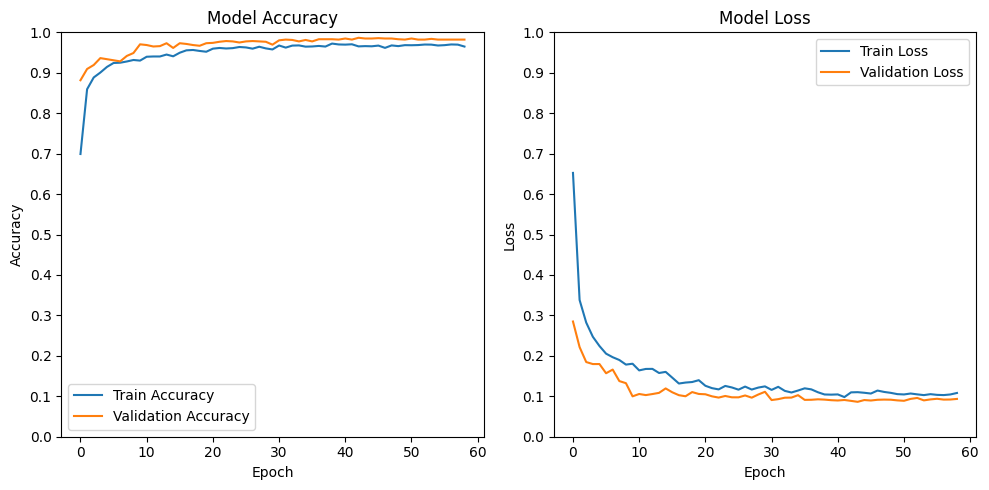

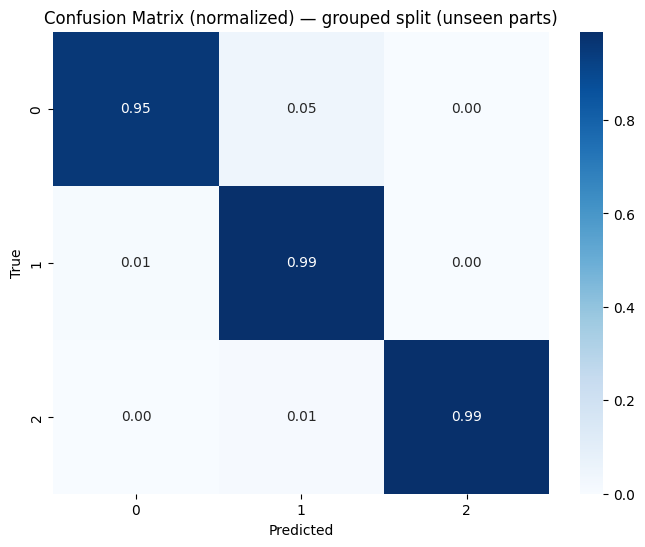


Classification Report (grouped split: unseen parts):
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       636
           1       0.94      0.99      0.97       632
           2       1.00      0.99      0.99       604

    accuracy                           0.98      1872
   macro avg       0.98      0.98      0.98      1872
weighted avg       0.98      0.98      0.98      1872

Test Accuracy: 0.9765
Macro F1:      0.9768
Fold 1: Acc=99.34% | Loss=0.0591 | MacroF1=0.9934
Fold 2: Acc=99.35% | Loss=0.0510 | MacroF1=0.9924
Fold 3: Acc=99.73% | Loss=0.0433 | MacroF1=0.9975
Fold 4: Acc=99.60% | Loss=0.0493 | MacroF1=0.9958
Fold 5: Acc=98.87% | Loss=0.0545 | MacroF1=0.9882

------------------------------------------------------------------------
Grouped CV summary (unseen parts each fold):
Accuracy: mean 99.38%  (Â± 0.30)
Macro F1: mean 0.9935 (Â± 0.0032)
Loss:     mean 0.0515
---------------------------------------------------------------

: 

In [ ]:
# ================================================================
# Hybrid EV Spare Parts Demand Classification
# Final consolidated script (ANN + benchmarks) with y-axis fixed to [0, 1]
# ================================================================

# ===================== Imports & Reproducibility =====================
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"

import json
import itertools
import hashlib
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GroupShuffleSplit, GroupKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, f1_score
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.utils.class_weight import compute_class_weight

import joblib

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Seeds
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ===================== Config =====================
# Exclude 'part' from features (still used for grouping)
DROP_PART = True

# ANN hyperparameter grid (exhaustive but small)
GRID = {
    'num_layers':    [1, 2, 3],
    'units':         [16, 32],
    'dropout_rate':  [0.0, 0.2],
    'l2_reg':        [0.0, 1e-4],
    'learning_rate': [1e-3, 3e-3, 1e-2]
}

# Small grids for the classical models
GRIDS_CLASSIC = {
    "svc_rbf": {"C": [1.0, 3.0], "gamma": ["scale", "auto"]},
    "logreg":  {"C": [0.3, 1.0, 3.0], "solver": ["lbfgs"], "max_iter": [2000]},
    "et":      {"n_estimators": [200, 400], "max_depth": [None, 20]},
    "sgd":     {"loss": ["log_loss"], "alpha": [1e-4, 1e-3], "max_iter": [2000], "random_state": [SEED]},
    "lda":     {"solver": ["svd"]},
}

MODEL_ZOO = {
    "svc_rbf": {
        "label": "SVC (RBF)",
        "factory": lambda p: SVC(**p),
        "style": "scale",
    },
    "logreg": {
        "label": "LogisticRegression",
        "factory": lambda p: LogisticRegression(multi_class="multinomial", **p),
        "style": "scale",
    },
    "et": {
        "label": "ExtraTrees",
        "factory": lambda p: ExtraTreesClassifier(random_state=SEED, n_jobs=-1, **p),
        "style": "tree",
    },
    "sgd": {
        "label": "SGDClassifier (log_loss)",
        "factory": lambda p: SGDClassifier(**p),
        "style": "scale",
    },
    "lda": {
        "label": "LinearDiscriminantAnalysis",
        "factory": lambda p: LDA(**p),
        "style": "scale",
    },
}
MODEL_KEYS = ["svc_rbf", "logreg", "et", "sgd", "lda"]

# ===================== Load & clean =====================
# Support environment override, then common relative paths
data_env = os.environ.get("DEMAND_DATA_PATH", "").strip()
candidates = [Path(p) for p in [data_env] if p] + [
    Path("data") / "demand.csv",
    Path("..") / "data" / "demand.csv",
]
file_path = None
for p in candidates:
    if p.exists():
        file_path = p
        break
if file_path is None:
    raise FileNotFoundError("Could not find demand.csv. Set DEMAND_DATA_PATH or place the file in data/ or ../data/.")

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
print("Using file:", file_path.resolve())
print("Initial shape:", df.shape)

# Drop exact duplicates
dup_count = df.duplicated().sum()
if dup_count:
    print(f"Dropping {dup_count} duplicate rows")
    df = df.drop_duplicates().reset_index(drop=True)

# ===================== Feature schema =====================
# Keep the exact strings as present in your CSV.
cat_cols = [
    'car type',
    'made in',
    'original/imitator',
    'new\\used',
    'selling location',
    'service location (repair shop/automotive company',
    'part'  # identity-like
]
num_all = [
    'number of cars in jordan',
    'car age',
    'failure rate',
    'price of the car',
    'repair or replacement cost',
    'critically',                         # ensure this matches the CSV header
    'on line price',
    'car total maintenance cost average'  # numeric
]

required_cols = cat_cols + num_all + ['demand']
missing_cols = [c for c in required_cols if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing expected columns: {missing_cols}")

cat_cols_effective = [c for c in cat_cols if not (DROP_PART and c == 'part')]
X_all = df[cat_cols_effective + num_all].copy()
groups_all = df['part'].astype(str)  # for grouped splits

# Numeric columns that benefit from log1p
skewed_cols = [
    'on line price',
    'number of cars in jordan',
    'failure rate',
    'repair or replacement cost',
    'critically',
    'price of the car'
]
other_num_cols = [c for c in num_all if c not in skewed_cols]

# ===================== Helper functions =====================
def compute_thresholds_from_train(demand_series, q_low=0.33, q_high=0.66):
    q = demand_series.quantile([q_low, q_high])
    return float(q.loc[q_low]), float(q.loc[q_high])

def bin_with_thresholds(demand_series, low_thr, high_thr):
    # Note: pd.cut ties at exact quantiles fall into the higher bin by default
    return pd.cut(
        demand_series,
        bins=[-np.inf, low_thr, high_thr, np.inf],
        labels=[0, 1, 2]
    ).astype(int)

def make_preprocessor(style: str) -> ColumnTransformer:
    """Return a ColumnTransformer adapted to the model style."""
    if style == "scale":
        num_skew = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('log1p', FunctionTransformer(np.log1p, validate=False)),
            ('scaler', StandardScaler())
        ])
        num_plain = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
    elif style == "tree":
        num_skew = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('log1p', FunctionTransformer(np.log1p, validate=False))
        ])  # no scaler
        num_plain = Pipeline([
            ('imputer', SimpleImputer(strategy='median'))
        ])
    else:
        raise ValueError(f"Unknown preprocessor style: {style}")

    # OHE dense for compatibility across versions
    try:
        cat = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])
    except TypeError:
        cat = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ])

    return ColumnTransformer(
        transformers=[
            ('num_skew', num_skew,   skewed_cols),
            ('num',      num_plain,  other_num_cols),
            ('cat',      cat,        cat_cols_effective)
        ],
        remainder='drop'
    )

def build_ann(input_dim, num_layers, units, dropout_rate, l2_reg, learning_rate, num_classes=3):
    tf.keras.backend.clear_session()
    model = Sequential()
    reg = regularizers.l2(l2_reg) if l2_reg and l2_reg > 0 else None
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(units, activation='relu', kernel_regularizer=reg, input_shape=(input_dim,)))
        else:
            model.add(Dense(units, activation='relu', kernel_regularizer=reg))
        if dropout_rate and dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def grid_dict_product(grid):
    keys = list(grid.keys())
    for values in itertools.product(*(grid[k] for k in keys)):
        yield dict(zip(keys, values))

def hash_rows(df_like):
    """Create a stable hash per row using the actual feature columns used by the model."""
    str_df = df_like.copy()
    for c in str_df.columns:
        if pd.api.types.is_float_dtype(str_df[c]) or pd.api.types.is_integer_dtype(str_df[c]):
            str_df[c] = str_df[c].astype(float).map(lambda x: f"{x:.12g}")
        else:
            str_df[c] = str_df[c].astype(str)
    concat = str_df.apply(lambda r: '||'.join(r.values.astype(str)), axis=1)
    return concat.map(lambda s: hashlib.md5(s.encode('utf-8')).hexdigest())

# ===================== Basic dataset profile =====================
print("n_rows:", len(df), "n_unique_parts:", df['part'].nunique())
print("Rows per part (describe):")
print(df['part'].value_counts().describe())

# ===================== Per-part purity (leakage hint) =====================
tmp_low, tmp_high = compute_thresholds_from_train(df['demand'])  # approximate
tmp_y = bin_with_thresholds(df['demand'], tmp_low, tmp_high)
part_class_counts = pd.crosstab(df['part'], tmp_y)
part_purity = part_class_counts.max(axis=1) / part_class_counts.sum(axis=1)
print("\nPer-part purity, top 10:")
print(part_purity.sort_values(ascending=False).head(10))
print(f"Mean per-part purity: {part_purity.mean():.4f}")

# ===================== Outer grouped train/test split =====================
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
train_idx, test_idx = next(gss.split(X_all, None, groups=groups_all))

X_train_raw, X_test_raw = X_all.iloc[train_idx], X_all.iloc[test_idx]
groups_train, groups_test = groups_all.iloc[train_idx], groups_all.iloc[test_idx]
demand_train, demand_test = df['demand'].iloc[train_idx], df['demand'].iloc[test_idx]

# Create labels using thresholds from TRAIN ONLY
low_thr, high_thr = compute_thresholds_from_train(demand_train)
print(f"\nTrain-only thresholds: 33%={low_thr:.6f}, 66%={high_thr:.6f}")
y_train = bin_with_thresholds(demand_train, low_thr, high_thr)
y_test  = bin_with_thresholds(demand_test,  low_thr, high_thr)

# Class distribution check
print("\nClass distribution (train):")
print(y_train.value_counts().sort_index())
print("Class distribution (test):")
print(y_test.value_counts().sort_index())

# ===================== Row-hash overlap audit =====================
train_hash = hash_rows(X_train_raw)
test_hash  = hash_rows(X_test_raw)
overlap = set(train_hash).intersection(set(test_hash))
print(f"\nRow-hash overlap between train and test using model features: {len(overlap)} rows")
if len(overlap) > 0:
    print("WARNING: Identical feature rows detected across train and test. Investigate potential duplicates.")

# ===================== ANN grid search on grouped inner split =====================
# Carve inner validation from outer training (grouped)
inner_gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
inner_tr_idx, inner_val_idx = next(inner_gss.split(X_train_raw, y_train, groups=groups_train))
X_inner_tr_raw = X_train_raw.iloc[inner_tr_idx]
X_inner_val_raw = X_train_raw.iloc[inner_val_idx]
y_inner_tr = y_train.iloc[inner_tr_idx]
y_inner_val = y_train.iloc[inner_val_idx]

# Fit ONE preprocessor for the inner split and reuse its matrices across grid combos
pre_gs = make_preprocessor(style="scale")
X_inner_tr = pre_gs.fit_transform(X_inner_tr_raw)
X_inner_val = pre_gs.transform(X_inner_val_raw)
input_dim_inner = X_inner_tr.shape[1]

best_cfg = None
best_val_f1 = -np.inf
best_history = None

total_combos = int(np.prod([len(v) for v in GRID.values()]))
print(f"\nStarting ANN exhaustive grid search over {total_combos} combinations...")
for idx, cfg in enumerate(grid_dict_product(GRID), start=1):
    print(f"Config {idx}/{total_combos}: {cfg}")
    model = build_ann(
        input_dim=input_dim_inner,
        num_layers=cfg['num_layers'],
        units=cfg['units'],
        dropout_rate=cfg['dropout_rate'],
        l2_reg=cfg['l2_reg'],
        learning_rate=cfg['learning_rate'],
        num_classes=3
    )
    early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)

    history = model.fit(
        X_inner_tr, y_inner_tr,
        epochs=200,
        validation_data=(X_inner_val, y_inner_val),
        callbacks=[early_stop, reduce_lr],
        verbose=0
    )

    y_val_pred = np.argmax(model.predict(X_inner_val, verbose=0), axis=1)
    f1 = f1_score(y_inner_val, y_val_pred, average='macro')
    if f1 > best_val_f1:
        best_val_f1 = f1
        best_cfg = cfg
        best_history = history

print("\nBest ANN grid configuration (inner grouped val macro F1):", round(best_val_f1, 4))
print(best_cfg)

# ===================== Retrain ANN on full training set with grouped early stopping =====================
# Fit ONE preprocessor on the full outer training set
preprocessor = make_preprocessor(style="scale")
X_train_proc = preprocessor.fit_transform(X_train_raw)
X_test_proc  = preprocessor.transform(X_test_raw)
input_dim = X_train_proc.shape[1]

# Early-stopping split by indexing the already-transformed matrix
inner_tr_idx2, inner_val_idx2 = next(inner_gss.split(X_train_raw, y_train, groups=groups_train))
X_tr2 = X_train_proc[inner_tr_idx2]
X_val2 = X_train_proc[inner_val_idx2]
y_tr2, y_val2 = y_train.iloc[inner_tr_idx2], y_train.iloc[inner_val_idx2]

model = build_ann(
    input_dim=input_dim,
    num_layers=best_cfg['num_layers'],
    units=best_cfg['units'],
    dropout_rate=best_cfg['dropout_rate'],
    l2_reg=best_cfg['l2_reg'],
    learning_rate=best_cfg['learning_rate'],
    num_classes=3
)

# Optional class weights if imbalance exists
class_weight = None
train_counts = y_tr2.value_counts().sort_index()
if train_counts.min() / train_counts.max() < 0.6:
    cw = compute_class_weight(class_weight='balanced', classes=np.array([0,1,2]), y=y_tr2)
    class_weight = {i: w for i, w in enumerate(cw)}
    print("Using class weights:", class_weight)

early_stop_final = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr_final  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)

history = model.fit(
    X_tr2, y_tr2,
    epochs=200,
    validation_data=(X_val2, y_val2),
    callbacks=[early_stop_final, reduce_lr_final],
    verbose=0,
    class_weight=class_weight
)

# ===================== Plots (y-axis fixed to [0, 1]) =====================
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)                               # <- fix range 0..1
ax1.set_yticks(np.linspace(0, 1, 11))            # optional: consistent ticks
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.set_ylim(0, 1)                                # <- fix range 0..1 (clips if loss > 1)
ax2.set_yticks(np.linspace(0, 1, 11))             # optional: consistent ticks
ax2.legend()

plt.tight_layout()
plt.savefig('training_validation_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ===================== Test evaluation (unseen parts) =====================
y_pred_proba = model.predict(X_test_proc, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = y_test.to_numpy()

cm = confusion_matrix(y_true, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.title('Confusion Matrix (normalized) â€” grouped split (unseen parts)')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nClassification Report (grouped split: unseen parts):")
print(classification_report(y_true, y_pred, zero_division=0))
print(f"Test Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Macro F1:      {f1_score(y_true, y_pred, average='macro'):.4f}")

# ===================== Grouped CV with per-fold thresholds & preprocessing =====================
num_folds = 5
gkf = GroupKFold(n_splits=num_folds)

acc_per_fold, f1_per_fold, loss_per_fold = [], [], []
fold_no = 1
for tr_idx, val_idx in gkf.split(X_all, None, groups=groups_all):
    X_tr_raw, X_val_raw = X_all.iloc[tr_idx], X_all.iloc[val_idx]
    demand_tr, demand_val = df['demand'].iloc[tr_idx], df['demand'].iloc[val_idx]

    # Fold-specific thresholds from training portion
    low_f, high_f = compute_thresholds_from_train(demand_tr)
    y_tr_f = bin_with_thresholds(demand_tr, low_f, high_f)
    y_val_f = bin_with_thresholds(demand_val, low_f, high_f)

    pre_fold = make_preprocessor(style="scale")
    X_tr = pre_fold.fit_transform(X_tr_raw)
    X_val = pre_fold.transform(X_val_raw)

    model_fold = build_ann(
        input_dim=X_tr.shape[1],
        num_layers=best_cfg['num_layers'],
        units=best_cfg['units'],
        dropout_rate=best_cfg['dropout_rate'],
        l2_reg=best_cfg['l2_reg'],
        learning_rate=best_cfg['learning_rate'],
        num_classes=3
    )

    hist_f = model_fold.fit(
        X_tr, y_tr_f,
        epochs=200,
        validation_data=(X_val, y_val_f),
        callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
                   ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=0)],
        verbose=0
    )

    loss, acc = model_fold.evaluate(X_val, y_val_f, verbose=0)
    y_val_pred = np.argmax(model_fold.predict(X_val, verbose=0), axis=1)
    f1 = f1_score(y_val_f, y_val_pred, average='macro')

    print(f"Fold {fold_no}: Acc={acc*100:.2f}% | Loss={loss:.4f} | MacroF1={f1:.4f}")
    acc_per_fold.append(acc * 100); f1_per_fold.append(f1); loss_per_fold.append(loss)
    fold_no += 1

print('\n' + '-'*72)
print('Grouped CV summary (unseen parts each fold):')
print(f"Accuracy: mean {np.mean(acc_per_fold):.2f}%  (Â± {np.std(acc_per_fold):.2f})")
print(f"Macro F1: mean {np.mean(f1_per_fold):.4f} (Â± {np.std(f1_per_fold):.4f})")
print(f"Loss:     mean {np.mean(loss_per_fold):.4f}")
print('-'*72)

# ===================== Single-feature leakage audit (grouped CV) =====================
def single_feature_cv_score(feature_name):
    # Build a tiny pipeline: transform only this feature, then multinomial logistic regression
    if feature_name in cat_cols_effective:
        try:
            ohe = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
            ])
        except TypeError:
            ohe = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
            ])
        pipe = Pipeline([('ohe', ohe),
                         ('clf', LogisticRegression(max_iter=2000, multi_class='multinomial'))])
        X_feat = df[[feature_name]].astype(str)
    else:
        steps = []
        steps.append(('imputer', SimpleImputer(strategy='median')))
        if feature_name in skewed_cols:
            steps.append(('log1p', FunctionTransformer(np.log1p, validate=False)))
        steps.append(('scaler', StandardScaler()))
        steps.append(('clf', LogisticRegression(max_iter=2000, multi_class='multinomial')))
        pipe = Pipeline(steps)
        X_feat = df[[feature_name]].copy()

    f1_scores = []
    for tr_idx, val_idx in gkf.split(X_all, None, groups=groups_all):
        d_tr = df['demand'].iloc[tr_idx]; d_val = df['demand'].iloc[val_idx]
        low_f, high_f = compute_thresholds_from_train(d_tr)
        y_tr_f = bin_with_thresholds(d_tr, low_f, high_f)
        y_val_f = bin_with_thresholds(d_val, low_f, high_f)

        X_tr_f = X_feat.iloc[tr_idx]; X_val_f = X_feat.iloc[val_idx]
        pipe.fit(X_tr_f, y_tr_f)
        y_val_pred = pipe.predict(X_val_f)
        f1_scores.append(f1_score(y_val_f, y_val_pred, average='macro'))

    return np.mean(f1_scores)

features_to_audit = cat_cols_effective + num_all
audit_results = []
print("\nRunning single-feature leakage audit (grouped CV, macro F1 per feature)...")
for feat in features_to_audit:
    score = single_feature_cv_score(feat)
    audit_results.append((feat, score))
audit_results.sort(key=lambda x: x[1], reverse=True)
print("Top 10 features by single-feature macro F1:")
for name, sc in audit_results[:10]:
    print(f"{name:45s} {sc:.4f}")

suspicious = [(n, s) for n, s in audit_results if s >= 0.99]
if suspicious:
    print("\nWARNING: These features alone achieve near-perfect classification under grouped CV:")
    for n, s in suspicious:
        print(f"  - {n}: macro F1 {s:.4f}")
    print("Review whether they encode target information directly or leak future knowledge.")

# ===================== Save tuned ANN model, preprocessor, and thresholds =====================
model.save("demand_clf.keras")
with open("label_thresholds.txt", "w") as f:
    f.write(f"{low_thr},{high_thr}\n")

joblib.dump(preprocessor, "preprocessor.joblib")
with open("label_metadata.json", "w") as f:
    json.dump({
        "low_thr": low_thr,
        "high_thr": high_thr,
        "class_order": [0, 1, 2],
        "seed": int(SEED),
        "cat_cols_effective": cat_cols_effective,
        "num_all": num_all,
        "skewed_cols": skewed_cols,
        "other_num_cols": other_num_cols
    }, f, indent=2)

print("\nSaved tuned ANN model to demand_clf.keras")
print("Saved train-only label thresholds to label_thresholds.txt")
print("Saved preprocessor to preprocessor.joblib and label metadata to label_metadata.json")
print("Best ANN configuration:", GRID if best_cfg is None else best_cfg)

# ===================== Classical models benchmark (top 5) =====================
def fit_select_on_inner_classic(model_key, X_tr_raw, y_tr, groups_tr):
    """Carve an inner grouped validation split from outer-train to select hyperparams.
       Fit ONE preprocessor for that model style and reuse its matrices across param combos."""
    inner = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
    inner_tr_idx, inner_val_idx = next(inner.split(X_tr_raw, y_tr, groups=groups_tr))

    X_inner_tr_raw = X_tr_raw.iloc[inner_tr_idx]
    X_inner_val_raw = X_tr_raw.iloc[inner_val_idx]
    y_inner_tr = y_tr.iloc[inner_tr_idx]
    y_inner_val = y_tr.iloc[inner_val_idx]

    spec = MODEL_ZOO[model_key]
    grid = GRIDS_CLASSIC[model_key]
    style = spec["style"]

    pre = make_preprocessor(style)
    X_inner_tr = pre.fit_transform(X_inner_tr_raw)
    X_inner_val = pre.transform(X_inner_val_raw)

    best_f1 = -np.inf
    best_params = None

    for params in grid_dict_product(grid):
        est = spec["factory"](params)
        est.fit(X_inner_tr, y_inner_tr)
        y_val_pred = est.predict(X_inner_val)
        f1 = f1_score(y_inner_val, y_val_pred, average="macro")
        if f1 > best_f1:
            best_f1 = f1
            best_params = params

    return best_params, best_f1

records = []

for key in MODEL_KEYS:
    label = MODEL_ZOO[key]["label"]
    print(f"\n=== {label} ({key}) ===")

    # Hyperparameter selection on a grouped inner split
    best_params, inner_f1 = fit_select_on_inner_classic(key, X_train_raw, y_train, groups_train)
    print(f"Selected params: {best_params} | Inner macro F1={inner_f1:.4f}")

    # Refit preprocessor on full outer-train, then train and evaluate
    pre = make_preprocessor(MODEL_ZOO[key]["style"])
    X_train_cls = pre.fit_transform(X_train_raw)
    X_test_cls  = pre.transform(X_test_raw)

    est = MODEL_ZOO[key]["factory"](best_params)
    est.fit(X_train_cls, y_train)

    y_pred_cls = est.predict(X_test_cls)
    acc = accuracy_score(y_test, y_pred_cls)
    f1m = f1_score(y_test, y_pred_cls, average="macro")

    print(f"Test Accuracy={acc:.4f} | Test Macro F1={f1m:.4f}")
    print(classification_report(y_test, y_pred_cls, zero_division=0))

    records.append(
        {
            "key": key,
            "model": label,
            "best_params": best_params,
            "inner_macro_f1": round(inner_f1, 4),
            "test_accuracy": round(acc, 4),
            "test_macro_f1": round(f1m, 4),
        }
    )

# ===================== Summary of classical models =====================
results = pd.DataFrame.from_records(records)
results_sorted = results.sort_values(
    ["test_macro_f1", "test_accuracy"], ascending=False
).reset_index(drop=True)

print("\n=== Ranked results (outer test) ===")
print(results_sorted[["model", "test_macro_f1", "test_accuracy", "inner_macro_f1", "best_params"]])

results_sorted.to_csv("model_benchmark_results_top5.csv", index=False)
print("\nSaved benchmark table to model_benchmark_results_top5.csv")


# SHAP Setup & Imports


In [37]:
# Install and import SHAP; ensure artifacts/inputs are available
import sys
import subprocess
import os
import json
import platform
from pathlib import Path

def _ensure_import(module_name, pip_name=None):
    try:
        return __import__(module_name)
    except ModuleNotFoundError:
        pkg = pip_name or module_name
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        return __import__(module_name)

shap = _ensure_import('shap')
print('shap version:', getattr(shap, '__version__', 'unknown'))

_ensure_import('numpy')
_ensure_import('pandas')

tf_pkg = 'tensorflow'
system = platform.system()
machine = platform.machine().lower()
if system == 'Windows':
    tf_pkg = 'tensorflow-cpu'
elif system == 'Darwin' and 'arm' in machine:
    tf_pkg = 'tensorflow-macos'
_ensure_import('tensorflow', tf_pkg)

_ensure_import('joblib')
_ensure_import('sklearn', 'scikit-learn')

import numpy as np  # noqa: E402
import pandas as pd  # noqa: E402
import tensorflow as tf  # noqa: E402
import joblib  # noqa: E402
from sklearn.model_selection import GroupShuffleSplit  # noqa: E402

artifact_candidates = {
    'label_metadata.json': [Path('label_metadata.json'), Path('src') / 'label_metadata.json', Path('..') / 'label_metadata.json'],
    'demand_clf.keras': [Path('demand_clf.keras'), Path('src') / 'demand_clf.keras', Path('..') / 'demand_clf.keras'],
    'preprocessor.joblib': [Path('preprocessor.joblib'), Path('src') / 'preprocessor.joblib', Path('..') / 'preprocessor.joblib'],
}

resolved = {}
missing = []
for name, candidates in artifact_candidates.items():
    found = next((p for p in candidates if p.exists()), None)
    if found is None:
        missing.append(name)
    else:
        resolved[name] = found.resolve()

if missing:
    raise FileNotFoundError(f'Missing required artifact(s): {missing}. Run training cells to create them.')

meta_path = resolved['label_metadata.json']
model_path = resolved['demand_clf.keras']
preproc_path = resolved['preprocessor.joblib']

with meta_path.open('r', encoding='utf-8') as f:
    label_meta = json.load(f)

seed = int(label_meta.get('seed', 42))
SEED = seed  # expose for downstream cells
np.random.seed(seed)
tf.random.set_seed(seed)

cat_cols_effective = label_meta['cat_cols_effective']
num_all = label_meta['num_all']
skewed_cols = label_meta.get('skewed_cols', [])
other_num_cols = label_meta.get('other_num_cols', [])
class_order = label_meta.get('class_order', [0, 1, 2])

model = tf.keras.models.load_model(model_path)
preprocessor = joblib.load(preproc_path)

data_env = os.environ.get('DEMAND_DATA_PATH', '').strip()
candidates = [Path(p) for p in [data_env] if p] + [
    Path('src') / 'data' / 'demand.csv',
    Path('data') / 'demand.csv',
    Path('..') / 'data' / 'demand.csv',
]
file_path = next((p for p in candidates if p.exists()), None)
if file_path is None:
    raise FileNotFoundError('Could not find demand.csv for SHAP. Set DEMAND_DATA_PATH or place it in data/ or ../data/.')

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

required = set(cat_cols_effective + num_all + ['part'])
missing_cols = sorted(required - set(df.columns))
if missing_cols:
    raise ValueError(f'Dataset missing expected columns: {missing_cols}')

X_all = df[cat_cols_effective + num_all].copy()
groups_all = df['part'].astype(str)

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)
train_idx, test_idx = next(gss.split(X_all, None, groups=groups_all))
X_train_raw = X_all.iloc[train_idx]
X_test_raw = X_all.iloc[test_idx]

X_train_proc = preprocessor.transform(X_train_raw)
X_test_proc = preprocessor.transform(X_test_raw)

print('Artifacts and data loaded.')
print('  X_train_proc shape:', getattr(X_train_proc, 'shape', None))
print('  X_test_proc shape :', getattr(X_test_proc, 'shape', None))

shap version: 0.48.0
Artifacts and data loaded.
  X_train_proc shape: (5720, 24)
  X_test_proc shape : (1932, 24)


# SHAP Feature Names


In [38]:
# Extract human-readable feature names from the fitted preprocessor
def get_feature_names(preprocessor):
    try:
        names = preprocessor.get_feature_names_out()
        return [str(n).replace('num_skew__', '').replace('num__', '').replace('cat__', '') for n in names]
    except Exception:
        names = []
        for name, trans, cols in preprocessor.transformers_:
            if name == 'remainder' and trans == 'drop':
                continue
            if name in ('num_skew', 'num'):
                names.extend(list(cols))
            elif name == 'cat':
                try:
                    ohe = trans.named_steps.get('ohe')
                    categories = ohe.categories_
                    for col, cats in zip(cols, categories):
                        for cat in cats:
                            names.append(f'{col}={cat}')
                except Exception:
                    names.extend(list(cols))
            else:
                if isinstance(cols, list):
                    names.extend(list(cols))
        return names

feature_names = get_feature_names(preprocessor)
print('n_features:', len(feature_names))
print('first 10:', feature_names[:10])


n_features: 24
first 10: ['on line price', 'number of cars in jordan', 'failure rate', 'repair or replacement cost', 'critically', 'price of the car', 'car age', 'car total maintenance cost average', 'car type=1', 'car type=2']


# SHAP Explainer for ANN


In [39]:
# Use DeepExplainer for Keras; fallback to KernelExplainer if needed
rng = np.random.RandomState(SEED)
X_bg = X_train_proc
X_eval = X_test_proc if 'X_test_proc' in globals() else X_train_proc

bg_size = min(100, X_bg.shape[0])
explain_size = min(200, X_eval.shape[0])
bg_idx = rng.choice(X_bg.shape[0], size=bg_size, replace=False)
explain_idx = rng.choice(X_eval.shape[0], size=explain_size, replace=False)

background = X_bg[bg_idx]
X_explain = X_eval[explain_idx]

if hasattr(background, 'toarray'):
    background = background.toarray()
if hasattr(X_explain, 'toarray'):
    X_explain = X_explain.toarray()

try:
    explainer = shap.DeepExplainer(model, background)
    shap_values = explainer.shap_values(X_explain)
    method = 'DeepExplainer'
except Exception as err:
    print('DeepExplainer failed, falling back to KernelExplainer:', err)
    f = lambda x: model.predict(x, verbose=0)
    explainer = shap.KernelExplainer(f, background)
    shap_values = explainer.shap_values(X_explain, nsamples=100)
    method = 'KernelExplainer'

print('SHAP explainer:', method)

_shap_values = shap_values
_X_explain = X_explain
_background = background


SHAP explainer: DeepExplainer


# SHAP Summary Plots


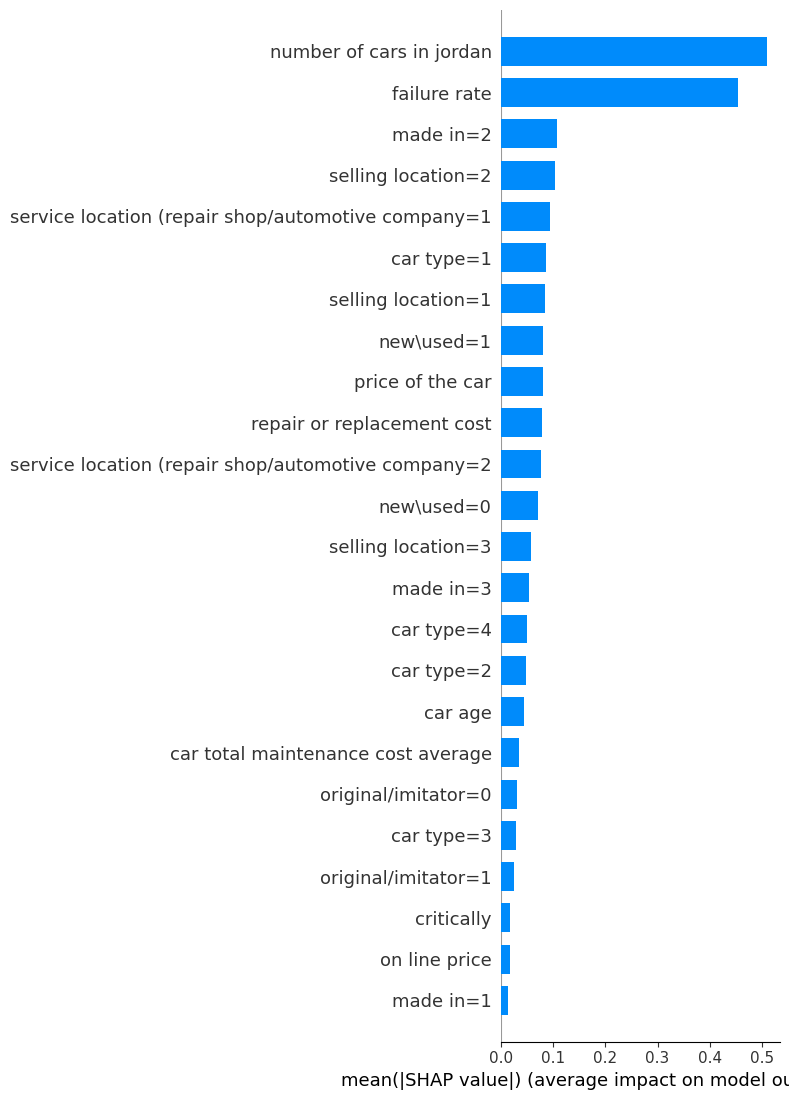

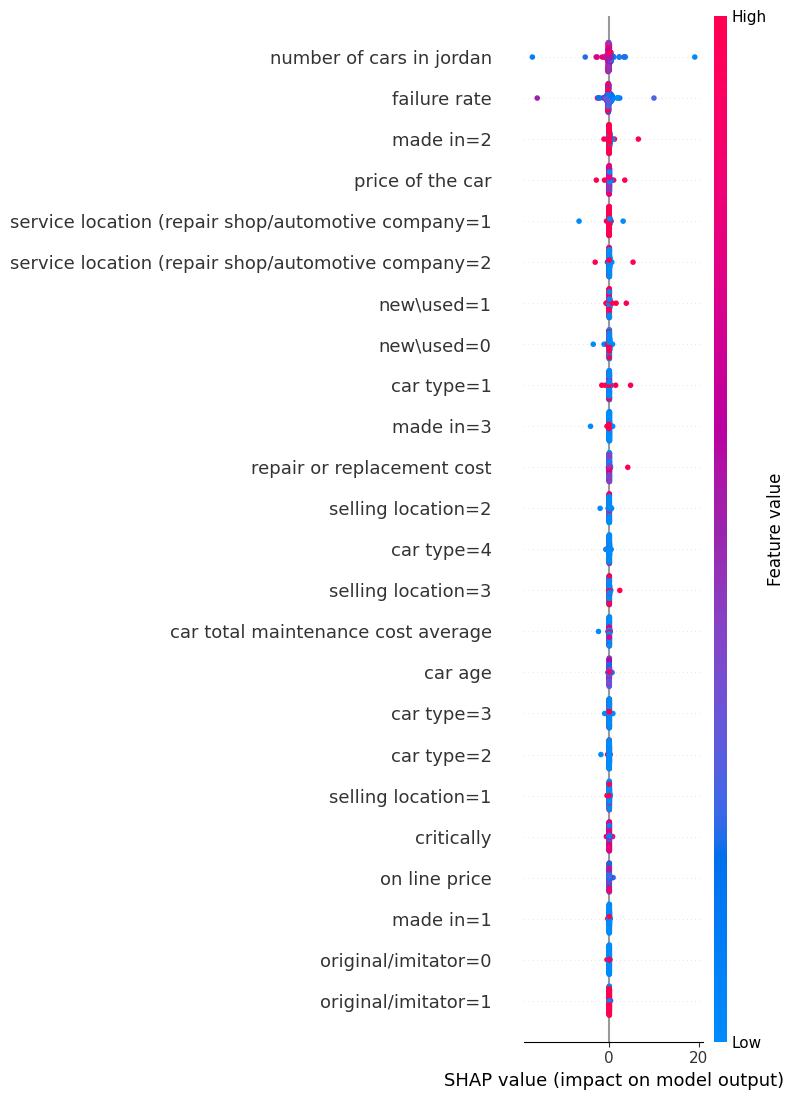

Saved SHAP beeswarm and top-20 CSV for low_demand


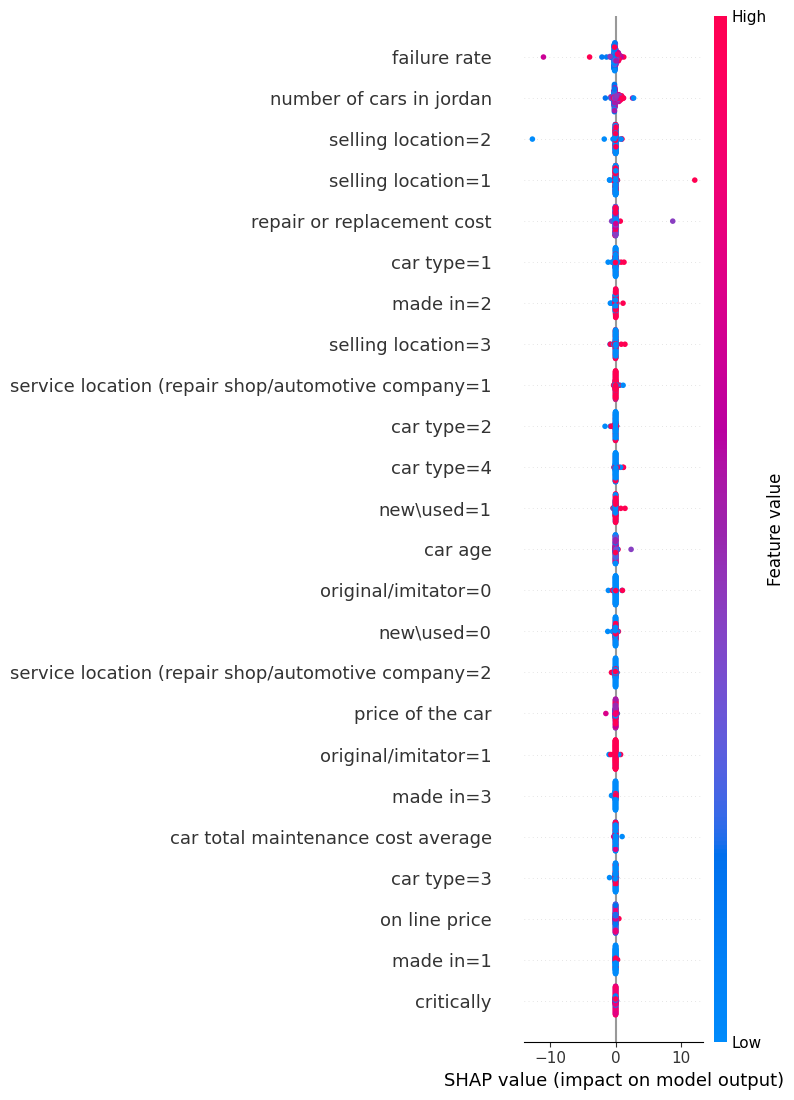

Saved SHAP beeswarm and top-20 CSV for high_demand
Saved: shap_summary_bar.png, shap_feature_importance_top20.csv plus class-specific outputs


In [40]:
# Generate summary plots and export top feature importances
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sv_raw = _shap_values
X_explain = _X_explain.toarray() if hasattr(_X_explain, 'toarray') else _X_explain

if isinstance(sv_raw, list):
    shap_array = np.stack([np.array(s) for s in sv_raw], axis=-1)
else:
    shap_array = np.array(sv_raw)
    if shap_array.ndim == 2:
        shap_array = shap_array[..., np.newaxis]

_shap_array = shap_array  # cache full tensor for later use
shap_abs = np.abs(shap_array).mean(axis=-1)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_abs, X_explain, feature_names=feature_names, plot_type='bar', show=False, max_display=25)
plt.tight_layout()
plt.savefig('shap_summary_bar.png', dpi=300, bbox_inches='tight')
plt.show()

class_order = globals().get('class_order', list(range(shap_array.shape[-1])))
class_indices = {cls: idx for idx, cls in enumerate(class_order) if idx < shap_array.shape[-1]}
target_classes = {
    'low_demand': 0,
    'high_demand': 2,
}

for label, cls_id in target_classes.items():
    if cls_id not in class_indices:
        continue
    cls_idx = class_indices[cls_id]
    shap_class = shap_array[..., cls_idx]

    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_class, X_explain, feature_names=feature_names, show=False, max_display=25)
    plt.tight_layout()
    plt.savefig(f'shap_beeswarm_{label}.png', dpi=300, bbox_inches='tight')
    plt.show()

    vals_cls = np.abs(shap_class).mean(axis=0)
    fi_cls = pd.Series(vals_cls, index=feature_names).sort_values(ascending=False)
    fi_cls.head(20).to_csv(f'shap_feature_importance_{label}_top20.csv')
    print(f'Saved SHAP beeswarm and top-20 CSV for {label}')

vals = shap_abs.mean(axis=0)
fi = pd.Series(vals, index=feature_names).sort_values(ascending=False)
fi.head(20).to_csv('shap_feature_importance_top20.csv')
print('Saved: shap_summary_bar.png, shap_feature_importance_top20.csv plus class-specific outputs')